In [1]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# VEST MS 2020

## VEST's Documentation File

Election results from the Mississippi Secretary of State (https://www.sos.ms.gov/elections-voting/election-results). Precinct shapefiles initially from the U.S. Census Bureau's 2020 Redistricting Data Program.  
  
Precinct boundaries were adjusted as appropriate to align with county maps, supervisor districts, or prior versions of the Census VTDs. Precinct boundaries throughout the state were further reviewed with the voter registration file in effect for the November 2020 general election. Voting districts in nearly all counties were edited accordingly to align with reporting units in the 2020 election results. In some counties the resulting boundaries differ substantially from the 2020 Census VTDs. As these boundary revisions were so extensive only splits and merges are specified below by precinct.  
  
Some Mississippi counties name precincts after polling places and therefore change precinct names when polling places change regardless of whether this involves a change in boundaries. Precinct names were edited wherever necessary to match the November 2020 canvass results.  
  
In Kemper County an alphabetic name split of Scooba precinct was reported as separate line items. These were merged in the shapefile.  
  
The following splits and merges were made to align voting district boundaries with reporting units in the 2020 election results.  
  
Attala: Merge Northwest/Aponaug  
Claiborne: Split 2A/2B, 4A/4B  
Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97  
Itawamba: Split Friendship, Mantachie by supervisor district  
Jackson: Merge all A/B/C/D splits  
Jefferson Davis: Split South Prentiss 12/13  
Jones: Merge George Harrison/County Barn  
Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley  
Leflore: Split Morgan City/Swiftown by zip code  
Simpson: Merge all A/B splits  
Tallahatchie: Merge Sumner 2/Webb 2  
Walthall: Merge E Tylertown A/B, W Tylertown A/B, S Knoxo/Tylertown 3  
Wilkinson: Merge Woodville 5/5A  
Yalobusha: Merge Two NE/SE as Water Valley; Split Scuna-Vann's Mill N/S  
Yazoo: Merge Carter/Lake City, Deasonville/Harttown, Dover/Robinette as Little Yazoo, Fairview/Holly Bluff, Midway E/W, Tinsley into Mechanicsburg/Valley  
  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PREABLA - Don Blakenship (American Constitution Party)  
G20PREOCAR - Brian Caroll (American Solidarity Party)  
G20PREIWES - Kanye West (Independent)  
G20PREICOL - Phil Collins (Prohibition Party)  
G20PREIPIE - Brock Pierce (Independent)  
  
G20USSRHYD - Cindy Hyde-Smith (Republican Party)  
G20USSDESP - Mike Espy (Democratic Party)  
G20USSLEDW - Jimmy L. Edwards (Libertarian Party)  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/ms_2020/ms_2020.shp")

In [3]:
vest_shp.head(1)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREABLA,G20PREOCAR,G20PREIWES,G20PREICOL,G20PREIPIE,G20USSRHYD,G20USSDESP,G20USSLEDW,geometry
0,28,017,000107,28017000107,Egypt,126,225,2,0,2,0,0,0,0,115,236,2,"POLYGON ((-88.82480 33.94316, -88.82453 33.943..."


In [4]:
vest_shp.shape

(1764, 18)

<AxesSubplot:>

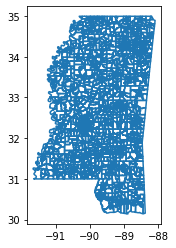

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Election Results from SOS are in PDF scanned form. We are using Open Elections precinct level results.

In [6]:
election_results = pd.read_csv('./raw-from-source/SOS/20201103__ms__general__precinct.csv')

In [7]:
election_results.sort_values(by=['county', 'precinct','office']).head(1)

,county,precinct,office,district,candidate,party,votes
0,Adams,"Dist. 1, Bellemont Precinct",President,NaN,Joseph R. Biden,D,519


In [8]:
election_results['county'].unique()

array(['Adams', 'Alcorn', 'Amite', 'Attala', 'Benton', 'Bolivar',
       'Calhoun', 'Carroll', 'Chickasaw', 'Choctaw', 'Claiborne',
       'Clarke', 'Clay', 'Coahoma', 'Copiah', 'Covington', 'Desoto',
       'Forrest', 'Franklin', 'George', 'Greene', 'Grenada', 'Hancock',
       'Harrison', 'Hinds', 'Holmes', 'Humphreys', 'Issaquena',
       'Itawamba', 'Jackson', 'Jasper', 'Jefferson', 'Jefferson Davis',
       'Jones', 'Kemper', 'Lafayette', 'Lamar', 'Lauderdale', 'Lawrence',
       'Leake', 'Lee', 'Leflore', 'Lincoln', 'Lowndes', 'Madison',
       'Marion', 'Marshall', 'Monroe', 'Montgomery', 'Neshoba', 'Newton',
       'Noxubee', 'Oktibbeha', 'Panola', 'Pearl River', 'Perry', 'Pike',
       'Pontotoc', 'Prentiss', 'Quitman', 'Rankin', 'Scott', 'Sharkey',
       'Simpson', 'Smith', 'Stone', 'Sunflower', 'Tallahatchie', 'Tate',
       'Tippah', 'Tishomingo', 'Tunica', 'Union', 'Walthall', 'Warren',
       'Washington', 'Wayne', 'Webster', 'Wilkinson', 'Winston',
       'Yalobusha', '

In [9]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Mississippi"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
ms_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "28" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [10]:
#Create a list of candidates from the VEST documentation

# List of candidates names from VEST documentation
office_list = ['Donald J. Trump','Joseph R. Biden','Jo Jorgensen','Howie Hawkins','Don Blankenship',"Brian Carroll",'Kanye West','Phil Collins','Brock Pierce','Cindy Hyde-Smith','Mike Espy','Jimmy L. Edwards']
office_list = sorted(office_list)

In [11]:
election_results['candidate'].replace({"Jimmy L Edwards": "Jimmy L. Edwards"}, inplace=True)
election_results['county'].replace({"Desoto": "De Soto"}, inplace=True)

In [12]:
election_results = election_results[election_results["candidate"].isin(office_list)]

In [13]:
election_results["candidate"].unique()

array(['Joseph R. Biden', 'Donald J. Trump', 'Don Blankenship',
       'Brian Carroll', 'Phil Collins', 'Howie Hawkins', 'Jo Jorgensen',
       'Brock Pierce', 'Kanye West', 'Mike Espy', 'Cindy Hyde-Smith',
       'Jimmy L. Edwards'], dtype=object)

In [14]:
#Add FIPS columns
election_results['county'] = election_results['county'].str.upper()
election_results["COUNTYFP20"] = election_results["county"].map(ms_fips_dict).fillna(election_results["county"])

In [15]:
#Clean up precinct column by stripping the white space
election_results["precinct"]=election_results["precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTYFP20"]+election_results["precinct"]

In [16]:
#Run the pivot
pivoted_election_results = pd.pivot_table(election_results,values=["votes"],index=["pivot_col"],columns=["candidate"],aggfunc=sum)

#Fill in N/A with 0
pivoted_election_results = pivoted_election_results.fillna(0)

#Clean the columns
pivoted_election_results.reset_index(drop=False,inplace=True)
pivoted_election_results.columns = pivoted_election_results.columns.droplevel(0)

In [17]:
pivoted_election_results.head(1)

candidate,,Brian Carroll,Brock Pierce,Cindy Hyde-Smith,Don Blankenship,Donald J. Trump,Howie Hawkins,Jimmy L. Edwards,Jo Jorgensen,Joseph R. Biden,Kanye West,Mike Espy,Phil Collins
0,"001Dist. 1, Bellemont Precinct",1,0,947,2,988,2,22,8,519,5,553,1


In [18]:
pivoted_election_results.columns.values[0] = "join_col"

In [19]:
pivoted_election_results.head(1)

candidate,join_col,Brian Carroll,Brock Pierce,Cindy Hyde-Smith,Don Blankenship,Donald J. Trump,Howie Hawkins,Jimmy L. Edwards,Jo Jorgensen,Joseph R. Biden,Kanye West,Mike Espy,Phil Collins
0,"001Dist. 1, Bellemont Precinct",1,0,947,2,988,2,22,8,519,5,553,1


In [20]:
#Add FIPS State and County columns
pivoted_election_results.insert(loc=0, column='STATEFP20', value='37')
pivoted_election_results.insert(loc=1, column='COUNTYFP20', value=pivoted_election_results['join_col'].str[0:3])
pivoted_election_results.insert(loc=3, column='Precinct', value=pivoted_election_results['join_col'].str[3:])

In [21]:
pivoted_election_results.head(1)

candidate,STATEFP20,COUNTYFP20,join_col,Precinct,Brian Carroll,Brock Pierce,Cindy Hyde-Smith,Don Blankenship,Donald J. Trump,Howie Hawkins,Jimmy L. Edwards,Jo Jorgensen,Joseph R. Biden,Kanye West,Mike Espy,Phil Collins
0,37,001,"001Dist. 1, Bellemont Precinct","Dist. 1, Bellemont Precinct",1,0,947,2,988,2,22,8,519,5,553,1


In [22]:
pivoted_election_results.columns = ["STATEFP10","COUNTYFP20","join_col","Precinct","G20PREOCAR","G20PREIPIE","G20USSRHYD","G20PREABLA","G20PRERTRU","G20PREGHAW","G20USSLEDW","G20PRELJOR","G20PREDBID","G20PREIWES","G20USSDESP","G20PREICOL"]

In [23]:
pivoted_election_results.head(1)

,STATEFP10,COUNTYFP20,join_col,Precinct,G20PREOCAR,G20PREIPIE,G20USSRHYD,G20PREABLA,G20PRERTRU,G20PREGHAW,G20USSLEDW,G20PRELJOR,G20PREDBID,G20PREIWES,G20USSDESP,G20PREICOL
0,37,001,"001Dist. 1, Bellemont Precinct","Dist. 1, Bellemont Precinct",1,0,947,2,988,2,22,8,519,5,553,1


In [24]:
election_results = pivoted_election_results.copy()

In [25]:
election_results = election_results[election_results['Precinct']!='TOTAL']

## Compare vote totals before allocation

In [26]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PREABLA',
 'G20PREOCAR',
 'G20PREIWES',
 'G20PREICOL',
 'G20PREIPIE',
 'G20USSRHYD',
 'G20USSDESP',
 'G20USSLEDW']

In [27]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

2625113
2625113


## Compare Election Result Totals

### Compare Vote Totals

In [28]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

2625113
2625113


### Compare Race Totals

In [29]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [30]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU is equal 	VEST / RDH: 756764
G20PREDBID is equal 	VEST / RDH: 539398
G20PRELJOR is equal 	VEST / RDH: 8026
G20PREGHAW is equal 	VEST / RDH: 1498
G20PREABLA is equal 	VEST / RDH: 1279
G20PREOCAR is equal 	VEST / RDH: 1161
G20PREIWES is equal 	VEST / RDH: 3657
G20PREICOL is equal 	VEST / RDH: 1317
G20PREIPIE is equal 	VEST / RDH: 659
G20USSRHYD is equal 	VEST / RDH: 709511
G20USSDESP is equal 	VEST / RDH: 578691
G20USSLEDW is equal 	VEST / RDH: 23152


## Differences in State Totals 
VEST State totals match official state totals. Our totals are off because of what appears to be an error in the North Carolina "Precinct Sorted Results". In counties where VEST used these files we did as well and the totals do not appear to match.  We assume that VEST did some deallocation that we were not able to do. 

### Compare County Totals

In [31]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [32]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP20')

***Countywide Totals Check***

G20PRERTRU is equal across all counties
G20PREDBID is equal across all counties
G20PRELJOR is equal across all counties
G20PREGHAW is equal across all counties
G20PREABLA is equal across all counties
G20PREOCAR is equal across all counties
G20PREIWES is equal across all counties
G20PREICOL is equal across all counties
G20PREIPIE is equal across all counties
G20USSRHYD is equal across all counties
G20USSDESP is equal across all counties
G20USSLEDW is equal across all counties
[]


## Attempt to Join

In [33]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP20']+vest_shp['NAME20']

In [34]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

1766
1766
1764
1764


In [35]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [36]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PREC_ID"])
print(len(empty_precincts))

0


In [37]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

1


## Attempt Join

In [38]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          1094
left_only      672
right_only     670
Name: _merge, dtype: int64


In [39]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP20_x','Precinct','G20PRERTRU_x','COUNTYFP20_y','NAME20','join_col']].head(10)

,COUNTYFP20_x,Precinct,G20PRERTRU_x,COUNTYFP20_y,NAME20,join_col
0,001,"Dist. 1, Bellemont Precinct",988.0,NaN,NaN,"001DIST. 1, BELLEMONT PRECINCT"
1,001,"Dist. 1, By-Pass Fire Precinct",262.0,NaN,NaN,"001DIST. 1, BY-PASS FIRE PRECINCT"
2,001,"Dist. 1, Courthouse Precinct",399.0,NaN,NaN,"001DIST. 1, COURTHOUSE PRECINCT"
3,001,"Dist. 2, Beau Pre Precinct",496.0,NaN,NaN,"001DIST. 2, BEAU PRE PRECINCT"
4,001,"Dist. 2, Duncan Park Precinct",466.0,NaN,NaN,"001DIST. 2, DUNCAN PARK PRECINCT"
5,001,"Dist. 2, Kingston Precinct",525.0,NaN,NaN,"001DIST. 2, KINGSTON PRECINCT"
6,001,"Dist. 2, Liberty Park Precinct",521.0,NaN,NaN,"001DIST. 2, LIBERTY PARK PRECINCT"
7,001,"Dist. 3, Concord Precinct",41.0,NaN,NaN,"001DIST. 3, CONCORD PRECINCT"
8,001,"Dist. 3, Maryland Hgts. Precinct",26.0,NaN,NaN,"001DIST. 3, MARYLAND HGTS. PRECINCT"
9,001,"Dist. 3, Nps Multi Purpose Bldg.",135.0,NaN,NaN,"001DIST. 3, NPS MULTI PURPOSE BLDG."


In [40]:
precinct_dict = {'001DIST. 1, BELLEMONT PRECINCT': '001BELLEMONT',
 '001DIST. 1, BY-PASS FIRE PRECINCT': '001BY-PASS FIRESTATION',
 '001DIST. 1, COURTHOUSE PRECINCT': '001COURTHOUSE',
 '001DIST. 2, BEAU PRE PRECINCT': '001BEAU PRE',
 '001DIST. 2, DUNCAN PARK PRECINCT': '001DUNCAN PARK',
 '001DIST. 2, KINGSTON PRECINCT': '001KINGSTON',
 '001DIST. 2, LIBERTY PARK PRECINCT': '001LIBERTY PARK',
 '001DIST. 3, CONCORD PRECINCT': '001CONCORD',
 '001DIST. 3, MARYLAND HGTS. PRECINCT': '001MARYLAND HEIGHTS',
 '001DIST. 3, NPS MULTI PURPOSE BLDG.': '001NPS MULTI PURPOSE BLDG',
 '001DIST. 3, PALESTINE PRECINCT': '001PALESTINE',
 '001DIST. 4, CARPENTER PRECINCT': '001CARPENTER',
 '001DIST. 4, MORGANTOWN PRECINCT': '001MORGANTOWN',
 '001DIST. 4, NORTHSIDE PRECINCT': '001NORTHSIDE SCHOOL',
 '001DIST. 4, PINE RIDGE PRECINCT': '001PINE RIDGE',
 '001DIST. 5, AIRPORT PRECINCT': '001AIRPORT',
 '001DIST. 5, FOSTER MOUND PRECINCT': '001FOSTER MOUND',
 '001DIST. 5, OAKLAND PRECINCT': '001OAKLAND',
 '001DIST. 5, WASHINGTON PRECINCT': '001WASHINGTON',
 '0032ND DISTRICT CENTRAL PRECINCT': '003CENTRAL',
 '003FIVE POINTS 1ST DIST': '003FIVE-POINT',
 '007NORTH EAST': '007NORTHEAST',
 '007NORTH WEST': '007NORTHWEST',
 '007SOUTH WEST': '007SOUTHWEST',
 '009ASHLAND PRECINCT DISTRICT 3': '009ASHLAND',
 '009CANAAN PRECINCT DISTRICT 1': '009CANAAN',
 '009FLOYD PRECINCT DIST 4': '009FLOYD',
 '009HICKORY FLAT PREC DIST 5': '009HICKORY FLAT',
 '009LAMAR PRECINCT DISTRICT 2': '009LAMAR',
 '011DUNCAN-ALLIGATOR': '011DUNCAN/ALLIGATOR',
 '011NORTH WEST CLEVELAND': '011NORTHWEST CLEVELAND',
 '013BRUCE #3': '013BRUCE 3',
 '013CALHOUN CITY #1': '013CALHOUN CITY 1',
 '013DERMA # 4': '013DERMA 4',
 '013DERMA # 5': '013DERMA 5',
 '013NORTHEAST CALHOUN': '013NE CALHOUN',
 '013PITTSBORO # 1': '013PITTSBORO 1',
 '013PITTSBORO # 2': '013PITTSBORO 2',
 '015RAYS SHOP': "015RAY'S SHOP",
 '017ANCHOR 001': '017ANCHOR',
 '017BUENA VISTA 002': '017BUENA VISTA',
 '017EAST OKOLONA 004': '017EAST OKOLONA',
 '017EGYPT 003': '017EGYPT',
 '017NORTH HOULKA 005': '017NORTH HOULKA',
 '017NORTH OKOLONA 006': '017NORTH OKOLONA',
 '017NORTHWEST HOUSTON 007': '017NORTHWEST HOUSTON',
 '017PEARSALL 009': '017PEARSALL',
 '017PLEASANT GROVE THORN 008': '017PLEASANT GROVE',
 '017SOUTH HOULKA 011': '017SOUTH HOULKA',
 '017SOUTHEAST HOUSTON 010': '017SOUTHEAST HOUSTON',
 '017SPARTA 012': '017SPARTA',
 '017VAN VLEET 013': '017VAN VLEET',
 '017WEST OKOLONA 014': '017WEST OKOLONA',
 '017WOODLAND 015': '017WOODLAND',
 '019BYWY': '019BYWAY',
 '019SOUTHWEST ACKERMAN': '019SW ACKERMAN',
 '021COUNTY PRECINCT 1-A': '021DISTRICT 1A',
 '021COUNTY PRECINCT 1-B': '021DISTRICT 1B',
 '021COUNTY PRECINCT 2-A': '021DISTRICT 2A',
 '021COUNTY PRECINCT 2-B': '021DISTRICT 2B',
 '021COUNTY PRECINCT 3-A': '021DISTRICT 3A',
 '021COUNTY PRECINCT 3-B': '021DISTRICT 3B',
 '021COUNTY PRECINCT 4-A': '021DISTRICT 4A',
 '021COUNTY PRECINCT 4-B': '021DISTRICT 4B',
 '021COUNTY PRECINCT 4-D': '021DISTRICT 4D',
 '021COUNTY PRECINCT 5-A': '021DISTRICT 5A',
 '021COUNTY PRECINCT 5-B': '021DISTRICT 5B',
 '023HARMONY DIST. 1': '023HARMONY BEAT 1',
 '023HARMONY DIST. 2': '023HARMONY BEAT 2',
 '023STONEWALL DIST. 1': '023STONEWALL BEAT 1',
 '023STONEWALL DIST. 3': '023STONEWALL BEAT 3',
 '025CENTRAL-WEST POINT': '025CENTRAL WEST POINT',
 '025EAST-WEST POINT': '025EAST WEST POINT',
 '025NORTH-WEST POINT': '025NORTH WEST POINT',
 '025SOUTH-WEST POINT': '025SOUTH WEST POINT',
 '025WEST-WEST POINT': '025WEST WEST POINT',
 '027CLARKSDALE # 2': '027CLARKSDALE 2',
 '027CLARKSDALE # 3': '027CLARKSDALE 3',
 '027CLARKSDALE # 4': '027CLARKSDALE 4',
 '027CLARKSDALE # 4 NORTH': '027CLARKSDALE 4 NORTH',
 '027CLARKSDALE # 5': '027CLARKSDALE 5',
 '027FRIARS POINT': "027FRIAR'S POINT",
 '027SASSE STREET FIRE STATION': '027SASSE ST. FIRE STATION',
 '029STRONGHOPE UNION': '029STRONG HOPE-UNION',
 '031GILMER / YAWN': '031GILMER/YAWN',
 '031LONE STAR / BLACK JACK': '031LONE STAR/BLACK JACK',
 '031MT OLIVE': '031MT. OLIVE',
 '035BAR MAC': '035BARRONTOWN-MACEDONIA',
 '035CAMP': '035CAMP SCHOOL',
 '035DIXIE PINE CENTRAL': '035DIXIE PINE-CENTRAL',
 '035LILLIE BURNEY': '035LILLIE BURNEY SCHOOL',
 '035PETAL MASONIC': '035PETAL MASONIC LODGE',
 '035RAWIS SPRINGS': '035RAWLS SPRINGS',
 '035ROWAN': '035ROWAN SCHOOL',
 '035THAMES': '035THAMES SCHOOL',
 '037MCCALL': '037MCCALL CREEK',
 '039BASIN': '039BASIN SCHOOL',
 '039BENNDALE': '039BENNDALE CROSSING',
 '039BEXLEY': '039BEXLEY SCHOOL',
 '039BROOME': '039BROOME SCHOOL',
 '039CENTRAL': '039CENTRAL SCHOOL',
 '039CITY HALL': '039LUCEDALE CITY HALL',
 '039DAVIS': '039DAVIS SCHOOL',
 '039HOWELL': '039HOWELL SCHOOL',
 '039MIDDLE SCHOOL': '039LUCEDALE MIDDLE SCHOOL',
 '039MULTI MART': '039MULTI-MART',
 '039MULTI-PURPOSE': '039MULTIPURPOSE BLDG.',
 '039SALEM': '039SALEM SCHOOL',
 '043ELLIOTT VOL FIRE STATION': '043ELLIOTT',
 '043FUTHEYVILLE 1ST PENTECOST': '043FUTHEYVILLE',
 '043GEESLIN FRIENDSHIP BAPT CHURCH': '043GEESLIN',
 '043GORE SPRINGS COMM CENTER': '043GORE SPRINGS',
 "043MT. NEBO YOUNG'S LANDING": '043MT. NEBO',
 '043PLEASANT GROVE COMMUN CEN': '043PLEASANT GROVE',
 '043SWEETHOME HOL # 2 FIRE STAT': '043SWEETHOME HOLCOMB',
 '045LEE TOWN': '045LEETOWN',
 '047BILOXI # 11': '047BILOXI #11',
 '047BILOXI # 8': '047BILOXI #8',
 '047BILOXI 10': '047BILOXI #10',
 '047E ORANGE GROVE': '047EAST ORANGE GROVE',
 '047E PASS CHRISTIAN': '047EAST PASS CHRISTIAN',
 '047EAST MISS CITY': '047EAST MISSISSIPPI CITY',
 '047GULFPORT # 13': '047GULFPORT #13',
 '047GULFPORT # 14': '047GULFPORT #14',
 '047GULFPORT # 16': '047GULFPORT #16',
 '047GULFPORT # 3': '047GULFPORT #3',
 '047GULFPORT # 4': '047GULFPORT #4',
 '047GULFPORT # 5': '047GULFPORT #5',
 '047GULFPORT # 8': '047GULFPORT #8',
 '047LONG BEACH # 5': '047LONG BEACH #5',
 '047LONG BEACH # 6': '047LONG BEACH #6',
 '047W PASS CHRISTIAN': '047WEST PASS CHRISTIAN',
 '047WEST NORTH GPT': '047WEST NORTH GULFPORT',
 '049PRECINCT 01': '04901',
 '049PRECINCT 02': '04902',
 '049PRECINCT 04': '04904',
 '049PRECINCT 06': '04906',
 '049PRECINCT 08': '04908',
 '049PRECINCT 09': '04909',
 '049PRECINCT 10': '04910',
 '049PRECINCT 11': '04911',
 '049PRECINCT 13': '04913',
 '049PRECINCT 14': '04914',
 '049PRECINCT 16': '04916',
 '049PRECINCT 18': '04918',
 '049PRECINCT 19': '04919',
 '049PRECINCT 20': '04920',
 '049PRECINCT 21': '04921',
 '049PRECINCT 22': '04922',
 '049PRECINCT 23': '04923',
 '049PRECINCT 25': '04925',
 '049PRECINCT 26': '04926',
 '049PRECINCT 27': '04927',
 '049PRECINCT 28': '04928',
 '049PRECINCT 29': '04929',
 '049PRECINCT 30': '04930',
 '049PRECINCT 31': '04931',
 '049PRECINCT 32': '04932',
 '049PRECINCT 33': '04933',
 '049PRECINCT 34': '04934',
 '049PRECINCT 35': '04935',
 '049PRECINCT 36': '04936',
 '049PRECINCT 37': '04937',
 '049PRECINCT 38': '04938',
 '049PRECINCT 39': '04939',
 '049PRECINCT 40': '04940',
 '049PRECINCT 41': '04941',
 '049PRECINCT 42': '04942',
 '049PRECINCT 43': '04943',
 '049PRECINCT 44': '04944',
 '049PRECINCT 45': '04945',
 '049PRECINCT 46': '04946',
 '049PRECINCT 47': '04947',
 '049PRECINCT 49': '04949',
 '049PRECINCT 51': '04951',
 '049PRECINCT 54': '04954',
 '049PRECINCT 55': '04955',
 '049PRECINCT 56': '04956',
 '049PRECINCT 57': '04957',
 '049PRECINCT 58': '04958',
 '049PRECINCT 59': '04959',
 '049PRECINCT 60': '04960',
 '049PRECINCT 61': '04961',
 '049PRECINCT 62': '04962',
 '049PRECINCT 63': '04963',
 '049PRECINCT 64': '04964',
 '049PRECINCT 68': '04968',
 '049PRECINCT 69': '04969',
 '049PRECINCT 70': '04970',
 '049PRECINCT 71': '04971',
 '049PRECINCT 72': '04972',
 '049PRECINCT 73': '04973',
 '049PRECINCT 74': '04974',
 '049PRECINCT 76': '04976',
 '049PRECINCT 77': '04977',
 '049PRECINCT 78': '04978',
 '049PRECINCT 79': '04979',
 '049PRECINCT 80': '04980',
 '049PRECINCT 81': '04981',
 '049PRECINCT 82': '04982',
 '049PRECINCT 83': '04983',
 '049PRECINCT 84': '04984',
 '049PRECINCT 85': '04985',
 '049PRECINCT 86': '04986',
 '049PRECINCT 88': '04988',
 '049PRECINCT 90': '04990',
 '049PRECINCT 91': '04991',
 '049PRECINCT 92': '04992',
 '049PRECINCT 93': '04993',
 '049PRECINCT 94': '04994',
 '049PRECINCT 96': '04996',
 '049SPRINGRIDGE': '049SPRING RIDGE',
 '049ST THOMAS': '049ST. THOMAS',
 '0511 ACONA': '051ACONA',
 '0511 DURANT ST ANDERSON': '051DURANT ST ANDERSON',
 '051BEAT 1 LEXINGTON': '051LEXINGTON BEAT 1',
 '051BEAT 2 DURANT': '051DURANT',
 '051BEAT 2 SUB DURANT': '051SUB DURANT',
 '051BEAT 2 WEST': '051WEST',
 '051BEAT 3 COXBURG (A-Z)': '051COXBURG',
 '051BEAT 3 EBENEZER (A-Z)': '051EBENEZER',
 '051BEAT 3 GOODMAN': '051GOODMAN',
 '051BEAT 3 PICKENS': '051PICKENS',
 '051BEAT 4 LEXINGTON': '051LEXINGTON BEAT 4',
 '051BEAT 4 THORNTON (A-Z)': '051THORNTON',
 '051BEAT 4 WALDEN CHAPEL (A-Z)': '051WALDEN CHAPEL',
 '051BEAT 5 CRUGER (A-Z)': '051CRUGER',
 '051BEAT 5 LEXINGTON (A-Z)': '051LEXINGTON BEAT 5',
 '051BEAT 5 TCHULA': '051TCHULA',
 '053BELZONI - 4010': '053BELZONI NORTH 4',
 '053BELZONI NORTH - 1BN 1020': '053BELZONI NORTH 1',
 '053BELZONI NORTH - 2BN 2020': '053BELZONI NORTH 2',
 '053BELZONI SOUTH - 3BS 3010': '053BELZONI SOUTH 3',
 '053BELZONI SOUTH - 5BS 5010': '053BELZONI SOUTH 5',
 '053FOURMILE NORTH - 1FN 1010': '053FOUR MILE',
 '053GOODEN LAKE NORTH - 2GN 2030': '053GOODEN LAKE',
 '053ISOLA NORTH - 2IN 2010': '053ISOLA',
 '053LAKE CITY SOUTH - 3LS 3030': '053LAKE CITY',
 '053LOUISE SOUTH - 5LS 5030': '053LOUISE',
 '053MIDNIGHT SOUTH - 5MS 5020': '053MIDNIGHT',
 '053PUTNAM SOUTH - 4PS 4030': '053PUTNAM',
 '053SILVER CITY SOUTH - 3SS 3020': '053SILVER CITY',
 '055ADDIE VOTING PRECINCT': '055ADDIE',
 '055GRACE VOTING PRECINCT': '055GRACE',
 '055MAYERSVILLE COURTHOUSE': '055MAYERSVILLE',
 '055TALLULA COMMUNITY CENTER': '055TALLULA',
 '055VALLEY PARK COMMUNITY CENTER': '055VALLEY PARK',
 '057BANNER-PINEVILLE': '057BANNER/PINEVILLE',
 '057FAIRVIEW-PLEASANTON': '057FAIRVIEW/PLEASANTON',
 '057MANTACHIE-3D': '057MANTACHIE 3D',
 '057SALEM-COPELAND': '057SALEM/COPELAND',
 '059GRACE BAPTIST CHURCH': '059GRACE BAPTIST',
 '059OS CIVIC CTR': '059OCEAN SPRINGS CIVIC CENTER',
 '059OS COMMUNITY CTR': '059OCEAN SPRINGS COMM CENTER',
 '059ST MARTIN': '059ST. MARTIN',
 '059YMBC-DANTZLER': '059YMBC/DANTZLER',
 '063LOCUST GROVE BAPTIST CHURCH': '063LOCUST GROVE BAPTIST',
 '063MT ISREAL BAPTIST CHURCH': '063MT. ISRAEL BAPTIST',
 '06511 - GRANBY': '065GRANBY',
 '065BASSFIELD 26': '065BASSFIELD BEAT 2',
 '065BASSFIELD HIGHWAY 42 - 31': '065BASSFIELD HWY 42',
 '065CARSON 22': '065CARSON',
 '065CLEM 41': '065CLEM',
 '065GOOD HOPE/MELBA 33': '065GOOD HOPE/MELBA',
 "065GREEN'S CREEK 23": "065GREEN'S CREEK",
 '065GWINVILLE/OLD HEBRON - 51': '065GWINVILLE/OLD HEBRON',
 '065MT CARMEL 42': '065MT. CARMEL',
 '065NORTH EAST PRENTISS 43': '065NORTHEAST PRENTISS',
 '065NORTH WEST PRENTISS 53': '065NORTHWEST PRENTISS',
 '065RED HOUSE 55': '065RED HOUSE',
 "065SON'S ACADEMY/HATHORN 25": '065SONS ACADEMY/HATHORN',
 '065WHITING 56': '065WHITING',
 '065WILLIAMSON MILL 44': '065WILLIAMSON MILL',
 '067GLADE': '067GLADE SCHOOL',
 '067POWERS': '067POWERS COMM. CTR.',
 '067SANDERSVILLE': '067SANDERSVILLE CIVIC CENTER',
 '069FORT STEVENS': '069FT. STEVENS',
 '069LITTLE ROCK COMMUNITY CENTER': '069LITTLE ROCK COMM CTR',
 '069MOUNT NEBO': '069MT. NEBO FIRE STATION',
 '069SCOOBA A-L': '069SCOOBA',
 '069SCOOBA M-Z': '069SCOOBA',
 '071DENMARK-LAF SPRINGS-PINE BLUFF': '071LAFAYETTE SPRINGS',
 '071UNION WEST 4': '071UNION WEST',
 '071YOCONA COMMUNITY CENTER': '071YOCONA',
 '073NORTHEAST LAMAR': '073NE LAMAR',
 '075101 - ONE': '0751',
 '075105 - FIVE': '0755',
 '075126 - GRACEPOINTE FELLOWSHIP': '075GRACEPOINTE',
 '075127 - BAILEY': '075BAILEY',
 '075146 - NEW LAUDERDALE': '075NEW LAUDERDALE',
 '075175 - WEST DALEWOOD': '075WEST DALEWOOD',
 '075202 - TWO': '0752',
 '075206 - SIX': '0756',
 '075214 - FOURTEEN': '07514',
 '075235 - DALEVILLE': '075DALEVILLE',
 '075237 - EAST LAUDERDALE': '075EAST LAUDERDALE',
 '075238 - MARION': '075MARION',
 '075240 - KEWANEE': '075KEWANEE',
 '075254 - RUSSELL': '075RUSSELL',
 '075262 - TOOMSUBA': '075TOOMSUBA',
 '075303 - THREE': '0753',
 '075313 - THIRTEEN': '07513',
 '075329 - CENTER HILL': '075CENTER HILL',
 '075331 - COLLINSVILLE': '075COLLINSVILLE',
 '075343 - MARTIN': '075MARTIN',
 '075361 - SUQUALENA': '075SUQUALENA',
 '075407 - SEVEN': '0757',
 '075408 - EIGHT': '0758',
 '075409 - NINE': '0759',
 '075410 - TEN': '07510',
 '075411 - ELEVEN': '07511',
 '075412 - TWELVE': '07512',
 '075450 - PICKARD': '075PICKARD',
 '075517 - SEVENTEEN': '07517',
 '075528 - CAUSEYVILLE': '075CAUSEYVILLE',
 '075530 - CLARKDALE': '075CLARKDALE',
 '075544 - MEEHAN': '075MEEHAN',
 '075549 - ODOM': '075ODOM',
 '075560 - SOUTH NELLIEBURG': '075SOUTH NELLIEBURG',
 '075564 - VIMVILLE': '075VIMVILLE',
 '075565 - WHYNOT': '075WHYNOT',
 '075567 - ZERO': '075ZERO',
 '075583 - MT GILEAD': '075MT. GILEAD',
 '077COOPERS CREEK (A-Z)': "077COOPER'S CREEK",
 '077COURTHOUSE A-Z': '077COURTHOUSE',
 '077MONTICELLO-BEAT 5': '077MONTICELLO BEAT 5',
 '077STRINGER/N PLEASANT HILL': '077STRINGER',
 '077WEST MONTICELLO (A-Z)': '077WEST MONTICELLO',
 '081VETERANS PARK': "081VETERAN'S PARK",
 '083CENTRAL GWD': '083CENTRAL GREENWOOD',
 '083EAST GWD': '083EAST GREENWOOD',
 '083NE GWD': '083NORTHEAST GREENWOOD',
 '083NORTH GWD': '083NORTH GREENWOOD',
 '083SOUTH GWD': '083SOUTH GREENWOOD',
 '083SOUTHEAST GWD': '083SOUTHEAST GREENWOOD',
 '083SOUTHWEST GWD': '083SOUTHWEST GREENWOOD',
 '083WEST GWD': '083WEST GREENWOOD',
 '085ALEXANDER': '085ALEXANDER JR. HIGH',
 '085BRIGNAL / ROGERS CIRCLE': '085BRIGNAL/ROGERS CIRCLE',
 '085GOVERNMENTAL COMPLEX': '085GOVERNMENT COMPLEX',
 '085LIPSEY': '085LIPSEY SCHOOL',
 '087AIRBASE': '087AIR BASE',
 '087FIFTEENTH STREET CHURCH': '08715TH STREET CHURCH',
 '089CAMERON BETHEL M B CHURCH': '089CAMERON BETHEL MB',
 '089CANTON FIRE STATION # 4': '089CANTON FIRE STATION #4',
 '089CANTON SOUTH LIBERTY BAPTIST CHURCH': '089CANTON SOUTH LIBERTY',
 '089CANTON ST. PAUL METHODIST CHURCH': '089CANTON ST. PAUL METHODIST',
 '089CEDAR GROVE BAPTIST CHURCH': '089CEDAR GROVE BAPTIST',
 '089CHINA GROVE A M E CHURCH': '089CHINA GROVE AME',
 '089COLONIAL HEIGHTS BAPTIST CHURCH': '089COLONIAL HEIGHTS BAPTIST',
 '089COUPARIE UNITED METHODIST CHURCH': '089COUPARLE UNITED METHODIST',
 '089FEARNS CHAPEL FREEWILL BAPTIST': '089FERNS CHAPEL FREEWILL',
 '089FIRST PRESBYTERIAN MADISON': '089FIRST PRESBYTERIAN',
 '089GLUCKSTADT @ ST JOE CATHOLIC': '089GLUCKSTADT ST JOE CATHOLIC',
 '089GREATER MT LEVI FULL GOSPEL': '089GREATER MT. LEVI CHURCH',
 '089HIGHLAND COLONY BAPTIST CHURCH': '089HIGHLAND COLONY BAPTIST',
 '089JIMMIE M GOODLOE ELEM SCHOOL': '089JIMMIE M GOODLOE ELEM',
 '089MAD. CO. BAPTIST FAMILY LIFE CT': '089MAD. CO. BAP. FAMILY LIFE',
 '089MT. HOPE M B CHURCH': '089MOUNT HOPE MB',
 '089NEW LIFE BAPTIST CHURCH': '089NEW LIFE BAPTIST',
 '089NORTHBAY BAYVIEW CLUBHOUSE': '089NORTHBAY BAYVIEW',
 '089PARKWAY PENTECOSTAL CHURCH': '089PARKWAY PENTECOSTAL',
 '089PILGRIM REST MB CHURCH': '089PILGRIM REST MB',
 '089PLEASANT GIFT BAPTIST CHURCH': '089PLEASANT GIFT BAPTIST',
 '089PLEASANT GREEN M B CHURCH': '089PLEASANT GREEN MB',
 "089RIDGEL'D 1ST METHODIST CHURCH": '089RIDGELAND 1ST METHODIST',
 '089RIDGELAND RECREATION CENTER': '089RIDGELAND REC CENTER',
 '089SUNNYBROOK RETIREMENT VILLAGE': '089SUNNYBROOK VILLAGE',
 '089TRACE RIDGE BAPTIST CHURCH': '089TRACE RIDGE BAPTIST',
 '089TWIN LAKES BAPTIST CHURCH': '089TWIN LAKES BAPTIST',
 '089VICTORY CHRISTIAN COMMUNITY': '089VICTORY CHRISTIAN',
 '0931 NORTH HOLLY SPRINGS': '093N. HOLLY SPRINGS DIST. 1',
 '0931 RED BANKS': '093RED BANKS',
 '0931 WEST HOLLY SPRINGS': '093WEST HOLLY SPRINGS',
 '0932 EARLY GROVE': '093EARLY GROVE',
 '0932 HUDSONVILLE': '093HUDSONVILLE',
 '0932 MT PLEASANT': '093MT. PLEASANT',
 '0932 NORTH CAYCE': '093NORTH CAYCE',
 '0932 NORTH HOLLY SPRINGS': '093N. HOLLY SPRINGS DIST. 2',
 '0932 SLAYDEN': '093SLAYDEN',
 '0933 BARTON': '093BARTON',
 '0933 BYHALIA': '093BYHALIA',
 '0933 CAYCE': '093CAYCE',
 '0934 CHULAHOMA': '093CHULAHOMA',
 '0934 LAWS HILL': '093LAWS HILL',
 '0934 MARIANNA': '093MARIANNA',
 '0934 VICTORIA': '093VICTORIA',
 '0934 WALL HILL': '093WALL HILL',
 '0934 WARSAW': '093WARSAW',
 '0934 WATSON': '093WATSON',
 '0935 BETHLEHEM': '093BETHLEHEM',
 '0935 CORNERSVILLE': '093CORNERSVILLE',
 '0935 POTTS CAMP': '093POTTS CAMP',
 '0935 SOUTH HOLLY SPRINGS': '093SOUTH HOLLY SPRINGS',
 '0935 WATERFORD': '093WATERFORD',
 '0951 AMORY FIRST': '095AMORY 1',
 '0951 BIGBEE': '095BIGBEE',
 '0951 BOYDS': '095BOYDS',
 '0951 HATLEY': '095HATLEY',
 '0951 SMITHVILLE': '095SMITHVILLE',
 '0952 AMORY SECOND': '095AMORY 2',
 '0952 BECKER': '095BECKER',
 '0952 PARHAM': '095PARHAM',
 '0952 SIPSEY': '095SIPSEY',
 '0952 WILLIAMS': '095WILLIAMS',
 '0953 ABERDEEN THIRD': '095ABERDEEN',
 '0953 ATHENS': '095ATHENS',
 '0953 BARTAHATCHIE': '095BARTAHATCHIE',
 '0953 GREENWOOD SPRINGS': '095GREENWOOD SPRINGS',
 '0953 HAMILTON': '095HAMILTON',
 '0953 LACKEY': '095LACKEY',
 '0954 DARRACOTT': '095DARRACOTT',
 '0954 GIBSON': '095GIBSON',
 '0954 NORTH ABERDEEN': '095NORTH ABERDEEN',
 '0954 PRAIRIE': '095PRAIRIE',
 '0954 SOUTH ABERDEEN': '095SOUTH ABERDEEN',
 '0955 AMORY FIFTH': '095AMORY 5',
 '0955 CENTRAL GROVE': '095CENTRAL GROVE',
 '0955 NETTLETON': '095NETTLETON',
 '0955 WILLIS': '095WILLIS',
 '0955 WREN': '095WREN',
 '097NORTH MT PISGAH SWEETHOME': '097NORTH MT. PISGAH/SWEETHOME',
 '099TUCKER-DISTRICT ONE': '099TUCKER DISTRICT 1',
 '099TUCKER-DISTRICT THREE': '099TUCKER DISTRICT 3',
 '099ZEPHYRHILL': '099ZEPHYR HILL',
 '101DECATUR #1': '101DECATUR 1',
 '101DECATUR #2': '101DECATUR 2',
 '101DECATUR #3 / SCANLAN': '101DECATUR 3/SCANLAN',
 '101NEWTON #1': '101NEWTON 1',
 '101NEWTON #4': '101NEWTON 4',
 '101NEWTON #5': '101NEWTON 5',
 '101UNION # 1': '101UNION 1',
 '101UNION # 2': '101UNION 2',
 '101UNION # 3': '101UNION 3',
 '103DISTRICT 3 CENTRAL': '103CENTRAL DISTRICT 3',
 '103NOXUBEE HUMAN RESOURCE BLDG': '103NOXUBEE HUMAN RESOURCE',
 '105NEEDMORE COMMUNITY CENTER': '105NEEDMORE',
 '105NORTH STARKVILLE DISTRICT 2': '105NORTH STARKVILLE 2',
 '105NORTH STARKVILLE DISTRICT 3': '105NORTH STARKVILLE 3',
 '107BLACKJACK COMMUNITY CENTER': '107BLACKJACK COMM CENTER',
 '107CLIFF FINCH BUILDING': '107CLIFF FINCH BLDG',
 '107COURTLAND BAPTIST CHURCH': '107COURTLAND BAPTIST',
 '107CRENSHAW OLD CITY HALL': '107CRENSHAW CITY HALL',
 '107CROWDER WASTEWATER TREATMENT BUILDING': '107CROWDER WATER BLDG',
 '107ENON WATER BUILDING': '107ENON WATER BLDG',
 '107EUREKA COMMUNITY CENTER': '107EUREKA COMM CENTER',
 '107MACEDONIA CONCORD COMMUNITY CENTER': '107MACEDONIA-CONCORD',
 '107MT. OLIVET FIRE DEPT.': '107MT. OLIVET FIRE DEPT',
 '107PANOLA COUNTY EXTENSION BUILDING': '107PANOLA COUNTY EXTENSION',
 '107PATTON LANE COMMUNITY CENTER': '107PATTON LANE COMM CENTER',
 '107PLEASANT GROVE FIRE STATION': '107PLEASANT GROVE FS',
 '107SARDIS LAKE FIRE DEPARTMENT': '107SARDIS LAKE FIRE DEPT',
 '107SARDIS LIBRARY': '107SARDIS SOUTH LIBRARY',
 '107TOCOWA COMMUNITY CENTER': '107TOCOWA COMM CENTER',
 '109CEASAR 3': '109CAESAR 3',
 '109F Z GOSS 4': '109FZ GOSS 4',
 '109GUMPOND/HICKORY GROVE 3': '109GUM POND/HICKORY GROVE 3',
 '109PIC/HAWL/NH 5': '109PICAYUNE/HAWL 5',
 '109SPRINGHILL 2': '109SPRING HILL 2',
 '111ARLINGTON 4100': '111ARLINGTON',
 '111BEAUMONT DISTRICT 1 1030': '111BEAUMONT DISTRICT 1',
 '111BEAUMONT SENIOR CITIZENS 5120': '111BEAUMONT SENIOR CTR',
 '111COURTHOUSE 5110': '111NEW AUGUSTA COURTHOUSE',
 '111DEEP CREEK 5150': '111DEEP CREEK',
 '111HINTONVILLE 4090': '111HINTONVILLE',
 '111INDIAN SPRINGS 1010': '111INDIAN SPRINGS',
 '111JANICE 5140': '111JANICE',
 '111MIRACLE TEMPLE COGIC 1040': '111MIRACLE TEMPLE',
 '111NEW AUGUSTA COMMUNITY CENTER': '111NEW AUGUSTA COMM CTR',
 '111PROSPECT 2050': '111PROSPECT',
 '111RICHTON HOLLY STREET 3060': '111RICHTON HOLLY STREET',
 '111RICHTON MULTI PURPOSE 4080': '111RICHTON MULTI-PURPOSE',
 '111RUNNELSTOWN 2040': '111RUNNELSTOWN',
 '111THOMPSON HILL 5130': '111THOMPSON HILL',
 '113(01) NEW HOPE BAPTIST CHURCH': '113NEW HOPE BAPTIST',
 '113(02) S MCCOMB BAPTIST CHURCH': '113SOUTH MCCOMB BAPTIST',
 '113(03) FIRST BAPT. CHURCH, SUMMIT': '113FIRST BAPTIST SUMMIT',
 '113(04) MLK CENTER': '113MARTIN LUTHER KING CENTER',
 '113(05) NORTH MCCOMB BAPTIST CHURCH': '113NORTH MCCOMB BAPTIST',
 '113(06) LIFEPOINTE NAZARENE CHURCH': '113LIFEPOINTE NAZARENE',
 '113(07) ST MARY FREE WILL BAPT. CH.': '113ST. MARY FREE WILL BAPTIST',
 '113(08) FERNWOOD BAPTIST CHURCH': '113FERNWOOD BAPTIST',
 '113(09) MAGNOLIA COMM. CTR.': '113MAGNOLIA COMMUNITY CENTER',
 '113(10) BRASWELL EDUCATION COMPLEX': '113BRASWELL EDUCATION COMPLEX',
 '113(11) LEGGETT COMMUNITY': '113LEGGETT COMMUNITY CENTER',
 '113(12) NAVILLA BAPTIST CHURCH FELLOWSHIP': '113NAVILLA BAPTIST',
 '113(13) HOLMESVILLE COMM.': '113HOLMESVILLE COMMUNITY CENTER',
 '113(14) CALVARY BAPTIST CHURCH': '113CALVARY BAPTIST CHURCH',
 '113(15) FRIENDSHIP BAPT. CHURCH': '113FRIENDSHIP BAPTIST',
 '113(16) SUMMIT CITY HALL': '113SUMMIT CITY HALL',
 '113(17) SMCC WORK FORCE TRAINING CTR': '113SMCC WORK FORCE TRAINING CENTER',
 '113(18) JOHNSTON CHAPEL METH. CHURCH': '113JOHNSTON CHAPEL METHODIST',
 '113(19) PISGAH METHODIST CHURCH': '113PISGAH METHODIST',
 '113(20) PIKE CO. NAT. BANK': '113PIKE COUNTY NATIONAL BANK',
 '113(21) OLD PROGRESS VOLUNTEER FIRE STATION': '113OLD PROGRESS VFS',
 '113(22) CHURCH OF CHRIST': '113CHURCH OF CHRIST',
 '113(23) WEST MCCOMB BAPT. CHURCH': '113WEST MCCOMB BAPTIST',
 '113(24) ST. MARY OF THE PINES': '113ST. MARY OF THE PINES',
 '113(25) OSYKA CITY HALL': '113OSYKA CITY HALL',
 '115ALGOMA AL': '115ALGOMA',
 '115BANKHEAD BA': '115BANKHEAD',
 '115BECKHAM BEC': '115BECKHAM',
 '115BETHEL/ENDVILLE BE': '115BETHEL',
 '115BUCHANAN BU': '115BUCHANAN',
 '115CHERRY CREEK CC': '115CHERRY CREEK',
 '115ECRU EC': '115ECRU',
 '115FRIENDSHIP FR': '115FRIENDSHIP',
 '115HOYLE HO': '115HOYLE',
 '115HURRICANE HU': '115HURRICANE',
 '115JUDAH JU': '115JUDAH',
 '115LONGVIEW LO': '115LONGVIEW',
 '115OAKHILL OH': '115OAK HILL',
 '115PONTOTOC 1 P1': '115PONTOTOC 1',
 '115PONTOTOC 2 P2': '115PONTOTOC 2',
 '115PONTOTOC 3 P3': '115PONTOTOC 3',
 '115PONTOTOC 4 P4': '115PONTOTOC 4',
 '115PONTOTOC 5 P5': '115PONTOTOC 5',
 '115ROBBS RO': '115ROBBS',
 '115SHERMAN SH': '115SHERMAN',
 '115SPRINGVILLE SP': '115SPRINGVILLE',
 '115THAXTON TH': '115THAXTON',
 '115TOCCOPOLA TO': '115TOCCOPOLA',
 '115TROY TR': '115TROY',
 '115TURNPIKE TU': '115TURNPIKE',
 '115WOODLAND WO': '115WOODLAND',
 '115ZION Z': '115ZION',
 '117BOONEVILLE/AG-CTR': '117BOONEVILLE',
 '117CROSS ROADS': '117CROSSROADS',
 '117HILLS CHAPEL - NEW HOPE': '117HILLS CHAPEL-NEW HOPE',
 '117NORTH BOONEVILLE/SUNFLOWER': '117NORTH BOONEVILLE',
 '119NORTH WEST MARKS': '119NORTHWEST MARKS',
 '119SOUTH WEST MARKS': '119SOUTHWEST MARKS',
 '121BRIAR HILL': '121BRIARHILL',
 '121CITY HALL': '121PEARL CITY HALL',
 '123BEAT 1/ NORTH FOREST': '123NORTH FOREST',
 '123BEAT 1/HARPERVILLE': '123HARPERVILLE',
 '123BEAT 1/HILLSBORO': '123HILLSBORO',
 '123BEAT 2/HIGH HILL': '123HIGH HILL',
 '123BEAT 2/HOMEWOOD': '123HOMEWOOD',
 '123BEAT 2/LAKE': '123LAKE',
 '123BEAT 2/SOUTH FOREST': '123SOUTH FOREST',
 '123BEAT 2/USRY': '123USRY',
 '123BEAT 3/COOPERVILLE/SPRINGF': '123COOPERVILLE/SPRINGFIELD',
 '123BEAT 3/EASTWEST MORTON': '123EAST-WEST MORTON',
 '123BEAT 3/NORTHWEST FOREST': '123NORTHWEST FOREST',
 '123BEAT 3/PULASKI': '123PULASKI',
 '123BEAT 4/BRANCH': '123BRANCH',
 '123BEAT 4/CLIFTON': '123CLIFTON',
 '123BEAT 4/CONTRELL': '123CONTRELL',
 '123BEAT 4/FORKVILLE': '123FORKVILLE',
 '123BEAT 4/LUDLOW': '123LUDLOW',
 '123BEAT 4/NORTH MORTON': '123NORTH MORTON',
 '123BEAT 5/LANGS MILL': '123LANGS MILL',
 '123BEAT 5/NORTHEAST FOREST': '123NORTHEAST FOREST',
 '123BEAT 5/SALEM': '123SALEM',
 '123BEAT 5/SEBASTOPOL': '123SEBASTAPOL',
 '123BEAT 5/STEELE': '123STEELE',
 '125ANGUILLA FIFTH DISTRICT': '125ANGUILLA 5',
 '125ANGUILLA FOURTH DISTRICT': '125ANGUILLA 4',
 '125CARY SECOND DISTRICT': '125CARY',
 '125DELTA CITY FIFTH DISTRICT': '125DELTA CITY',
 '125ROLLING FORK FIRST DISTRICT': '125ROLLING FORK 1',
 '125ROLLING FORK FOURTH DISTRICT': '125ROLLING FORK 4',
 '125ROLLING FORK SECOND DISTRICT': '125ROLLING FORK 2',
 '125ROLLING FORK THIRD DISTRICT': '125ROLLING FORK 3',
 '125SPANISH FORT FIRST DISTRICT': '125SPANISH FORT',
 '125STRAIGHT BAYOU FOURTH DISTRICT': '125STRAIGHT BAYOU',
 "127D'LO": '127DLO',
 '127MAGEE 4 NORTH': '127MAGEE 4-N',
 '127MAGEE 4 SOUTH': '127MAGEE 4-S',
 '129AG-COMPLEX': '129AG COMPLEX',
 '129CLEAR SPRINGS-PINEVILLE': '129CLEAR SPRINGS/PINEVILLE',
 '129LORENA-SPINOLA': '129LORENA/SPINOLA',
 '129UNION-NEW HOME': '129UNION/NEW HOME',
 '129ZION HILL - NEW HAVEN': '129ZION HILL/NEW HAVEN',
 '131MCHENRY COMMUNITY CENTER': '131MCHENRY COMM CTR',
 '131NATIONAL GUARD': '131TEN MILE NG',
 '131OLD HEALTH DEPARTMENT': '131OLD HEALTH DEPT',
 '131TUXECHANA': '131TUXACHANIE',
 '13311 - INVERNESS': '133INVERNESS',
 '13312 - MOORHEAD': '133MOORHEAD',
 '13313 - INDIANOLA #1 SOUTHEAST': '133INDIANOLA 1 SOUTHEAST',
 '13321 - INDIANOLA #2 WEST': '133INDIANOLA 2 WEST',
 '13322 - INDIANOLA #2 EAST': '133INDIANOLA 2 EAST',
 '13331 - INDIANOLA # 3 SOUTH': '133INDIANOLA 3 SOUTH',
 '13332 - INDIANOLA #3 NORTH': '133INDIANOLA 3 NORTH',
 '13333 - INDIANOLA # 3 NORTHEAST': '133INDIANOLA 3 NORTHEAST',
 '13341 - FAIRVIEW - HALE': '133FAIRVIEW-HALE',
 '13342 - BOYER- LINN': '133BOYER-LINN',
 '13343 - DODDSVILLE': '133DODDSVILLE',
 '13344 - RULEVILLE': '133RULEVILLE',
 '13345 - SUNFLOWER 4': '133SUNFLOWER',
 '13351 - RULEVILLE NORTH': '133RULEVILLE NORTH',
 '13352 - SUNFLOWER PLANTATION': '133SUNFLOWER PLANTATION',
 '13353 - ROME': '133ROME',
 '13354 - DREW': '133DREW',
 '135CHARLESTON BEAT #1': '135CHARLESTON BEAT 1',
 '135CHARLESTON BEAT #2': '135CHARLESTON BEAT 2',
 '135CHARLESTON BEAT #3': '135CHARLESTON BEAT 3',
 '135MURPHREESBORE': '135MURPHREESBORO',
 '135PHILLIP': '135PHILIPP',
 '135SUMNER BEAT #2': '135SUMNER BEAT 2',
 '135SUMNER BEAT #5': '135SUMNER BEAT 5',
 '135WEBB BEAT #4': '135WEBB BEAT 4',
 '135WEBB BEAT #5': '135WEBB BEAT 5',
 '137COLDWATER 3': '137COLDWATER',
 '141HUBBARD SALEM': '141HUBBARD-SALEM',
 '141SPRINGHILL': '141SPRING HILL',
 '143NEW SUB PARK': '143NEW SUB',
 '143ROBINSONVILLE COMMUNITY CENTER': '143ROBINSONVILLE',
 '143TUNICA CO. SUPT. OF EDUC.': '143TUNICA SUPT. OF EDUC.',
 '143WESTEND STORE': '143WEST END STORE',
 '143WHITE OAK REC. CENTER': '143WHITE OAK',
 '145ELLISTOWN BAPTIST CHURCH': '145ELLISTOWN BAPTIST',
 "145KING'S CHAPEL": '145KINGS CHAPEL',
 '145WATSON GROVE BAPTIST CHURCH': '145WATSON GROVE BAPTIST',
 '1473RD DISTRICT TYLERTOWN': '147TYLERTOWN 3',
 '1474TH DISTRICT TYLERTOWN': '147TYLERTOWN 4',
 '1474TH DISTRICT WEST TYLERTOWN': '147TYLERTOWN 4 WEST',
 '147SARTINSVILLE': '147SARTINVILLE',
 '147ST PAUL': '147SAINT PAUL',
 '147VARNEL': '147VARNELL',
 '14922341': '1493-61 STORE',
 '149ST ALOYSIUS': '149ST. ALOYSIUS',
 '151BUSTER BROWN COMMUNITY CENTER': '151BUSTER BROWN COMM. CENTER',
 '151COVENANT PRESBYTERIAN CHURCH': '151COVENANT PRESBYTERIAN',
 '151DARLOVE': '151DARLOVE BAPTIST CHURCH',
 "151JAKE'S CHAPEL MB CHURCH": '151JAKES CHAPEL MB CHURCH',
 '151LELAND HEALTH DEPARTMENT': '151LELAND HEALTH DEPT',
 '151METCALFE MUNICIPAL BUILDING': '151METCALFE MUNICIPAL',
 '151MOUNT BETHEL BAPTIST CHURCH': '151MOUNT BETHEL BAPTIST',
 '151ST. JAMES EPISCOPAL CHURCH': '151ST. JAMES EPIS. CHURCH',
 '151TAMPE DRIVE': '151TAMPA DRIVE',
 "151WARD'S RECREATION CENTER": '151WARDS RECREATION CENTER',
 '151WASHINGTON COUNTY CONVENTION CENTER': '151WASHINGTON CONVENTION CENTER',
 '153CHAPPARA/DIAMOND': '153CHAPPARAL/DIAMOND',
 '153WAYNESBORO CITY 1': '153WAYNESBORO 1',
 '153WAYNESBORO CITY 2': '153WAYNESBORO 2',
 '153WAYNESBORO CITY 3': '153WAYNESBORO 3',
 '153WAYNESBORO CITY 4': '153WAYNESBORO 4',
 '153WAYNESBORO CITY 5': '153WAYNESBORO 5',
 '155EUPORA NO. 1': '155EUPORA 1',
 '155EUPORA NO. 2': '155EUPORA 2',
 '155EUPORA NO. 3': '155EUPORA 3',
 '157CENTREVILLE 1ST 1020': '157CENTREVILLE 1',
 '157CENTREVILLE 3RD 3010': '157CENTREVILLE 3',
 '157COLD SPRINGS 4020': '157COLD SPRINGS',
 '157FORT ADAMS 2020': '157FORT ADAMS',
 '157LONGMIRE 5020': '157LONGMIRE',
 '157WOODVILLE 1010': '157WOODVILLE 1',
 '157WOODVILLE 2ND 2010': '157WOODVILLE 2',
 '157WOODVILLE 4TH 4010': '157WOODVILLE 4',
 '157WOODVILLE 5TH 5010': '157WOODVILLE 5',
 '161BEAT ONE NORTH': '161ONE NORTH',
 '161BEAT ONE SOUTH': '161ONE SOUTH',
 '161BEAT TWO WATER VALLEY': '161WATER VALLEY',
 '161FIVE COFFEEVILLE': '161COFFEEVILLE 5',
 '161FIVE SCOBEY': '161SCOBEY',
 '161FIVE TILLATOBA': '161TILLATOBA',
 '161FOUR COFFEEVILLE': '161COFFEEVILLE 4',
 '161FOUR OAKLAND': '161OAKLAND',
 "161SCUNA-VANN'S MILL NORTH": '161SCUNA-VANNS MILL NORTH',
 "161SCUNA-VANN'S MILL SOUTH": '161SCUNA-VANNS MILL SOUTH',
 '161THREE SYLVA RENA': '161SYLVA RENA',
 '163JONESTOWN': '1633-3 JONESTOWN',
 '163MOUND ST. BUILDING': '1633-1 MOUND ST BLDG',
 '163N D TAYLOR GYM': '163WARD 5 N D TAYLOR GYM',
 '163OLD JR. HIGH': '1633-2 OLD JR. HIGH',
 '163TEEN CENTER': '163WARD 4 TEEN CENTER',
 '163WASHINGTON ST. FIRE STATION': '1633-4 WASHINGTON ST FS',
 '163WELFARE OFFICE': '163WARD 2 WELFARE OFFICE'}

In [41]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(precinct_dict).fillna(election_results["join_col"])

In [42]:
#Merge precincts with same join_col
election_results = (election_results.groupby('join_col', as_index=False, sort=False).agg({'STATEFP10':'first', 'COUNTYFP20':'first', 'Precinct':'first','G20PREOCAR':'sum','G20PREIPIE':'sum','G20USSRHYD':'sum','G20PREABLA':'sum','G20PRERTRU':'sum','G20PREGHAW':'sum','G20USSLEDW':'sum','G20PRELJOR':'sum','G20PREDBID':'sum','G20PREIWES':'sum','G20USSDESP':'sum','G20PREICOL':'sum'}))
election_results.head(1)

,join_col,STATEFP10,COUNTYFP20,Precinct,G20PREOCAR,G20PREIPIE,G20USSRHYD,G20PREABLA,G20PRERTRU,G20PREGHAW,G20USSLEDW,G20PRELJOR,G20PREDBID,G20PREIWES,G20USSDESP,G20PREICOL
0,001BELLEMONT,37,001,"Dist. 1, Bellemont Precinct",1,0,947,2,988,2,22,8,519,5,553,1


### Join Attempt 2

In [43]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          1764
left_only        1
right_only       0
Name: _merge, dtype: int64


In [44]:
join_attempt_two.head(1)

,join_col,STATEFP10,COUNTYFP20_x,Precinct,G20PREOCAR_x,G20PREIPIE_x,G20USSRHYD_x,G20PREABLA_x,G20PRERTRU_x,G20PREGHAW_x,...,G20PREABLA_y,G20PREOCAR_y,G20PREIWES_y,G20PREICOL_y,G20PREIPIE_y,G20USSRHYD_y,G20USSDESP_y,G20USSLEDW_y,geometry,_merge
0,001BELLEMONT,37,001,"Dist. 1, Bellemont Precinct",1,0,947,2,988,2,...,2.0,1.0,5.0,1.0,0.0,947.0,553.0,22.0,"POLYGON ((-91.42315 31.50152, -91.42313 31.501...",both


### Compare Precinct Votes

In [45]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [46]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'NAME20')

G20PREIWES ...............................................................East Fork (S) ....0  (V)....2 (D):   -2
G20PREIWES ............................................................East Gloster (S) ....2  (V)....0 (D):    2
G20PREIWES ............................................................East Liberty (S) ....0  (V)....2 (D):   -2
G20PREIWES .................................................................Gloster (S) ....2  (V)....0 (D):    2

There are  1764  total rows
4  of these rows have election result differences
1760  of these rows are the same

The max difference between any one shared column in a row is:  2.0
The average difference is:  2.0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
['East Fork', 'East Gloster', 'East Liberty', 'Gloster']


## Differences in Precinct totals  
  
It appears that there was a data entry error from VEST when converting from a PDF. In Amite county, East Fork and Gloster should have 2 votes for G20PREIWES. This was checked in the SOS results at https://www.sos.ms.gov/elections-voting/election-results/

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the North Carolina State Board of Elections: SBE_PRECINCTS_20170519.zip from  
source-https://dl.ncsbe.gov/?prefix=PrecinctMaps/ https://www.ncsbe.gov/results-data/voting-maps-redistricting

### Precinct Shapefiles

In [47]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [48]:
print(vest_shp.shape)
shapefiles_census.shape

(1764, 19)


(1850, 16)

In [49]:
vest_shp = vest_shp.to_crs(3857)
vest_shp = vest_shp.set_crs(3857, allow_override=True)
shapefiles_census = shapefiles_census.to_crs(3857)
shapefiles_census = shapefiles_census.set_crs(3857, allow_override=True)

In [50]:
shapefiles_census.head(10)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,28,001,000101,Courthouse Voting District,A,V2,None,None,None,None,Courthouse,90,N,None,G5240,"POLYGON Z ((-10176456.348 3705238.864 0.000, -..."
1,28,001,000102,By-Pass Firestation Voting District,A,V2,None,None,None,None,By-Pass Firestation,90,N,None,G5240,"POLYGON Z ((-10202989.095 3665495.115 0.000, -..."
2,28,001,000103,Bellemont Voting District,A,V2,None,None,None,None,Bellemont,90,N,None,G5240,"POLYGON Z ((-10177178.127 3698053.376 0.000, -..."
3,28,001,000201,Liberty Park Voting District,A,V2,None,None,None,None,Liberty Park,90,N,None,G5240,"POLYGON Z ((-10172201.483 3702679.066 0.000, -..."
4,28,001,000202,Duncan Park Voting District,A,V2,None,None,None,None,Duncan Park,90,N,None,G5240,"POLYGON Z ((-10174748.482 3705153.042 0.000, -..."
5,28,001,000203,Beau Pre Voting District,A,V2,None,None,None,None,Beau Pre,90,N,None,G5240,"POLYGON Z ((-10178909.506 3690564.859 0.000, -..."
6,28,001,000204,Kingston Voting District,A,V2,None,None,None,None,Kingston,90,N,None,G5240,"POLYGON Z ((-10173633.092 3682021.859 0.000, -..."
7,28,001,000302,Convention Center Voting District,A,V2,None,None,None,None,Convention Center,90,N,None,G5240,"POLYGON Z ((-10172540.234 3705209.746 0.000, -..."
8,28,001,000303,Maryland Voting District,A,V2,None,None,None,None,Maryland,90,N,None,G5240,"POLYGON Z ((-10172553.593 3705503.680 0.000, -..."
9,28,001,000304,Palestine Voting District,A,V2,None,None,None,None,Palestine,90,N,None,G5240,"POLYGON Z ((-10171718.466 3702218.810 0.000, -..."


<AxesSubplot:>

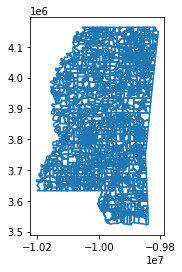

In [51]:
shapefiles_census.boundary.plot()

<AxesSubplot:>

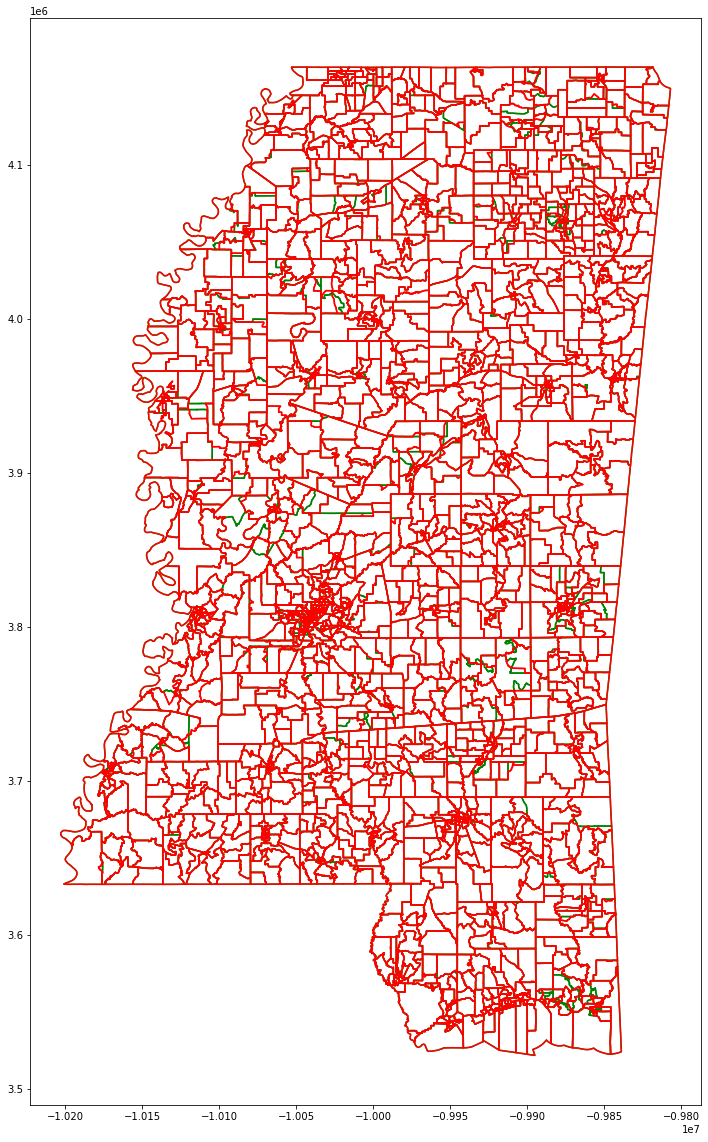

In [52]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [53]:
#Add join column
shapefiles_census['join_col'] = shapefiles_census['COUNTYFP'] + shapefiles_census['NAMELSAD']

### Complete Merges

<AxesSubplot:>

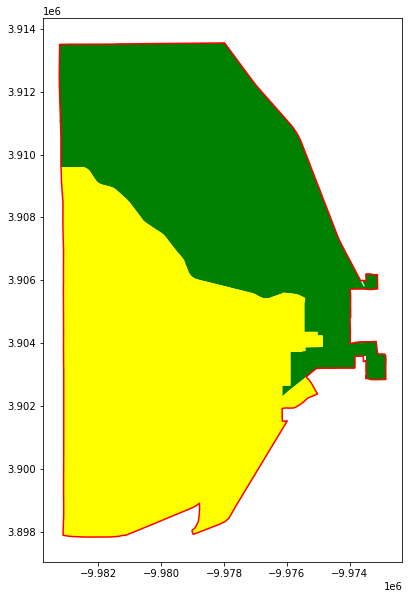

In [54]:
ax = vest_shp[vest_shp['join_col'] == '007NORTHWEST'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '007Northwest Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '007Aponaug Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [55]:
#Merge Northwest/Aponaug precincts according to VEST document
#VEST-Attala: Merge Northwest/Aponaug
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="007Northwest Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="007Aponaug Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="007Northwest Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="007Aponaug Voting District"]

<AxesSubplot:>

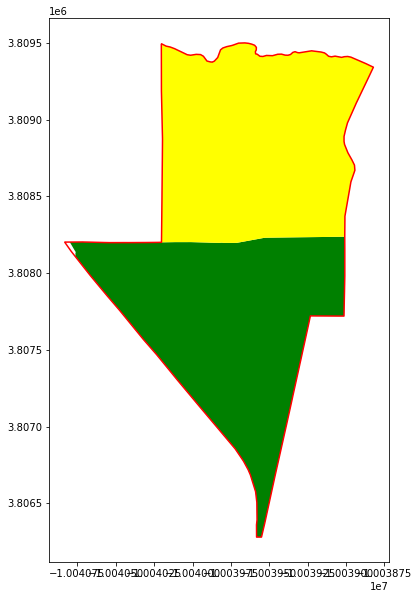

In [56]:
ax = vest_shp[vest_shp['join_col'] == '04913'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 12'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 13'].plot(figsize=(10,10),ax=ax,color="yellow")

In [57]:
#Merge 12/13 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 12"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 13"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 13","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 12"]

<AxesSubplot:>

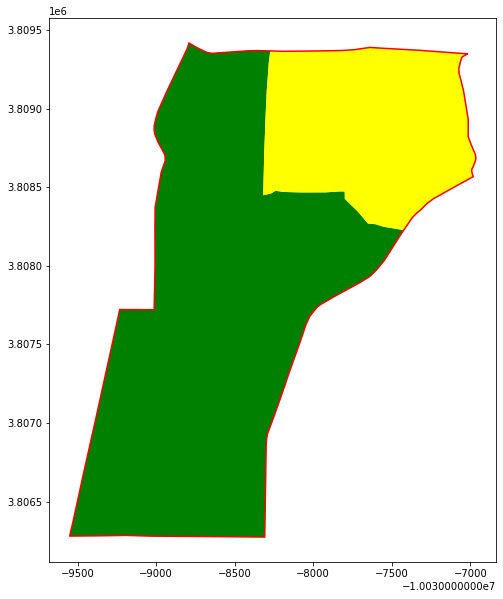

In [58]:
ax = vest_shp[vest_shp['join_col'] == '04916'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 16'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 17'].plot(figsize=(10,10),ax=ax,color="yellow")

In [59]:
#Merge 16/17 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 16"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 17"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 16","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 17"]

<AxesSubplot:>

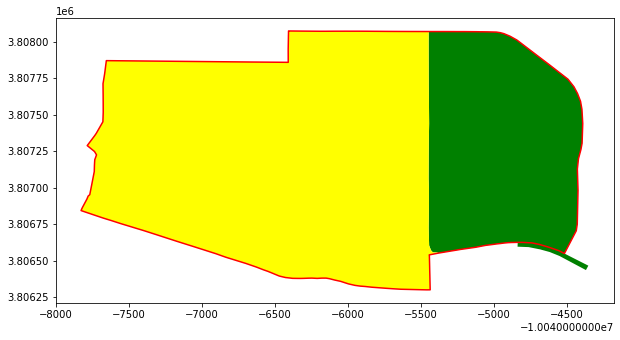

In [60]:
ax = vest_shp[vest_shp['join_col'] == '04921'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 21'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 24'].plot(figsize=(10,10),ax=ax,color="yellow")

In [61]:
#Merge 21/24 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 21"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 24"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 21","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 24"]

<AxesSubplot:>

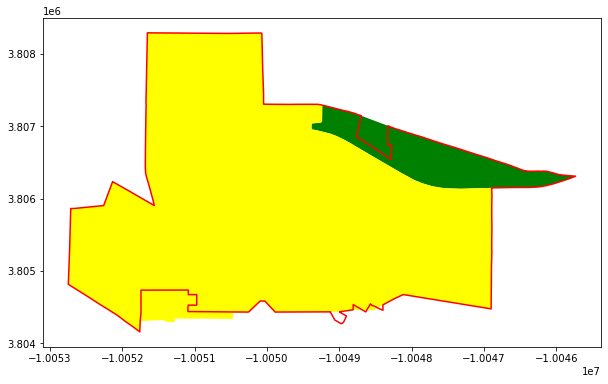

In [62]:
ax = vest_shp[vest_shp['join_col'] == '04926'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 26'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 87'].plot(figsize=(10,10),ax=ax,color="yellow")

In [63]:
#Merge 26/87 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 26"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 87"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 26","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 87"]

<AxesSubplot:>

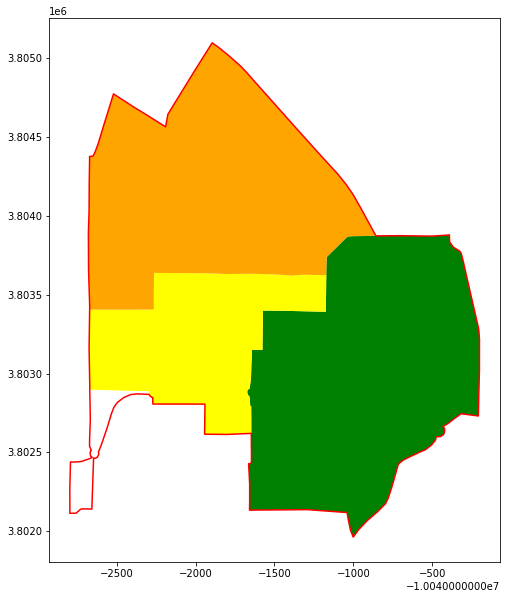

In [64]:
ax = vest_shp[vest_shp['join_col'] == '04951'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 50'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 51'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 52'].plot(figsize=(10,10),ax=ax,color="orange")

In [65]:
#Merge 50/51/52 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 50"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 51"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 52"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 51","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 50"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 52"]

<AxesSubplot:>

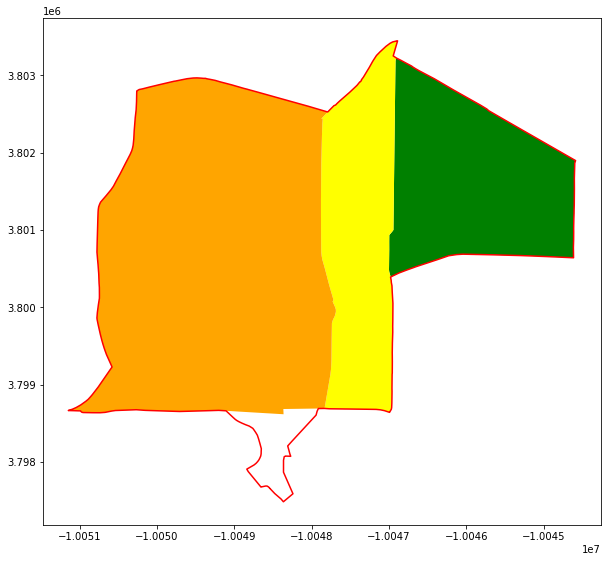

In [66]:
ax = vest_shp[vest_shp['join_col'] == '04990'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 67'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 89'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 90'].plot(figsize=(10,10),ax=ax,color="orange")

In [67]:
#Merge 67/89/90 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 67"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 89"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 90"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 90","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 67"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 89"]

<AxesSubplot:>

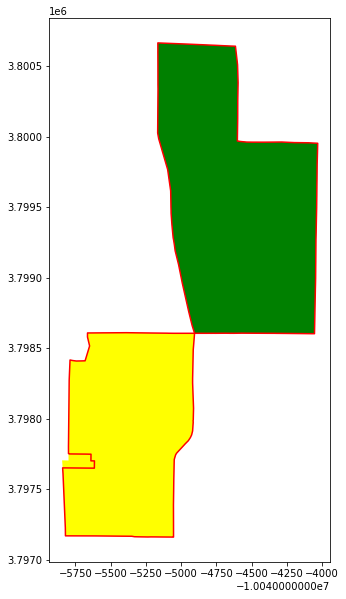

In [68]:
ax = vest_shp[vest_shp['join_col'] == '04969'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 69'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 75'].plot(figsize=(10,10),ax=ax,color="yellow")

In [69]:
#Merge 69/75 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
#Unable to Join as they aren't technically connected

<AxesSubplot:>

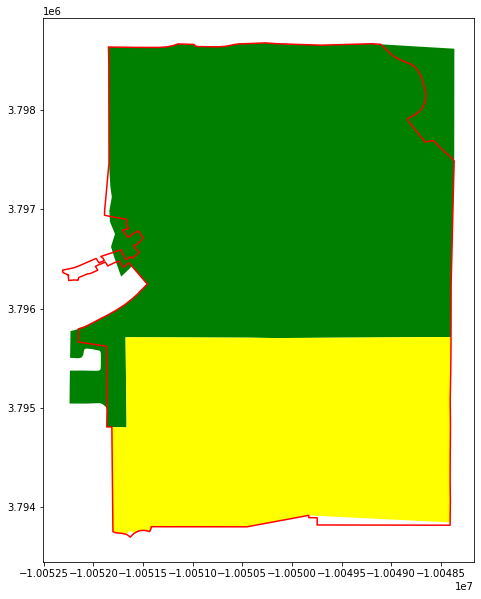

In [70]:
ax = vest_shp[vest_shp['join_col'] == '04994'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 94'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 95'].plot(figsize=(10,10),ax=ax,color="yellow")

In [71]:
#Merge 94/95 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 94"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 94"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 94","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 95"]

<AxesSubplot:>

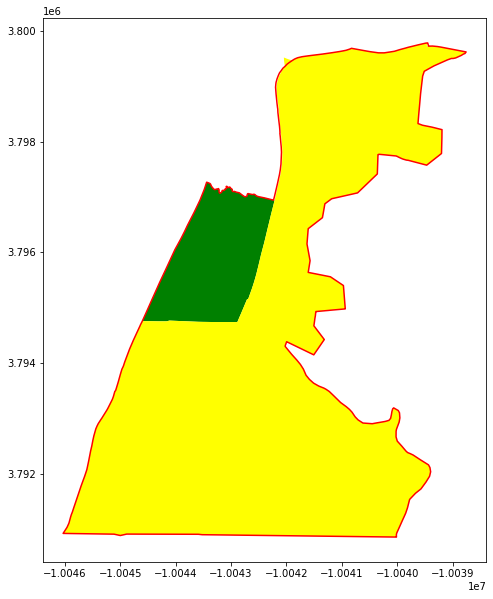

In [72]:
ax = vest_shp[vest_shp['join_col'] == '04977'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 77'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '049Voting District 97'].plot(figsize=(10,10),ax=ax,color="yellow")

In [73]:
#Merge 77/97 precincts according to VEST document
#VEST-Hinds: Merge 12/13, 16/17, 21/24, 26/87, 50/51/52, 67/89/90, 69/75, 94/95, 77/97
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 77"],shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 97"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="049Voting District 77","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="049Voting District 97"]

<AxesSubplot:>

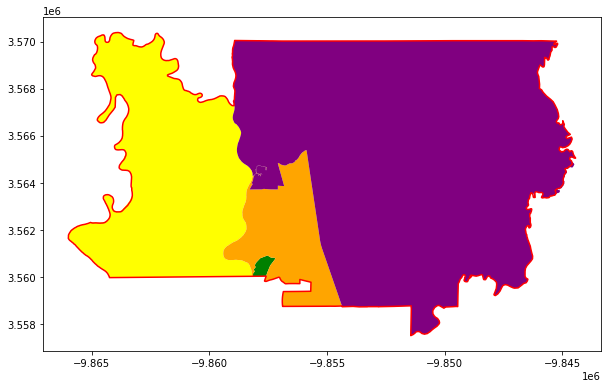

In [74]:
ax = vest_shp[vest_shp['join_col'] == '059ESCATAWPA'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Escatawpa A Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Escatawpa B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Escatawpa C Voting District'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census[shapefiles_census['join_col'] == '059Escatawpa Voting District'].plot(figsize=(10,10),ax=ax,color="purple")

In [75]:
#Merge Escatawpa precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Escatawpa A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Escatawpa B Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Escatawpa C Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Escatawpa Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Escatawpa Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Escatawpa A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Escatawpa B Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Escatawpa C Voting District"]

<AxesSubplot:>

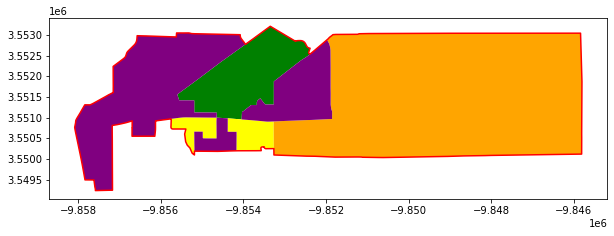

In [76]:
ax = vest_shp[vest_shp['join_col'] == '059FAIR'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Fair C Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Fair D Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Fair H Voting District'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census[shapefiles_census['join_col'] == '059Fair Voting District'].plot(figsize=(10,10),ax=ax,color="purple")

In [77]:
#Merge Fair precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Fair Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fair C Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fair D Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fair H Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Fair Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fair C Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fair D Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fair H Voting District"]

<AxesSubplot:>

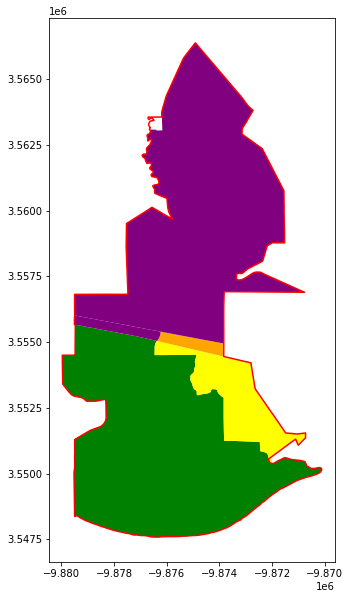

In [78]:
ax = vest_shp[vest_shp['join_col'] == '059FONTAINEBLEAU'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Fountainbleau Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Fountainbleau A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Fountainbleau B Voting District'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census[shapefiles_census['join_col'] == '059Fountainbleau C Voting District'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census[shapefiles_census['join_col'] == '059Fountainbleau D Voting District'].plot(figsize=(10,10),ax=ax,color="purple")

In [79]:
#Merge Fountainbleau precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Fountainbleau Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fountainbleau A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fountainbleau B Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fountainbleau C Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Fountainbleau D Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Fountainbleau Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fountainbleau A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fountainbleau B Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fountainbleau C Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Fountainbleau D Voting District"]

<AxesSubplot:>

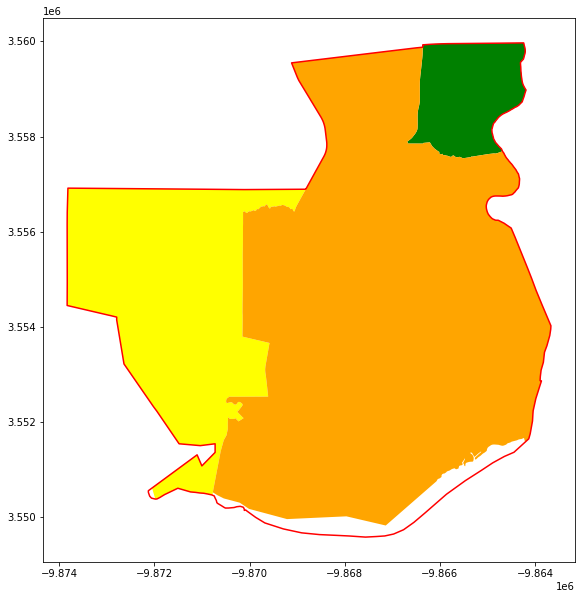

In [80]:
ax = vest_shp[vest_shp['join_col'] == '059GAUTIER'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Gautier A Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Gautier B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Gautier Voting District'].plot(figsize=(10,10),ax=ax,color="orange")

In [81]:
#Merge Gautier precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Gautier Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Gautier A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Gautier B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Gautier Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Gautier A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Gautier B Voting District"]

<AxesSubplot:>

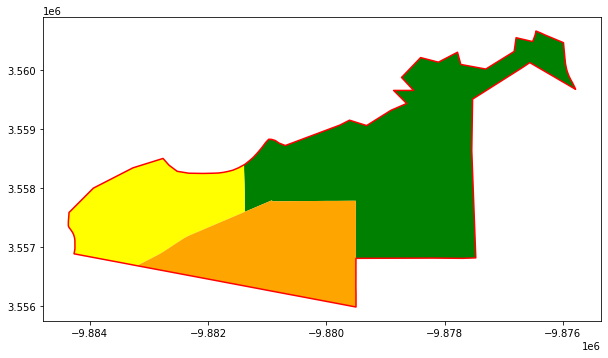

In [82]:
ax = vest_shp[vest_shp['join_col'] == '059GRACE BAPTIST'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Grace Baptist Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Grace Baptist A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Grace Baptist B Voting District'].plot(figsize=(10,10),ax=ax,color="orange")

In [83]:
#Merge Grace Baptist precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Grace Baptist Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Grace Baptist A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Grace Baptist B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Grace Baptist Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Grace Baptist A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Grace Baptist B Voting District"]

<AxesSubplot:>

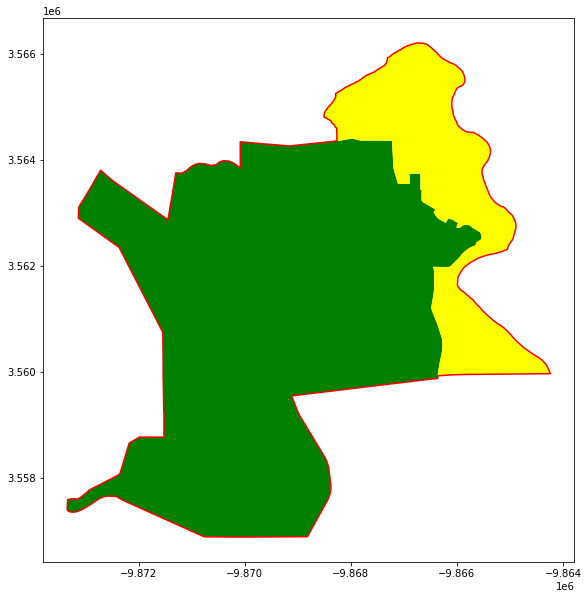

In [84]:
ax = vest_shp[vest_shp['join_col'] == '059HICKORY HILLS'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Hickory Hill Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Hickory Hills A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [85]:
#Merge Hickory Hills precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Hickory Hill Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Hickory Hills A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Hickory Hill Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Hickory Hills A Voting District"]

<AxesSubplot:>

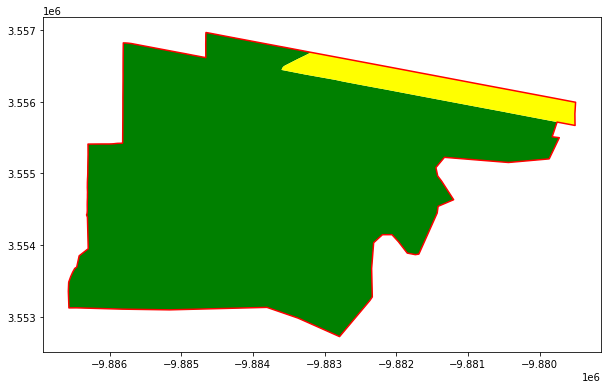

In [86]:
ax = vest_shp[vest_shp['join_col'] == '059OCEAN SPRINGS CIVIC CENTER'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Ocean Springs Civic Center A Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Ocean Springs Civic Center B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [87]:
#Merge Ocean Springs Civic Center precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Ocean Springs Civic Center A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Ocean Springs Civic Center B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Ocean Springs Civic Center A Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Ocean Springs Civic Center B Voting District"]

<AxesSubplot:>

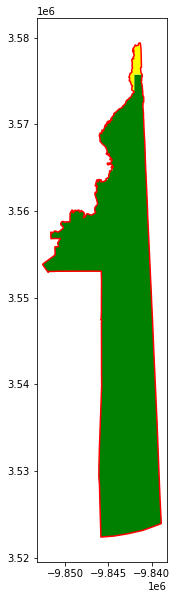

In [88]:
ax = vest_shp[vest_shp['join_col'] == '059ORANGE GROVE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Orange Grove Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Orange Grove B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [89]:
#Merge Orange Grove precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Orange Grove Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Orange Grove B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Orange Grove Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Orange Grove B Voting District"]

<AxesSubplot:>

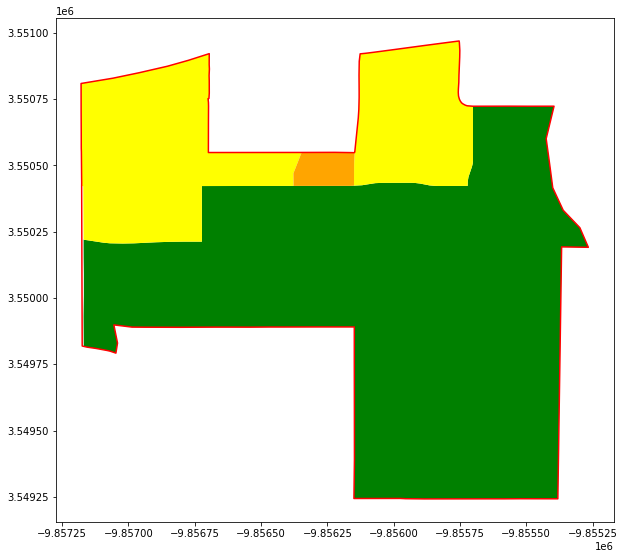

In [90]:
ax = vest_shp[vest_shp['join_col'] == '059PINECREST'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Pinecrest Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Pinecrest B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Pinecrest C Voting District'].plot(figsize=(10,10),ax=ax,color="orange")

In [91]:
#Merge Pinecrest precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Pinecrest Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Pinecrest B Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Pinecrest C Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Pinecrest Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Pinecrest B Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Pinecrest C Voting District"]

<AxesSubplot:>

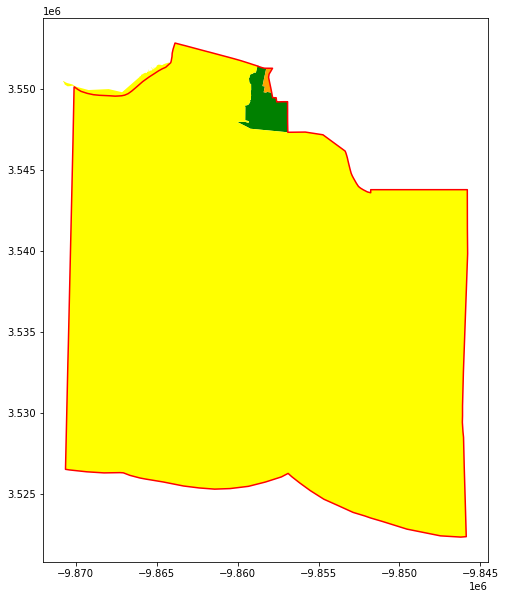

In [92]:
ax = vest_shp[vest_shp['join_col'] == '059PRESBYTERIAN'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Presbyterian Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Presbyterian A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059Presbyterian B Voting District'].plot(figsize=(10,10),ax=ax,color="orange")

In [93]:
#Merge Presbyterian precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Presbyterian Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Presbyterian A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Presbyterian B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Presbyterian Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Presbyterian A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Presbyterian B Voting District"]

<AxesSubplot:>

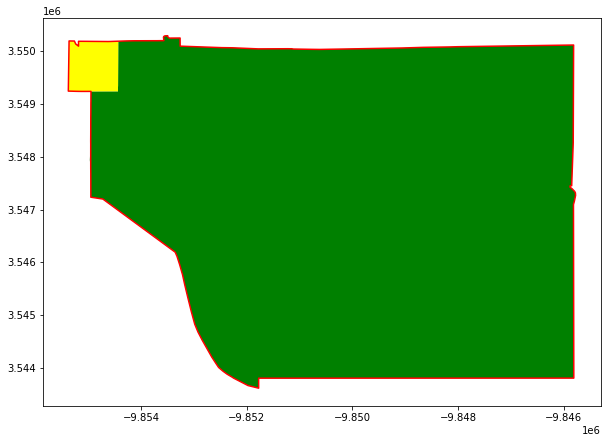

In [94]:
ax = vest_shp[vest_shp['join_col'] == '059SACRED HEART'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Sacred Heart Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Sacred Heart A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [95]:
#Merge Sacred Heart precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Sacred Heart Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Sacred Heart A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Sacred Heart Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Sacred Heart A Voting District"]

<AxesSubplot:>

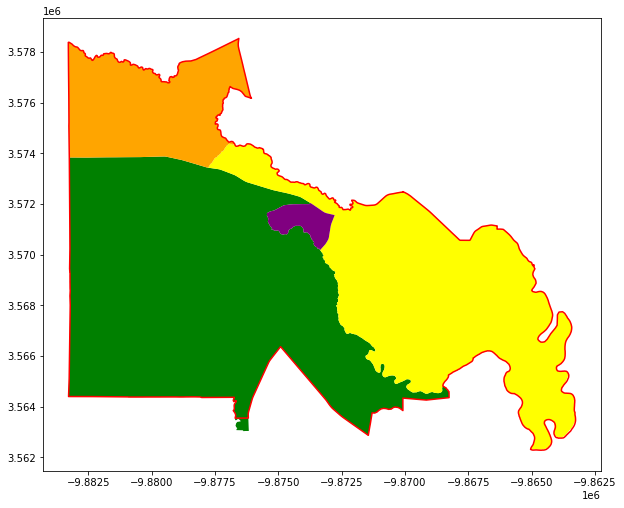

In [96]:
ax = vest_shp[vest_shp['join_col'] == '059SOUTH VANCLEAVE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059South Vancleave Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059South Vancleave A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059South Vancleave B Voting District'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census[shapefiles_census['join_col'] == '059South Vancleave C Voting District'].plot(figsize=(10,10),ax=ax,color="purple")

In [97]:
#Merge South Vancleave precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059South Vancleave Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059South Vancleave A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059South Vancleave B Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059South Vancleave C Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059South Vancleave Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059South Vancleave A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059South Vancleave B Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059South Vancleave C Voting District"]

<AxesSubplot:>

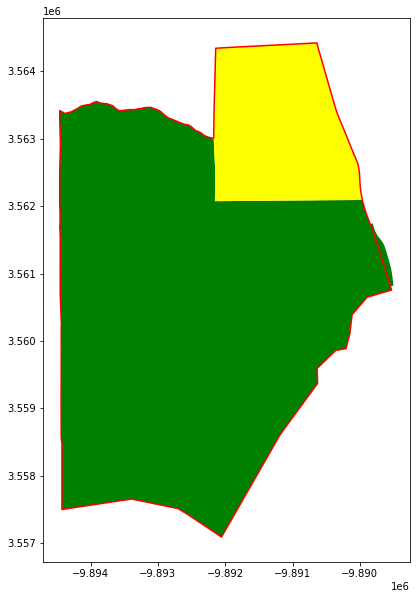

In [98]:
ax = vest_shp[vest_shp['join_col'] == '059ST. MARTIN'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059St. Martin Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059St. Martin C Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [99]:
#Merge St. Martin precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059St. Martin Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059St. Martin C Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059St. Martin Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059St. Martin C Voting District"]

<AxesSubplot:>

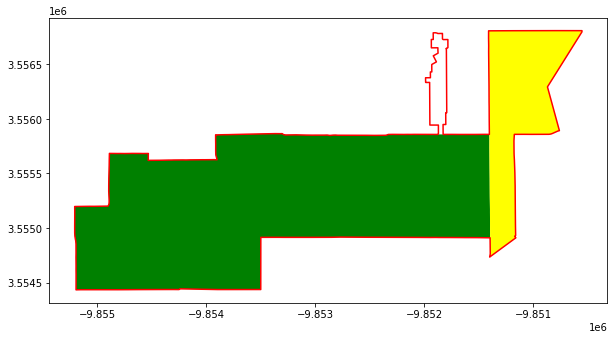

In [100]:
ax = vest_shp[vest_shp['join_col'] == '059SUE ELLEN'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059Sue Ellen Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059Sue Ellen A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [101]:
#Merge St. Martin precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059Sue Ellen Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059Sue Ellen A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059Sue Ellen Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059Sue Ellen A Voting District"]

<AxesSubplot:>

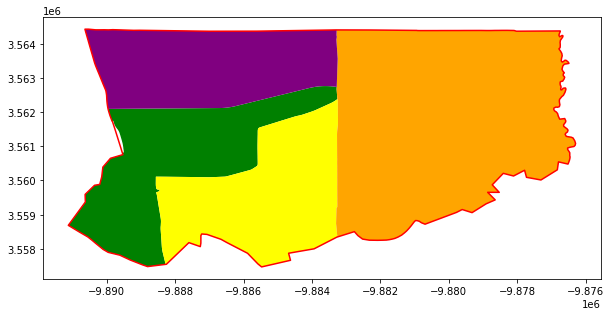

In [102]:
ax = vest_shp[vest_shp['join_col'] == '059WEST JACKSON'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059West Jackson Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059West Jackson A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '059West Jackson B Voting District'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census[shapefiles_census['join_col'] == '059West Jackson C Voting District'].plot(figsize=(10,10),ax=ax,color="purple")

In [103]:
#Merge West Jackson precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059West Jackson Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059West Jackson A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059West Jackson B Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059West Jackson C Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059West Jackson Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059West Jackson A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059West Jackson B Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059West Jackson C Voting District"]

<AxesSubplot:>

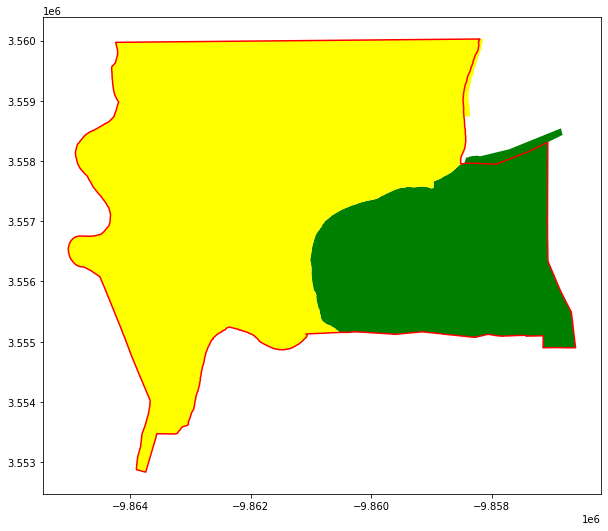

In [104]:
ax = vest_shp[vest_shp['join_col'] == '059YMBC/DANTZLER'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '059YMBC/Dantzler Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '059YMBC_Dantzler B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [105]:
#Merge MBC/Dantzler precincts according to VEST document
#VEST-Jackson: Merge all A/B/C/D splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="059YMBC/Dantzler Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="059YMBC_Dantzler B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="059YMBC/Dantzler Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="059YMBC_Dantzler B Voting District"]

<AxesSubplot:>

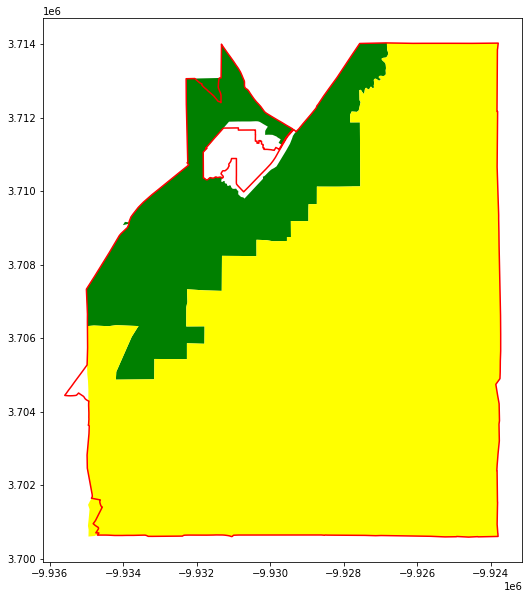

In [106]:
ax = vest_shp[vest_shp['join_col'] == '067GEORGE HARRISON'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '067G.V. Harrison Multipurpose Bldg. Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '067County Barn Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [107]:
#Merge George Harrison/County Barn precincts according to VEST document
#VEST-Jones: Merge George Harrison/County Barn
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="067G.V. Harrison Multipurpose Bldg. Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="067County Barn Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="067G.V. Harrison Multipurpose Bldg. Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="067County Barn Voting District"]

<AxesSubplot:>

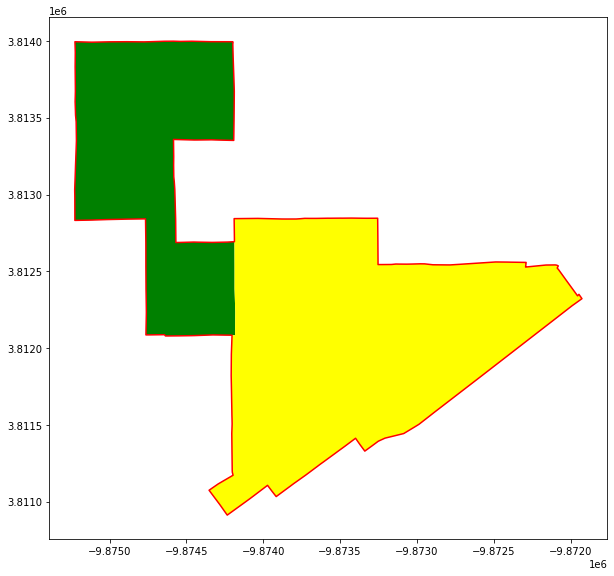

In [108]:
ax = vest_shp[vest_shp['join_col'] == '07514'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 4'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 14'].plot(figsize=(10,10),ax=ax,color="yellow")

In [109]:
#Merge 4/14 precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 4"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 14"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 14","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Voting District 4"]

<AxesSubplot:>

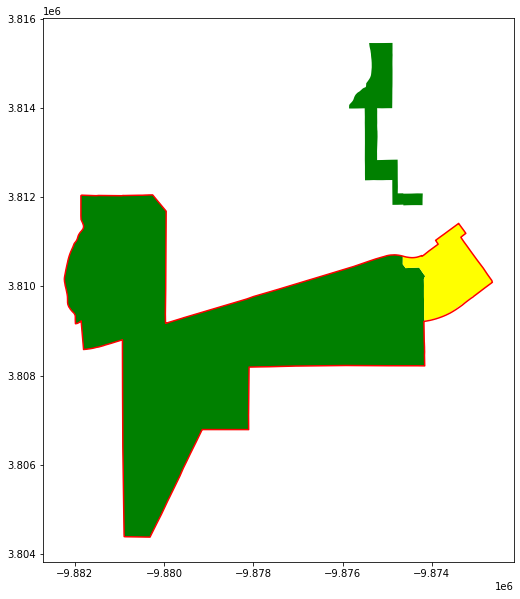

In [110]:
ax = vest_shp[vest_shp['join_col'] == '07510'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 10'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 15'].plot(figsize=(10,10),ax=ax,color="yellow")

In [111]:
#Merge 10/15 precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
#Unable to join as they aren't connected

<AxesSubplot:>

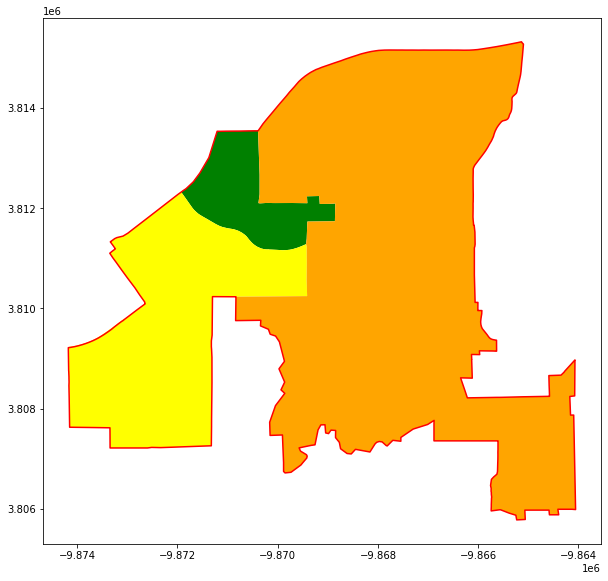

In [112]:
ax = vest_shp[vest_shp['join_col'] == '07517'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 17'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 18'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '075Voting District 19'].plot(figsize=(10,10),ax=ax,color="orange")

In [113]:
#Merge 17/18/19 precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 17"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 18"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 19"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Voting District 17","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Voting District 18"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Voting District 19"]

<AxesSubplot:>

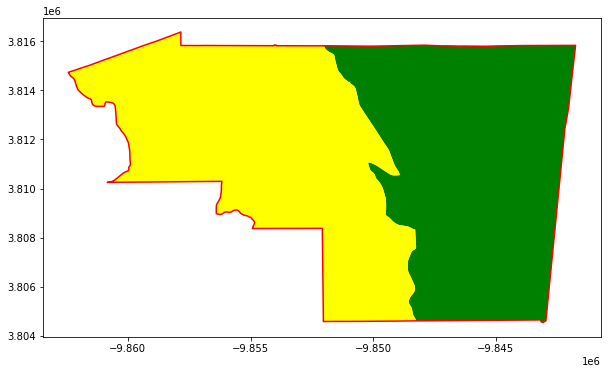

In [114]:
ax = vest_shp[vest_shp['join_col'] == '075MT. GILEAD'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Alamucha Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Mt. Gilead Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [115]:
#Merge Alamucha/Mt Gilead precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Alamucha Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Mt. Gilead Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Mt. Gilead Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Alamucha Voting District"]

<AxesSubplot:>

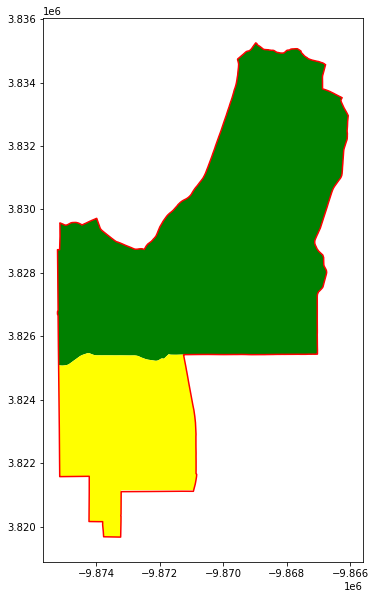

In [116]:
ax = vest_shp[vest_shp['join_col'] == '075GRACEPOINTE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Andrews Chapel Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Prospect Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [117]:
#Merge Andrews/Prospect precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Andrews Chapel Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Prospect Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Andrews Chapel Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Prospect Voting District"]

<AxesSubplot:>

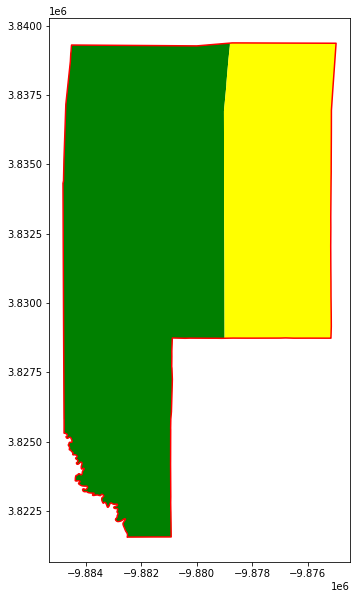

In [118]:
ax = vest_shp[vest_shp['join_col'] == '075CENTER HILL'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Center Hill Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Obadiah Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [119]:
#Merge Center Hill/Obadiah precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Center Hill Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Obadiah Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Center Hill Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Obadiah Voting District"]

<AxesSubplot:>

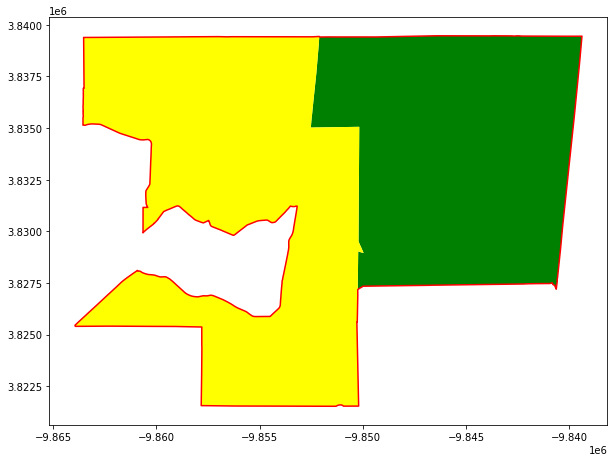

In [120]:
ax = vest_shp[vest_shp['join_col'] == '075EAST LAUDERDALE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Center Ridge Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075East Lauderdale Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [121]:
#Merge Center Ridge/E Lauderdale precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Center Ridge Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075East Lauderdale Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075East Lauderdale Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Center Ridge Voting District"]

<AxesSubplot:>

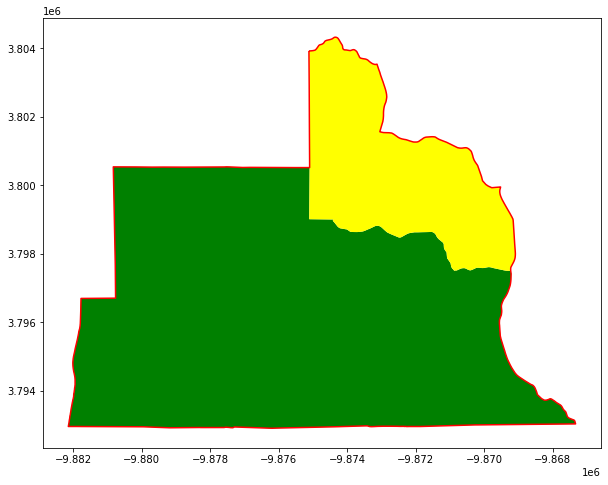

In [122]:
ax = vest_shp[vest_shp['join_col'] == '075CLARKDALE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Clarkdale Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Culpepper Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [123]:
#Merge Clarkdale/Culpepper precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Clarkdale Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Culpepper Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Clarkdale Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Culpepper Voting District"]

<AxesSubplot:>

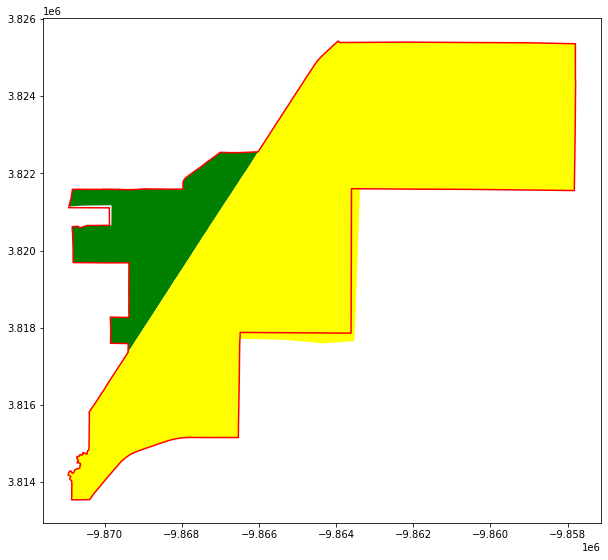

In [124]:
ax = vest_shp[vest_shp['join_col'] == '075MARION'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Marion Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075East Marion Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [125]:
#Merge Marion/E Marion precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Marion Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075East Marion Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Marion Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075East Marion Voting District"]

<AxesSubplot:>

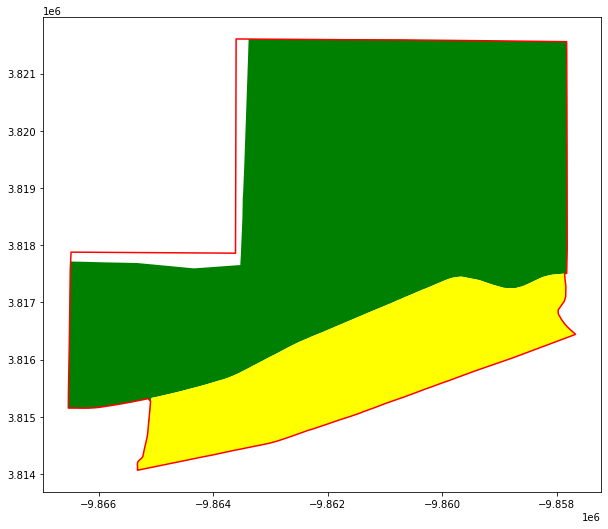

In [126]:
ax = vest_shp[vest_shp['join_col'] == '075RUSSELL'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Russell Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075South Russell Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [127]:
#Merge Russell/S Russell precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Russell Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075South Russell Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Russell Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075South Russell Voting District"]

<AxesSubplot:>

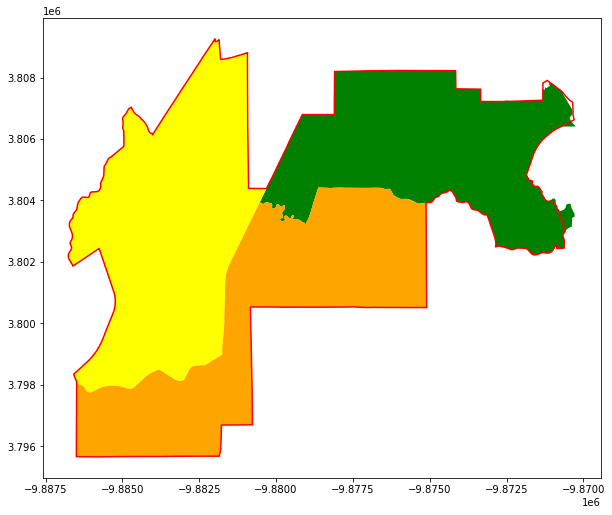

In [128]:
ax = vest_shp[vest_shp['join_col'] == '075PICKARD'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '075Pickard Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '075Sageville Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '075Valley Voting District'].plot(figsize=(10,10),ax=ax,color="orange")

In [129]:
#Merge Pickard/Sageville/Valley precincts according to VEST document
#VEST-Lauderdale: Merge 4/14, 10/15, 17/18/19, Alamucha/Mt Gilead, Andrews/Prospect as Gracepointe, Center Hill/Obadiah, Center Ridge/E Lauderdale, Clarkdale/Culpepper, Marion/E Marion, Russell/S Russell, Pickard/Sageville/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="075Pickard Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Sageville Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="075Valley Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="075Pickard Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Sageville Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="075Valley Voting District"]

<AxesSubplot:>

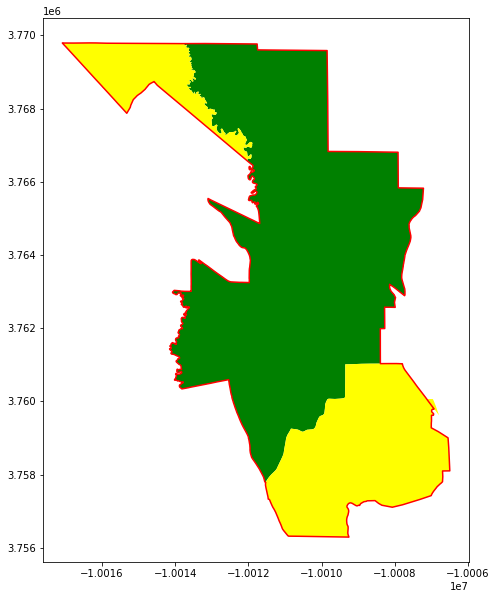

In [130]:
ax = vest_shp[vest_shp['join_col'] == '127JUPITER'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '127Jupiter Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '127Jupiter A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [131]:
#Merge Jupiter precincts according to VEST document
#VEST-Simpson: Merge all A/B splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="127Jupiter Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Jupiter A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="127Jupiter Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Jupiter A Voting District"]

<AxesSubplot:>

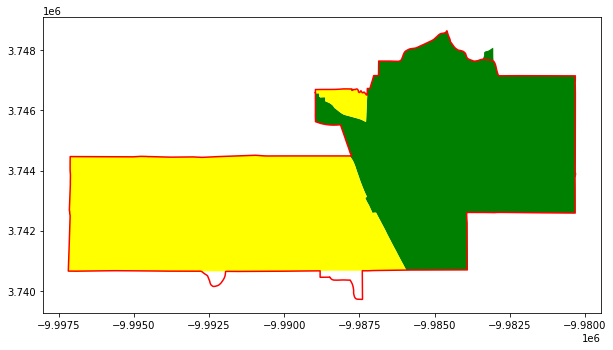

In [132]:
ax = vest_shp[vest_shp['join_col'] == '127MAGEE 2'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '127Magee 2 A Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '127Magee 2 Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [133]:
#Merge Magee 2 precincts according to VEST document
#VEST-Simpson: Merge all A/B splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="127Magee 2 Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Magee 2 A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="127Magee 2 Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Magee 2 A Voting District"]

<AxesSubplot:>

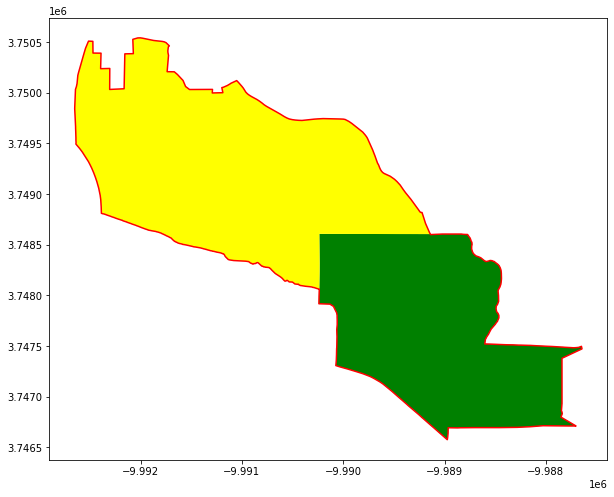

In [134]:
ax = vest_shp[vest_shp['join_col'] == '127MAGEE 4-N'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '127Magee 4-N Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '127Magee 4N A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [135]:
#Merge Magee 4-N precincts according to VEST document
#VEST-Simpson: Merge all A/B splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="127Magee 4-N Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Magee 4N A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="127Magee 4-N Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Magee 4N A Voting District"]

<AxesSubplot:>

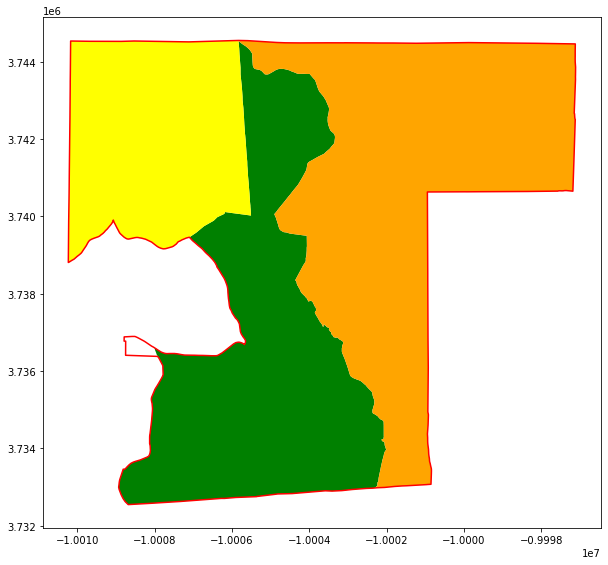

In [136]:
ax = vest_shp[vest_shp['join_col'] == '127OAK GROVE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '127Oak Grove A Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '127Oak Grove B Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census[shapefiles_census['join_col'] == '127Oak Grove Voting District'].plot(figsize=(10,10),ax=ax,color="orange")

In [137]:
#Merge Oak Grove precincts according to VEST document
#VEST-Simpson: Merge all A/B splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="127Oak Grove Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Oak Grove A Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Oak Grove B Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="127Oak Grove Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Oak Grove A Voting District"]
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Oak Grove B Voting District"]

<AxesSubplot:>

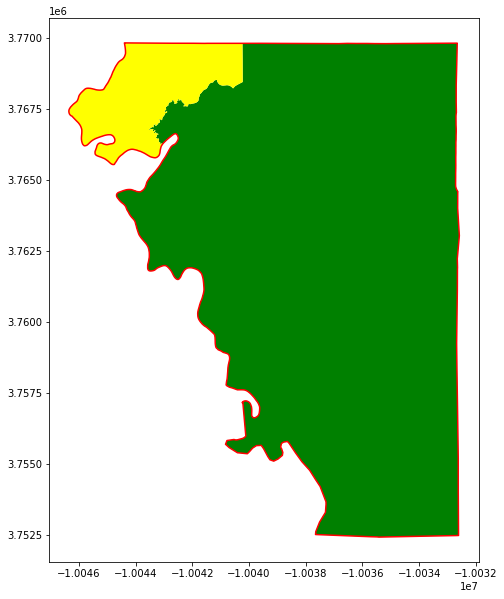

In [138]:
ax = vest_shp[vest_shp['join_col'] == '127PEARL'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '127Pearl Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '127Pearl Sub A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [139]:
#Merge Pearl precincts according to VEST document
#VEST-Simpson: Merge all A/B splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="127Pearl Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Pearl Sub A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="127Pearl Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Pearl Sub A Voting District"]

<AxesSubplot:>

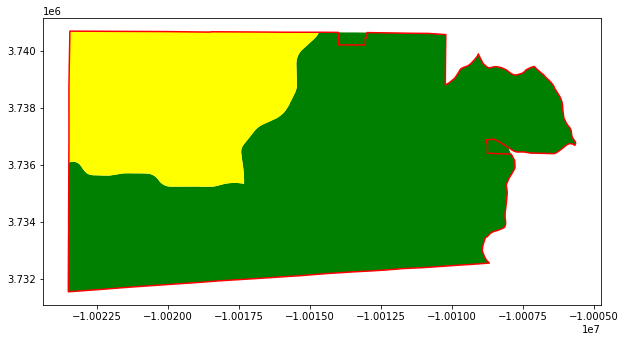

In [140]:
ax = vest_shp[vest_shp['join_col'] == '127SHIVERS'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '127Shivers Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '127Shivers A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [141]:
#Merge Shivers precincts according to VEST document
#VEST-Simpson: Merge all A/B splits
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="127Shivers Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="127Shivers A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="127Shivers Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="127Shivers A Voting District"]

<AxesSubplot:>

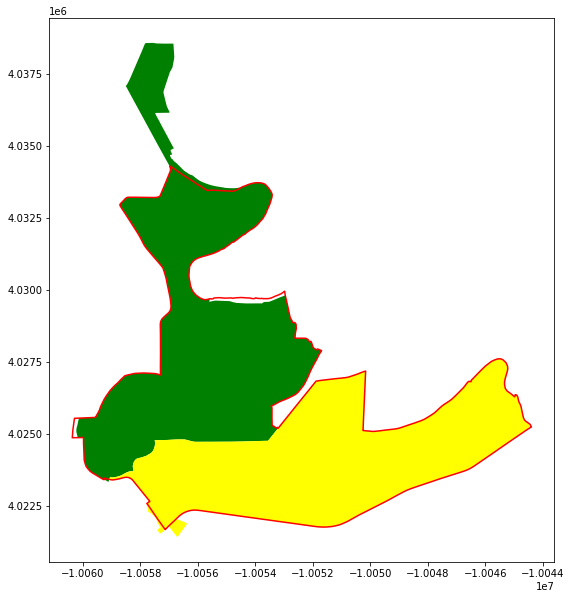

In [142]:
ax = vest_shp[vest_shp['join_col'] == '135SUMNER BEAT 2'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '135Sumner Beat 2 Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '135Webb Beat 2 Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [143]:
#Merge Sumner 2/Webb 2 precincts according to VEST document
#VEST-Tallahatchie: Merge Sumner 2/Webb 2
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="135Sumner Beat 2 Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="135Webb Beat 2 Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="135Sumner Beat 2 Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="135Webb Beat 2 Voting District"]

<AxesSubplot:>

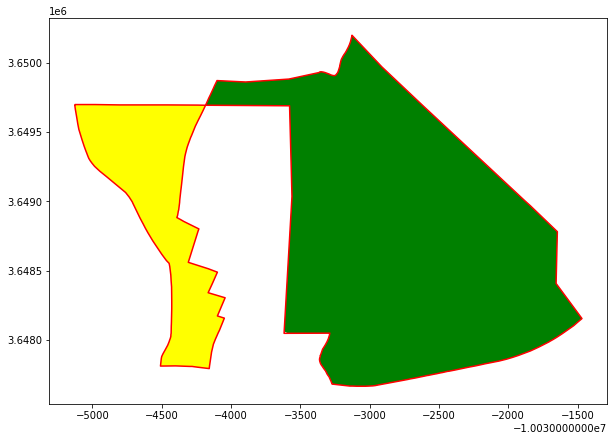

In [144]:
ax = vest_shp[vest_shp['join_col'] == '147EAST TYLERTOWN'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '147East Tylertown Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '147East Tylertown Sub A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [145]:
#Merge E Tylertown A/B precincts according to VEST document
#VEST-Walthall: Merge E Tylertown A/B, W Tylertown A/B, S Knoxo/Tylertown 3
#Unable to join as they aren't connected

<AxesSubplot:>

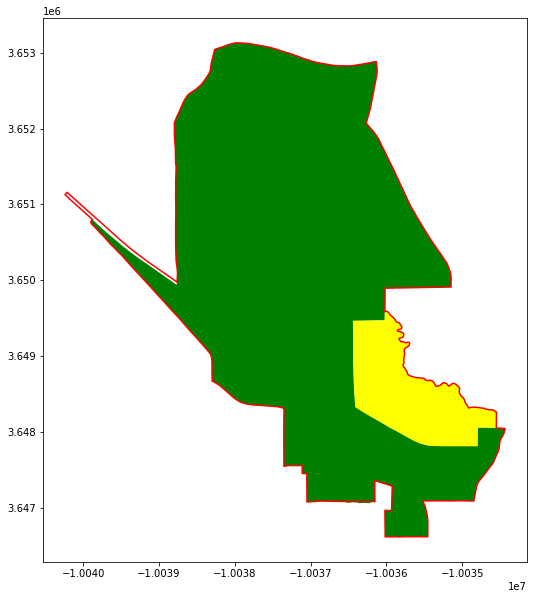

In [146]:
ax = vest_shp[vest_shp['join_col'] == '147WEST TYLERTOWN'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '147West Tylertown Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '147West Tylertown Sub A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [147]:
#Merge W Tylertown A/B precincts according to VEST document
#VEST-Walthall: Merge E Tylertown A/B, W Tylertown A/B, S Knoxo/Tylertown 3
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="147West Tylertown Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="147West Tylertown Sub A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="147West Tylertown Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="147West Tylertown Sub A Voting District"]

<AxesSubplot:>

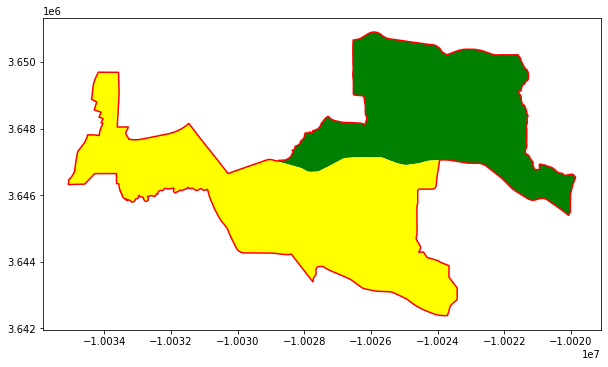

In [148]:
ax = vest_shp[vest_shp['join_col'] == '147TYLERTOWN 3'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '147South Knoxo Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '147Dist.3 Tylertown'].plot(figsize=(10,10),ax=ax,color="yellow")

In [149]:
#Merge S Knoxo/Tylertown 3 precincts according to VEST document
#VEST-Walthall: Merge E Tylertown A/B, W Tylertown A/B, S Knoxo/Tylertown 3
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="147Dist.3 Tylertown"],shapefiles_census.loc[shapefiles_census["join_col"]=="147South Knoxo Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="147Dist.3 Tylertown","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="147South Knoxo Voting District"]

<AxesSubplot:>

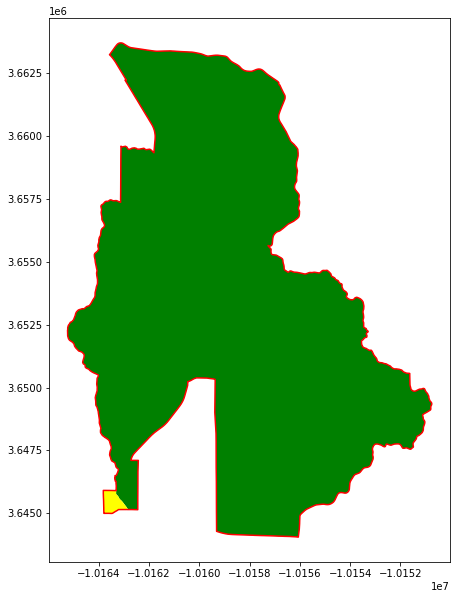

In [150]:
ax = vest_shp[vest_shp['join_col'] == '157WOODVILLE 5'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '157Woodville Fifth District Precinct'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '157Woodville 5 Sub A Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [151]:
#Merge Woodville 5/5A precincts according to VEST document
#VEST-Wilkinson: Merge Woodville 5/5A
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="157Woodville Fifth District Precinct"],shapefiles_census.loc[shapefiles_census["join_col"]=="157Woodville 5 Sub A Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="157Woodville Fifth District Precinct","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="157Woodville 5 Sub A Voting District"]

<AxesSubplot:>

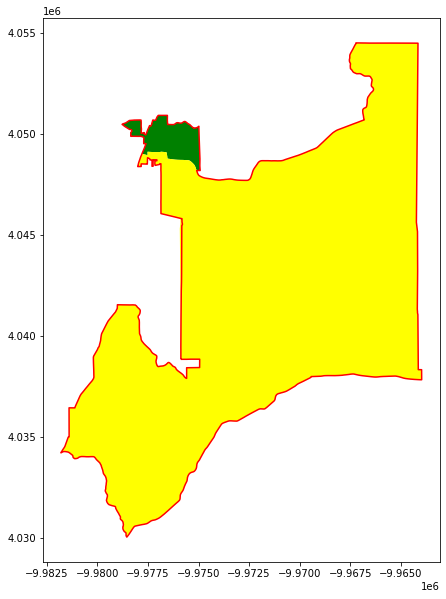

In [152]:
ax = vest_shp[vest_shp['join_col'] == '161WATER VALLEY'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '161Two North East Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '161Two South East Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [153]:
#Merge Two NE/SE precincts according to VEST document
#VEST-Yalobusha: Merge Two NE/SE as Water Valley; Split Scuna-Vann's Mill N/S
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="161Two North East Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="161Two South East Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="161Two North East Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="161Two South East Voting District"]

<AxesSubplot:>

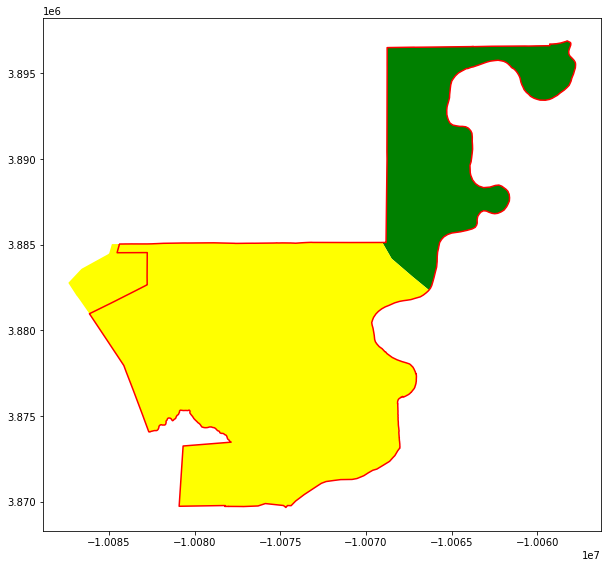

In [154]:
ax = vest_shp[vest_shp['join_col'] == '163LAKE CITY'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '163Carter Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '163Lake City Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [155]:
#Merge Carter/Lake City precincts according to VEST document
#VEST-Yazoo: Merge Carter/Lake City, Deasonville/Harttown, Dover/Robinette as Little Yazoo, Fairview/Holly Bluff, Midway E/W, Tinsley into Mechanicsburg/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="163Carter Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="163Lake City Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="163Lake City Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="163Carter Voting District"]

<AxesSubplot:>

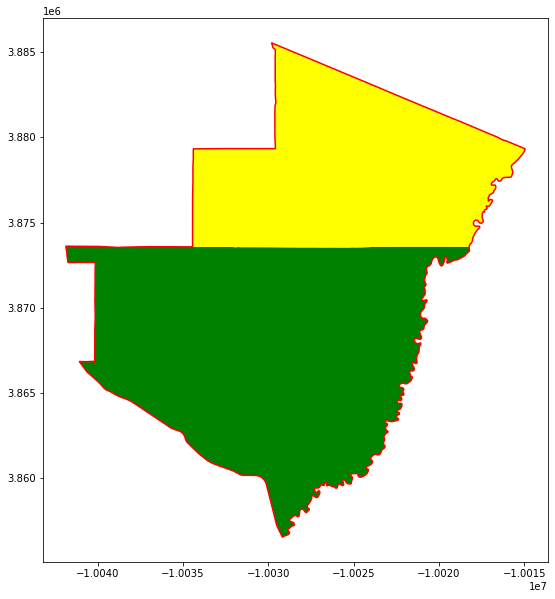

In [156]:
ax = vest_shp[vest_shp['join_col'] == '163DEASONVILLE'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '163Deasonville Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '163Harttown Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [157]:
#Merge Deasonville/Harttown precincts according to VEST document
#VEST-Yazoo: Merge Carter/Lake City, Deasonville/Harttown, Dover/Robinette as Little Yazoo, Fairview/Holly Bluff, Midway E/W, Tinsley into Mechanicsburg/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="163Deasonville Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="163Harttown Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="163Deasonville Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="163Harttown Voting District"]

<AxesSubplot:>

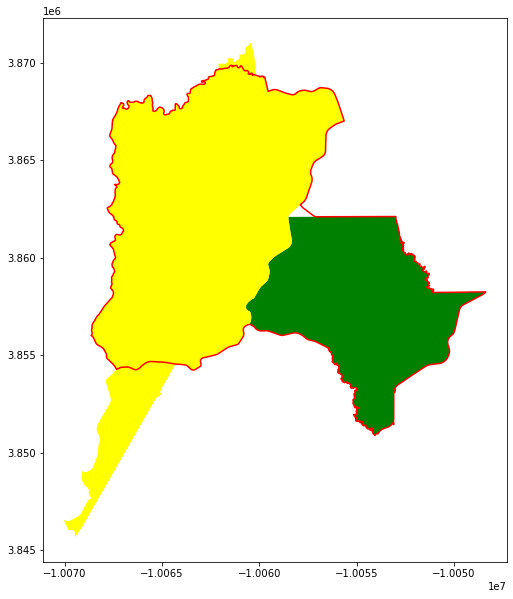

In [158]:
ax = vest_shp[vest_shp['join_col'] == '163LITTLE YAZOO'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '163Dover Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '163Robinette Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [159]:
#Merge Dover/Robinette as Little Yazoo precincts according to VEST document
#VEST-Yazoo: Merge Carter/Lake City, Deasonville/Harttown, Dover/Robinette as Little Yazoo, Fairview/Holly Bluff, Midway E/W, Tinsley into Mechanicsburg/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="163Dover Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="163Robinette Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="163Dover Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="163Robinette Voting District"]

<AxesSubplot:>

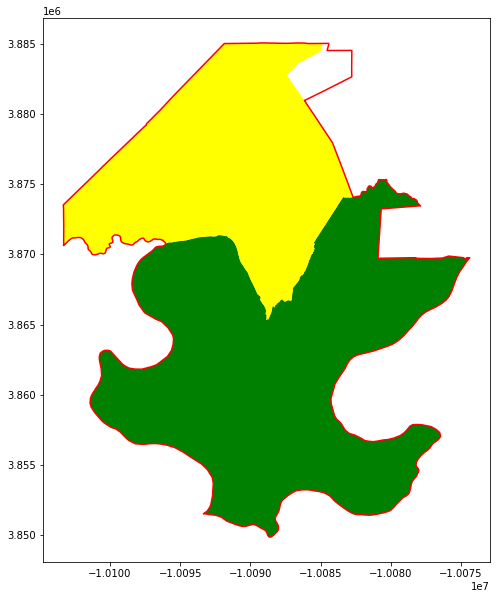

In [160]:
ax = vest_shp[vest_shp['join_col'] == '163HOLLY BLUFF'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '163Fairview Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '163Holly Bluff Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [161]:
#Merge Fairview/Holly Bluff precincts according to VEST document
#VEST-Yazoo: Merge Carter/Lake City, Deasonville/Harttown, Dover/Robinette as Little Yazoo, Fairview/Holly Bluff, Midway E/W, Tinsley into Mechanicsburg/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="163Fairview Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="163Holly Bluff Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="163Holly Bluff Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="163Fairview Voting District"]

<AxesSubplot:>

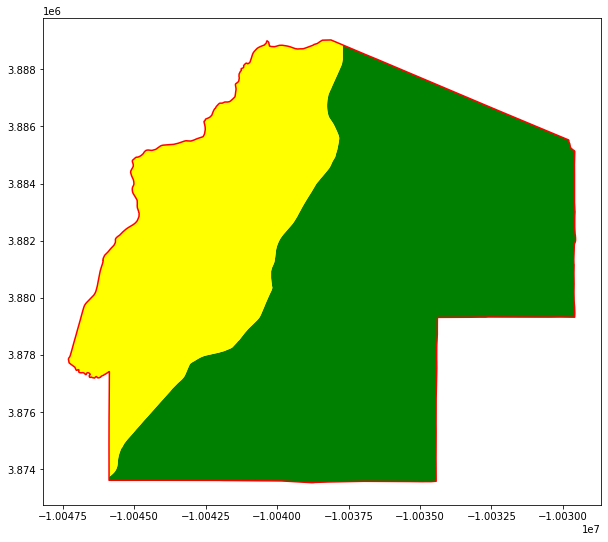

In [162]:
ax = vest_shp[vest_shp['join_col'] == '163MIDWAY'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census[shapefiles_census['join_col'] == '163East Midway Voting District'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census[shapefiles_census['join_col'] == '163West Midway Voting District'].plot(figsize=(10,10),ax=ax,color="yellow")

In [163]:
#Merge Midway E/W precincts according to VEST document
#VEST-Yazoo: Merge Carter/Lake City, Deasonville/Harttown, Dover/Robinette as Little Yazoo, Fairview/Holly Bluff, Midway E/W, Tinsley into Mechanicsburg/Valley
prec2combine = [shapefiles_census.loc[shapefiles_census["join_col"]=="163East Midway Voting District"],shapefiles_census.loc[shapefiles_census["join_col"]=="163West Midway Voting District"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
shapefiles_census.loc[shapefiles_census["join_col"]=="163East Midway Voting District","geometry"]=new_fort.unary_union
shapefiles_census = shapefiles_census[shapefiles_census["join_col"]!="163West Midway Voting District"]

### Complete Splits by merging VEST file

<AxesSubplot:>

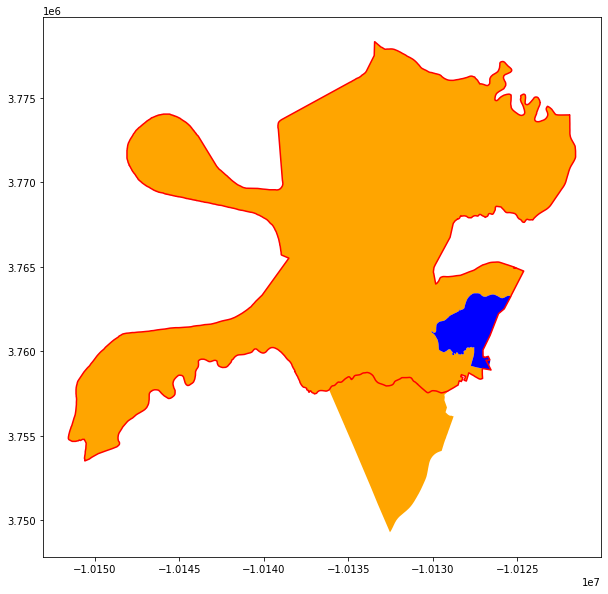

In [164]:
ax = shapefiles_census[shapefiles_census['join_col'] =='021District 2A/B'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '021DISTRICT 2A'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '021DISTRICT 2B'].plot(ax=ax, color='blue')

In [165]:
#Split 2A/2B precincts according to VEST document
#VEST-Claiborne: Split 2A/2B, 4A/4B
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="021DISTRICT 2A"],vest_shp.loc[vest_shp["join_col"]=="021DISTRICT 2B"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="021DISTRICT 2A","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="021DISTRICT 2B"]

<AxesSubplot:>

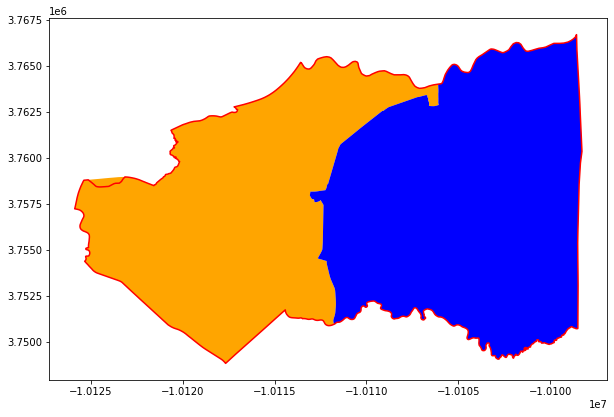

In [166]:
ax = shapefiles_census[shapefiles_census['join_col'] =='021District 4A/B'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '021DISTRICT 4A'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '021DISTRICT 4B'].plot(ax=ax, color='blue')

In [167]:
#Split 4A/4B precincts according to VEST document
#VEST-Claiborne: Split 2A/2B, 4A/4B
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="021DISTRICT 4A"],vest_shp.loc[vest_shp["join_col"]=="021DISTRICT 4B"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="021DISTRICT 4A","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="021DISTRICT 4B"]

<AxesSubplot:>

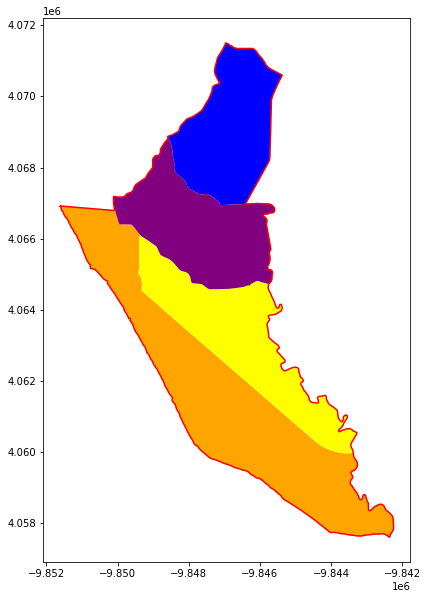

In [168]:
ax = shapefiles_census[shapefiles_census['join_col'] =='057Friendship Voting District'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '057FRIENDSHIP'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '057FRIENDSHIP 1D'].plot(ax=ax, color='blue')
vest_shp[vest_shp['join_col'] == '057FRIENDSHIP 4D'].plot(ax=ax, color='yellow')
vest_shp[vest_shp['join_col'] == '057FRIENDSHIP 5D'].plot(ax=ax, color='purple')

In [169]:
#Split Friendship precincts according to VEST document
#VEST-Itawamba: Split Friendship, Mantachie by supervisor district
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="057FRIENDSHIP"],vest_shp.loc[vest_shp["join_col"]=="057FRIENDSHIP 1D"],vest_shp.loc[vest_shp["join_col"]=="057FRIENDSHIP 4D"],vest_shp.loc[vest_shp["join_col"]=="057FRIENDSHIP 5D"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="057FRIENDSHIP","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="057FRIENDSHIP 1D"]
vest_shp = vest_shp[vest_shp["join_col"]!="057FRIENDSHIP 4D"]
vest_shp = vest_shp[vest_shp["join_col"]!="057FRIENDSHIP 5D"]

<AxesSubplot:>

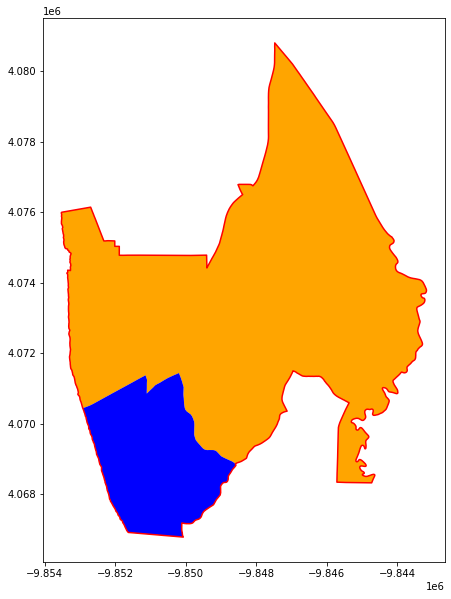

In [170]:
ax = shapefiles_census[shapefiles_census['join_col'] =='057Mantachie Voting District'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '057MANTACHIE'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '057MANTACHIE 3D'].plot(ax=ax, color='blue')

In [171]:
#Split Mantachie precincts according to VEST document
#VEST-Itawamba: Split Friendship, Mantachie by supervisor district
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="057MANTACHIE"],vest_shp.loc[vest_shp["join_col"]=="057MANTACHIE 3D"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="057MANTACHIE","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="057MANTACHIE 3D"]

<AxesSubplot:>

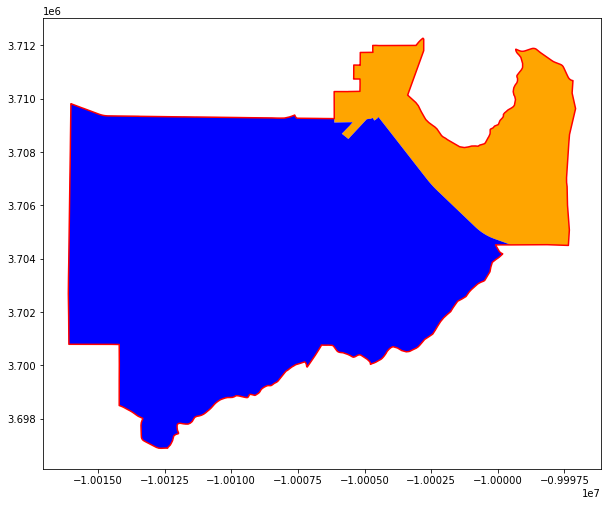

In [172]:
ax = shapefiles_census[shapefiles_census['join_col'] =='065South Prentiss Voting District'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '065SOUTH PRENTISS 12'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '065SOUTH PRENTISS 13'].plot(ax=ax, color='blue')

In [173]:
#Split South Prentiss 12/13 precincts according to VEST document
#VEST-Jefferson Davis: Split South Prentiss 12/13
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="065SOUTH PRENTISS 12"],vest_shp.loc[vest_shp["join_col"]=="065SOUTH PRENTISS 13"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="065SOUTH PRENTISS 12","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="065SOUTH PRENTISS 13"]

<AxesSubplot:>

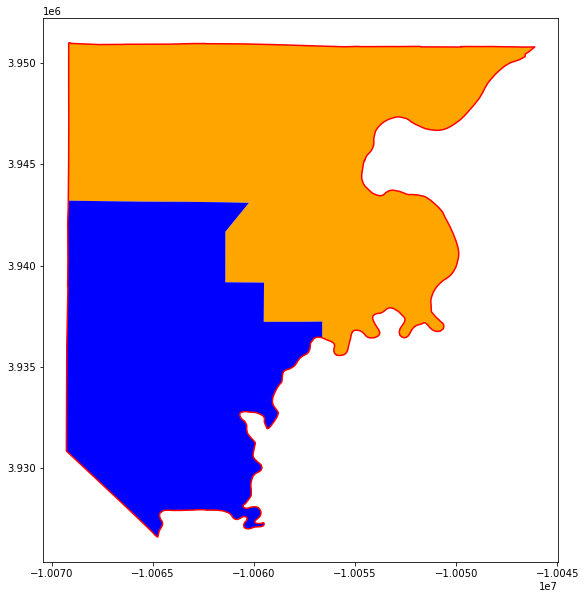

In [174]:
ax = shapefiles_census[shapefiles_census['join_col'] =='083Morgan City/Swiftown Voting District'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '083MORGAN CITY'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '083SWIFTOWN'].plot(ax=ax, color='blue')

In [175]:
#Split Morgan City/Swiftown precincts according to VEST document
#VEST-Leflore: Split Morgan City/Swiftown by zip code
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="083MORGAN CITY"],vest_shp.loc[vest_shp["join_col"]=="083SWIFTOWN"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="083MORGAN CITY","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="083SWIFTOWN"]

<AxesSubplot:>

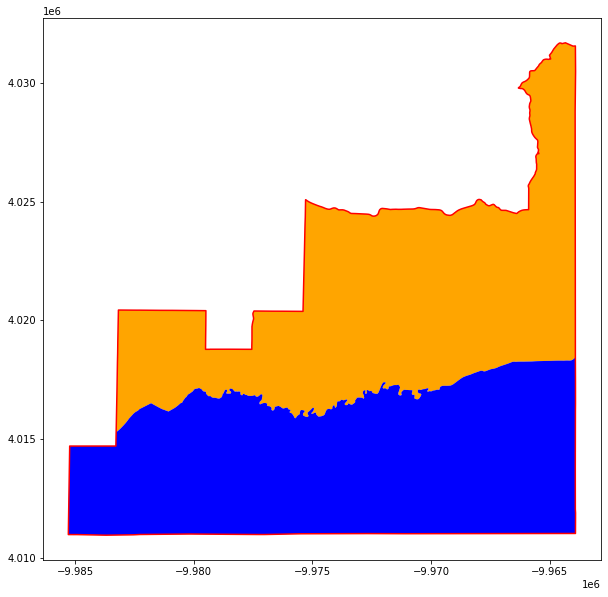

In [176]:
ax = shapefiles_census[shapefiles_census['join_col'] =='161Skuna Mills Voting District'].boundary.plot(color="red",figsize=(10,10))
vest_shp[vest_shp['join_col'] == '161SCUNA-VANNS MILL NORTH'].plot(ax = ax, color='orange')
vest_shp[vest_shp['join_col'] == '161SCUNA-VANNS MILL SOUTH'].plot(ax=ax, color='blue')

In [177]:
#Split Morgan City/Swiftown precincts according to VEST document
#VEST-Yalobusha: Merge Two NE/SE as Water Valley; Split Scuna-Vann's Mill N/S
prec2combine = [vest_shp.loc[vest_shp["join_col"]=="161SCUNA-VANNS MILL NORTH"],vest_shp.loc[vest_shp["join_col"]=="161SCUNA-VANNS MILL SOUTH"]]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 3857)
vest_shp.loc[vest_shp["join_col"]=="161SCUNA-VANNS MILL SOUTH","geometry"]=new_fort.unary_union
vest_shp = vest_shp[vest_shp["join_col"]!="083SWIFTOWN"]

## Join Election Results and Census Shapefile

In [178]:
join_attempt_er1 = pd.merge(shapefiles_census,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_er1["_merge"].value_counts())

left_only     1778
right_only    1765
both             0
Name: _merge, dtype: int64


In [179]:
join_attempt_er1[join_attempt_er1['_merge'] != 'both'][['COUNTYFP','NAMELSAD','COUNTYFP20','Precinct','join_col']].head(10)

,COUNTYFP,NAMELSAD,COUNTYFP20,Precinct,join_col
0,001,Courthouse Voting District,NaN,NaN,001Courthouse Voting District
1,001,By-Pass Firestation Voting District,NaN,NaN,001By-Pass Firestation Voting District
2,001,Bellemont Voting District,NaN,NaN,001Bellemont Voting District
3,001,Liberty Park Voting District,NaN,NaN,001Liberty Park Voting District
4,001,Duncan Park Voting District,NaN,NaN,001Duncan Park Voting District
5,001,Beau Pre Voting District,NaN,NaN,001Beau Pre Voting District
6,001,Kingston Voting District,NaN,NaN,001Kingston Voting District
7,001,Convention Center Voting District,NaN,NaN,001Convention Center Voting District
8,001,Maryland Voting District,NaN,NaN,001Maryland Voting District
9,001,Palestine Voting District,NaN,NaN,001Palestine Voting District


In [180]:
shp_election_dict = {'001Airport Voting District': '001AIRPORT',
 '001Beau Pre Voting District': '001BEAU PRE',
 '001Bellemont Voting District': '001BELLEMONT',
 '001By-Pass Firestation Voting District': '001BY-PASS FIRESTATION',
 '001Carpenter Voting District': '001CARPENTER',
 '001Concord Voting District': '001CONCORD',
 '001Convention Center Voting District': '001NPS MULTI PURPOSE BLDG',
 '001Courthouse Voting District': '001COURTHOUSE',
 '001Duncan Park Voting District': '001DUNCAN PARK',
 '001Foster Mound Voting District': '001FOSTER MOUND',
 '001Kingston Voting District': '001KINGSTON',
 '001Liberty Park Voting District': '001LIBERTY PARK',
 '001Maryland Voting District': '001MARYLAND HEIGHTS',
 '001Morgantown Voting District': '001MORGANTOWN',
 '001Northside School Voting District': '001NORTHSIDE SCHOOL',
 '001Oakland Voting District': '001OAKLAND',
 '001Palestine Voting District': '001PALESTINE',
 '001Pine Ridge Voting District': '001PINE RIDGE',
 '001Washington Voting District': '001WASHINGTON',
 '003Bethel Voting District': '003BETHEL',
 '003Biggersville Voting District': '003BIGGERSVILLE',
 '003Central Voting District': '003CENTRAL',
 '003College Hill Voting District': '003COLLEGE HILL',
 '003East Corinth Voting District': '003EAST CORINTH',
 '003Five-Point Voting District': '003FIVE-POINT',
 '003Glen Voting District': '003GLEN',
 '003Jacinto Voting District': '003JACINTO',
 '003Kossuth Voting District': '003KOSSUTH',
 '003North Corinth Voting District': '003NORTH CORINTH',
 '003Pinecrest Voting District': '003PINECREST',
 '003Rienzi Voting District': '003RIENZI',
 '003Shady Grove Voting District': '003SHADY GROVE',
 '003South Corinth Voting District': '003SOUTH CORINTH',
 '003Union Center Voting District': '003UNION CENTER',
 '003Wenasoga Voting District': '003WENASOGA',
 '003West Corinth Voting District': '003WEST CORINTH',
 '005Amite River Voting District': '005AMITE RIVER',
 '005Ariel Voting District': '005ARIEL',
 '005Berwick Voting District': '005BERWICK',
 '005Crosby Voting District': '005CROSBY',
 '005East Centreville Voting District': '005EAST CENTREVILLE',
 '005East Fork Voting District': '005EAST FORK',
 '005East Gloster Voting District': '005EAST GLOSTER',
 '005East Liberty Voting District': '005EAST LIBERTY',
 '005Gloster Voting District': '005GLOSTER',
 '005Homochitto Voting District': '005HOMOCHITTO',
 '005Liberty Voting District': '005LIBERTY',
 '005New Zion Voting District': '005NEW ZION',
 '005Oneil Voting District': '005ONEIL',
 '005Riceville Voting District': '005RICEVILLE',
 '005Smithdale Voting District': '005SMITHDALE',
 '005South Liberty Voting District': '005SOUTH LIBERTY',
 '005Tangipahoa Voting District': '005TANGIPAHOA',
 '005Tickfaw Voting District': '005TICKFAW',
 '005Vance Park Voting District': '005VANCE PARK',
 '005Walls Voting District': '005WALLS',
 '005Zion Hill Voting District': '005ZION HILL',
 '007Berea Voting District': '007BEREA',
 '007Carmack Voting District': '007CARMACK',
 '007East Voting District': '007EAST',
 '007Ethel Voting District': '007ETHEL',
 '007Hesterville Voting District': '007HESTERVILLE',
 '007Liberty Chapel Voting District': '007LIBERTY CHAPEL',
 '007McAdams Voting District': '007MCADAMS',
 '007McCool Voting District': '007MCCOOL',
 '007Newport Voting District': '007NEWPORT',
 '007North Central Voting District': '007NORTH CENTRAL',
 '007Northeast Voting District': '007NORTHEAST',
 '007Northwest Voting District': '007NORTHWEST',
 '007Possumneck Voting District': '007POSSUMNECK',
 '007Providence Voting District': '007PROVIDENCE',
 '007Sallis Voting District': '007SALLIS',
 '007South Central Voting District': '007SOUTH CENTRAL',
 '007Southwest Voting District': '007SOUTHWEST',
 '007Thompson Voting District': '007THOMPSON',
 '007Williamsville Voting District': '007WILLIAMSVILLE',
 '007Zama Voting District': '007ZAMA',
 '009Ashland Voting District': '009ASHLAND',
 '009Canaan Voting District': '009CANAAN',
 '009Floyd Voting District': '009FLOYD',
 '009Hickory Flat Voting District': '009HICKORY FLAT',
 '009Lamar Voting District': '009LAMAR',
 '011Benoit Voting District': '011BENOIT',
 '011Beulah Voting District': '011BEULAH',
 '011Boyle Voting District': '011BOYLE',
 '011Choctaw Voting District': '011CHOCTAW',
 '011Cleveland Courthouse Voting District': '011CLEVELAND COURTHOUSE',
 '011Cleveland Eastgate Voting District': '011EASTGATE',
 '011Duncan/Alligator Voting District': '011DUNCAN/ALLIGATOR',
 '011East Central Cleveland Voting District': '011EAST CENTRAL CLEVELAND',
 '011East Cleveland Voting District': '011EAST CLEVELAND',
 '011East Rosedale Voting District': '011EAST ROSEDALE',
 '011Longshot Voting District': '011LONGSHOT',
 '011Merigold Voting District': '011MERIGOLD',
 '011Mound Bayou Voting District': '011MOUND BAYOU',
 '011North Cleveland Voting District': '011NORTH CLEVELAND',
 '011Northwest Cleveland Voting District': '011NORTHWEST CLEVELAND',
 '011Pace Voting District': '011PACE',
 '011Renova Voting District': '011RENOVA',
 '011Round Lake Gunnison Deeson Voting District': '011GUNNISON',
 '011Scott Voting District': '011SCOTT',
 '011Shaw Voting District': '011SHAW',
 '011Shelby Voting District': '011SHELBY',
 '011Skene Voting District': '011SKENE',
 '011South Cleveland Voting District': '011SOUTH CLEVELAND',
 '011Stringtown Voting District': '011STRINGTOWN',
 '011West Central Cleveland Voting District': '011WEST CENTRAL CLEVELAND',
 '011West Cleveland Voting District': '011WEST CLEVELAND',
 '011West Rosedale Voting District': '011WEST ROSEDALE',
 '011Winstonville Voting District': '011WINSTONVILLE',
 '013Banner Voting District': '013BANNER',
 '013Calhoun City 1 Voting District': '013CALHOUN CITY 1',
 '013Calhoun City 4 Voting District': '013CALHOUN CITY 4',
 '013Derma 5 Voting District': '013DERMA 5',
 '013NE Calhoun Voting District': '013NE CALHOUN',
 '013Vardaman Voting District': '013VARDAMAN',
 '015Black Hawk Voting District': '015BLACK HAWK',
 '015Calvary Voting District': '015CALVARY',
 '015Carrollton Voting District': '015CARROLLTON',
 '015East Vaiden Voting District': '015EAST VAIDEN',
 '015Fire Tower Voting District': '015FIRE TOWER',
 '015Gravel Hill Voting District': '015GRAVEL HILL',
 '015Jefferson Voting District': '015JEFFERSON',
 '015McCarley Voting District': '015MCCARLEY',
 '015North Carrollton Voting District': '015NORTH CARROLLTON',
 "015Ray's Shop Voting District": "015RAY'S SHOP",
 '015Salem Voting District': '015SALEM',
 '015Voting District 430 School': '015430 SCHOOL',
 '015West Carroll Voting District': '015WEST CARROLL',
 '015West Vaiden Voting District': '015WEST VAIDEN',
 '017Anchor Voting District': '017ANCHOR',
 '017Buena Vista Voting District': '017BUENA VISTA',
 '017East Okolona Voting District': '017EAST OKOLONA',
 '017Egypt Voting District': '017EGYPT',
 '017North Houlka Voting District': '017NORTH HOULKA',
 '017North Okolona Voting District': '017NORTH OKOLONA',
 '017Northwest Houston Voting District': '017NORTHWEST HOUSTON',
 '017Pearsall Voting District': '017PEARSALL',
 '017Pleasant Grove Voting District': '017PLEASANT GROVE',
 '017South Houlka Voting District': '017SOUTH HOULKA',
 '017Southeast Houston Voting District': '017SOUTHEAST HOUSTON',
 '017Sparta Voting District': '017SPARTA',
 '017Van Vleet Voting District': '017VAN VLEET',
 '017West Okolona Voting District': '017WEST OKOLONA',
 '017Woodland Voting District': '017WOODLAND',
 '019Byway Voting District': '019BYWAY',
 '019Chester Voting District': '019CHESTER',
 '019District 5': '019DISTRICT 5',
 '019East Weir Voting District': '019EAST WEIR',
 '019Fentress Voting District': '019FENTRESS',
 '019French Camp Voting District': '019FRENCH CAMP',
 '019Hebron Voting District': '019HEBRON',
 '019Kenego Voting District': '019KENEGO',
 '019Panhandle Voting District': '019PANHANDLE',
 '019Reform Voting District': '019REFORM',
 '019Sherwood Voting District': '019SHERWOOD',
 '019SW Ackerman Voting District': '019SW ACKERMAN',
 '019West Weir Voting District': '019WEST WEIR',
 '021District 1A': '021DISTRICT 1A',
 '021District 3A': '021DISTRICT 3A',
 '021District 3B': '021DISTRICT 3B',
 '021District 4D': '021DISTRICT 4D',
 '021District 5A': '021DISTRICT 5A',
 '021District 5B': '021DISTRICT 5B',
 '023Beaverdam Voting District': '023BEAVERDAM',
 '023Carmichael Voting District': '023CARMICHAEL',
 '023Desoto Voting District': '023DESOTO',
 '023East Quitman Voting District': '023EAST QUITMAN',
 '023Energy Voting District': '023ENERGY',
 '023Enterprise Voting District': '023ENTERPRISE',
 '023Harmony Beat 1 Voting District': '023HARMONY BEAT 1',
 '023Harmony Beat 2 Voting District': '023HARMONY BEAT 2',
 '023Hopewell Voting District': '023HOPEWELL',
 '023Langsdale Voting District': '023LANGSDALE',
 '023Manassa Voting District': '023MANASSA',
 '023North Quitman Voting District': '023NORTH QUITMAN',
 '023Oak Grove Voting District': '023OAKGROVE',
 '023Pachuta Voting District': '023PACHUTA',
 "023Pierce's Springs Voting District": '023SPRINGS',
 '023Rolling Creek Voting District': '023ROLLING CREEK',
 '023Shubuta Voting District': '023SHUBUTA',
 '023Snell Voting District': '023SNELL',
 '023Souinlovie Voting District': '023SOUINLOVIE',
 '023South Quitman Voting District': '023SOUTH QUITMAN',
 '023Stonewall Beat 1 Voting District': '023STONEWALL BEAT 1',
 '023Stonewall Beat 3 Voting District': '023STONEWALL BEAT 3',
 '023Union Voting District': '023UNION',
 '025Cairo Voting District': '025CAIRO',
 '025Caradine Voting District': '025CARADINE',
 '025Cedar Bluff Voting District': '025CEDAR BLUFF',
 '025Central West Point Voting District': '025CENTRAL WEST POINT',
 '025East West Point Voting District': '025EAST WEST POINT',
 '025North West Point Voting District': '025NORTH WEST POINT',
 '025Pheba Voting District': '025PHEBA',
 '025Pine Bluff Voting District': '025PINE BLUFF',
 '025Siloam Voting District': '025SILOAM',
 '025South West Point Voting District': '025SOUTH WEST POINT',
 '025Tibbee Voting District': '025TIBBEE',
 '025Union Star Voting District': '025UNION STAR',
 '025Vinton Voting District': '025VINTON',
 '025West West Point Voting District': '025WEST WEST POINT',
 '027Bobo Voting District': '027BOBO',
 '027Cagle Crossing Voting District': '027CAGLE CROSSING',
 '027Clarksdale 2 Voting District': '027CLARKSDALE 2',
 '027Clarksdale 3 Voting District': '027CLARKSDALE 3',
 '027Clarksdale 4 North Voting District': '027CLARKSDALE 4 NORTH',
 '027Clarksdale 4 Voting District': '027CLARKSDALE 4',
 '027Clarksdale 5 Voting District': '027CLARKSDALE 5',
 '027Clarksdale Courthouse Voting District': '027CLARKSDALE COURTHOUSE',
 '027Coahoma Voting District': '027COAHOMA',
 '027Dublin Voting District': '027DUBLIN',
 '027Farrell Voting District': '027FARRELL',
 "027Friar's Point Voting District": "027FRIAR'S POINT",
 '027Jonestown Voting District': '027JONESTOWN',
 '027Lula Voting District': '027LULA',
 '027Lyons Voting District': '027LYON',
 '027Rena Lara Voting District': '027RENA LARA',
 '027Roundaway Voting District': '027ROUNDAWAY',
 '027Sasse St. Fire Station Voting District': '027SASSE ST. FIRE STATION',
 '029Beauregard Voting District': '029BEAUREGARD',
 '029Carpenter Voting District': '029CARPENTER',
 '029Centerpoint Voting District': '029CENTERPOINT',
 '029Crystal Springs East Voting District': '029CRYSTAL SPRINGS EAST',
 '029Crystal Springs North Voting District': '029CRYSTAL SPRINGS NORTH',
 '029Crystal Springs South Voting District': '029CRYSTAL SPRINGS SOUTH',
 '029Crystal Springs West Voting District': '029CRYSTAL SPRINGS WEST',
 '029Dentville Voting District': '029DENTVILLE',
 '029Gallman Voting District': '029GALLMAN',
 '029Georgetown North Voting District': '029GEORGETOWN NORTH',
 '029Georgetown South Voting District': '029GEORGETOWN SOUTH',
 '029Hazlehurst East Voting District': '029HAZLEHURST EAST',
 '029Hazlehurst North Voting District': '029HAZLEHURST NORTH',
 '029Hazlehurst South Voting District': '029HAZLEHURST SOUTH',
 '029Hazlehurst West Voting District': '029HAZLEHURST WEST',
 '029Martinsville Voting District': '029MARTINSVILLE',
 '029Shady Grove Voting District': '029SHADY GROVE',
 '029Strong Hope-Union Voting District': '029STRONG HOPE-UNION',
 '029Wesson Voting District': '029WESSON',
 '031Collins Voting District': '031COLLINS',
 '031Dry Creek Voting District': '031DRY CREEK',
 '031Gilmer/Yawn Voting District': '031GILMER/YAWN',
 '031Lone Star/Black Jack Voting District': '031LONE STAR/BLACK JACK',
 '031Mitchell Voting District': '031MITCHELL',
 '031Mt. Olive Voting District': '031MT. OLIVE',
 '031Okahay Voting District': '031OKAHAY',
 '031Richmond Voting District': '031RICHMOND',
 '031Rock Hill Voting District': '031ROCK HILL',
 '031Sanford Voting District': '031SANFORD',
 '031Seminary/West Collins Voting District': '031SEMINARY/WEST COLLINS',
 '031South Collins Voting District': '031SOUTH COLLINS',
 '031Station Creek Voting District': '031STATION CREEK',
 '031Strahan Voting District': '031STRAHAN',
 '031Williamsburg Voting District': '031WILLIAMSBURG',
 '033Alphaba Cockrum Voting District': '033ALPHABA-COCKRUM',
 "033Baker's Chapel Voting District": "033BAKER'S CHAPEL",
 '033Bridgetown Voting District': '033BRIDGETOWN',
 '033Colonial Hills Voting District': '033COLONIAL HILLS',
 '033Cumberland Voting District': '033CUMBERLAND',
 '033DeSoto Central Voting District': '033DESOTO CENTRAL',
 '033Elmore Voting District': '033ELMORE',
 '033Endora Voting District': '033EUDORA',
 '033Fairhaven Voting District': '033FAIRHAVEN',
 '033Greenbrook North Voting District': '033GREENBROOK NORTH',
 '033Greenbrook South Voting District': '033GREENBROOK SOUTH',
 "033Hack's Cross Voting District": '033HACKS CROSS ROAD',
 '033Hernando Central Voting District': '033HERNANDO CENTRAL',
 '033Hernando East Voting District': '033HERNANDO EAST',
 '033Hernando West Voting District': '033HERNANDO WEST',
 '033Horn Lake Central Voting District': '033HORN LAKE CENTRAL',
 '033Horn Lake East Voting District': '033HORN LAKE EAST',
 '033Horn Lake North Voting District': '033HORN LAKE NORTH',
 '033Horn Lake West Voting District': '033HORN LAKE WEST',
 "033Ingram's Mill Voting District": '033INGRAMS MILL',
 '033Lake Cormorant Voting District': '033LAKE CORMORANT',
 '033Lewisburg East Voting District': '033LEWISBURG EAST',
 '033Lewisburg West Voting District': '033LEWISBURG',
 '033Love Voting District': '033LOVE',
 '033Miller Voting District': '033MILLER',
 '033Mineral Wells Voting District': '033MINERAL WELLS',
 '033Nesbit East Voting District': '033NESBIT EAST',
 '033Nesbit West Voting District': '033NESBIT WEST',
 '033Northwest Community College Voting District': '033NORTHWEST COMMUNITY COLLEGE',
 '033Olive Branch East Voting District': '033OLIVE BRANCH EAST',
 '033Olive Branch North Voting District': '033OLIVE BRANCH NORTH',
 '033Olive Branch South Voting District': '033OLIVE BRANCH SOUTH',
 '033Olive Branch West Voting District': '033OLIVE BRANCH WEST',
 '033Pleasant Hill North Voting District': '033PLEASANT HILL NORTH',
 '033Southhaven North Voting District': '033SOUTHAVEN NORTH',
 '033Southhaven South Voting District': '033SOUTHAVEN SOUTH',
 '033Southhaven West Voting District': '033SOUTHAVEN WEST',
 '033Summershill Voting District': '033SUMMERSHILL',
 '033Walls Voting District': '033WALLS',
 '035Barrontown-Macedonia Voting District': '035BARRONTOWN-MACEDONIA',
 '035Brooklyn Voting District': '035BROOKLYN',
 '035Camp School Voting District': '035CAMP SCHOOL',
 '035Carnes Voting District': '035CARNES',
 '035Court Street Voting District': '035COURT STREET',
 '035Dantzler Voting District': '035DANTZLER',
 '035Dixie Pine-Central Voting District': '035DIXIE PINE-CENTRAL',
 '035Dixie Voting District': '035DIXIE',
 '035East Petal Voting District': '035PETAL CIVIC CENTER',
 '035Eatonville Voting District': '035EATONVILLE',
 '035Glendale Voting District': '035GLENDALE',
 '035Hattiesburg Cultural Center Voting District': '035HATTIESBURG CULTURAL CENTER',
 '035Highland Park Voting District': '035HIGHLAND PARK',
 '035Leeville Voting District': '035LEEVILLE',
 '035Lillie Burney School Voting District': '035LILLIE BURNEY SCHOOL',
 '035Maxie Voting District': '035MAXIE',
 '035Mclaurin Voting District': '035MCLAURIN',
 '035North Heights Voting District': '035NORTH HEIGHTS',
 '035Petal Masonic Lodge Voting District': '035PETAL MASONIC LODGE',
 '035Pinecrest Voting District': '035PINECREST',
 '035Rawls Springs Voting District': '035RAWLS SPRINGS',
 '035Richburg Voting District': '035RICHBURG',
 '035Rowan School Voting District': '035ROWAN SCHOOL',
 '035Sheeplo Voting District': '035SHEEPLO',
 '035Sigler Center Voting District': '035SIGLER CENTER',
 '035Sunrise Voting District': '035SUNRISE',
 '035Thames School Voting District': '035THAMES SCHOOL',
 '035Timberton Voting District': '035TIMBERTON',
 '035Train Depot Voting District': '035TRAIN DEPOT',
 '035West Hills Voting District': '035WEST HILLS',
 '035West Petal Voting District': '035WEST PETAL',
 '035Westside Voting District': '035WESTSIDE',
 '037Antioch Voting District': '037ANTIOCH',
 '037Bad Bayou Voting District': '037BAD BAYOU',
 '037Bude Voting District': '037BUDE',
 '037Cains Voting District': '037CAINS',
 '037Eddiceton Voting District': '037EDDICETON',
 '037Hamburg Voting District': '037HAMBURG',
 '037Knoxville Voting District': '037KNOXVILLE',
 '037Lucien Voting District': '037LUCIEN',
 '037McCall Creek Voting District': '037MCCALL CREEK',
 '037Meadville Voting District': '037MEADVILLE',
 '037Pine Grove Voting District': '037PINE GROVE',
 '037Roxie Voting District': '037ROXIE',
 '037Wesley Chapel Voting District': '037WESLEY CHAPEL',
 '037Whittington Voting District': '037WHITTINGTON',
 '039Agricola Voting District': '039AGRICOLA',
 '039Barton Voting District': '039BARTON',
 '039Basin School Voting District': '039BASIN SCHOOL',
 '039Benndale Crossing Voting District': '039BENNDALE CROSSING',
 '039Bexley School Voting District': '039BEXLEY SCHOOL',
 '039Broom School Voting District': '039BROOME SCHOOL',
 '039Central School Voting District': '039CENTRAL SCHOOL',
 '039Courthouse Voting District': '039COURTHOUSE',
 '039Davis School Voting District': '039DAVIS SCHOOL',
 '039Howell School Voting District': '039HOWELL SCHOOL',
 '039Lucedale City Hall Voting District': '039LUCEDALE CITY HALL',
 '039Lucedale Middle School Voting District': '039LUCEDALE MIDDLE SCHOOL',
 '039Movella Voting District': '039MOVELLA',
 '039Multi-Mart Voting District': '039MULTI-MART',
 '039Multipurpose Bldg. Voting District': '039MULTIPURPOSE BLDG.',
 '039Pine Level Voting District': '039PINE LEVEL',
 '039Rocky Creek Voting District': '039ROCKY CREEK',
 '039Salem School Voting District': '039SALEM SCHOOL',
 '039Shady Grove Voting District': '039SHADY GROVE',
 '039Shipman Voting District': '039SHIPMAN',
 '039Twin Creek Voting District': '039TWIN CREEK',
 '039Ward Voting District': '039WARD',
 '041Jonathan Voting District': '041JONATHAN',
 '041Jones Voting District': '041JONES',
 '041Leaf Voting District': '041LEAF',
 '041Leakesville Voting District': '041LEAKESVILLE',
 '041Maples Voting District': '041MAPLES',
 '041McLain Voting District': '041MCLAIN',
 '041Mutual Rights Voting District': '041MUTUAL RIGHTS',
 '041North Leakesville Voting District': '041NORTH LEAKESVILLE',
 '041Piave Voting District': '041PIAVE',
 '041State Line Voting District': '041STATE LINE',
 '041Vernal Voting District': '041VERNAL',
 '041Wade Voting District': '041WADE',
 '041Washington Voting District': '041WASHINGTON NEELY',
 '043Elliott Voting District': '043ELLIOTT',
 '043Futheyville Voting District': '043FUTHEYVILLE',
 '043Geeslin Voting District': '043GEESLIN',
 '043Gore Springs Voting District': '043GORE SPRINGS',
 '043Grenada Box 1 Southside Church of Christ Voting District': '043BOX 1 SOUTHSIDE CHURCH OF CHRIST',
 '043Grenada Box 2 Voting District': '043BOX 2 GRENADA CO OFFICE',
 '043Grenada Box 3 Voting District': '043BOX 3 CITY AUDITORIUM',
 '043Grenada Box 4 Voting District': '043BOX 4 TAYLOR HALL',
 '043Grenada Box 5 Voting District': '043BOX 5 EOC BUILDING',
 '043Holcomb Community Center Voting District': '043HOLCOMB COMMUNITY CENTER',
 '043Mt. Nebo Voting District': '043MT. NEBO',
 '043Pleasant Grove Voting District': '043PLEASANT GROVE',
 '043Sweethome Holcomb Voting District': '043SWEETHOME HOLCOMB',
 '045Arlington Voting District': '045ARLINGTON',
 '045Bayou Phillip Voting District': '045BAYOU PHILLIP',
 '045Catahoula Voting District': '045CATAHOULA',
 '045City Hall Voting District': '045CITY HALL',
 '045Courthouse Voting District': '045COURTHOUSE',
 '045Crane Creek Voting District': '045CRANE CREEK',
 '045Dedeaux Voting District': '045DEDEAUX',
 '045Diamondhead East Voting District': '045DIAMONDHEAD EAST',
 '045Diamondhead West Voting District': '045DIAMONDHEAD WEST',
 '045Edwardsville Voting District': '045EDWARDSVILLE',
 '045Fenton Voting District': '045FENTON',
 '045Flat Top Voting District': '045FLAT TOP',
 '045Garden Isle Voting District': '045GARDEN ISLE',
 '045Kiln East Voting District': '045KILN EAST',
 '045Kiln West Voting District': '045KILN WEST',
 '045Lakeshore Voting District': '045LAKESHORE',
 '045Leetown Voting District': '045LEETOWN',
 '045North Bay East Voting District': '045NORTH BAY EAST',
 '045North Bay West Voting District': '045NORTH BAY WEST',
 '045Pearlington Voting District': '045PEARLINGTON',
 '045South Bay Voting District': '045SOUTH BAY',
 '045Standard Voting District': '045STANDARD',
 '045Waveland East Voting District': '045WAVELAND EAST',
 '045Waveland West Voting District': '045WAVELAND WEST',
 '045West Shoreline Park Voting District': '045WEST SHORELINE PARK',
 '047Advance Voting District': '047ADVANCE',
 '047Bay Central Voting District': '047BAY CENTRAL',
 '047Bayou View Voting District': '047BAYOU VIEW',
 '047Biloxi #10 Voting District': '047BILOXI #10',
 '047Biloxi #11 Voting District': '047BILOXI #11',
 '047Biloxi #8 Voting District': '047BILOXI #8',
 '047Biloxi Bay Voting District': '047BILOXI BAY',
 '047Biloxi Central Voting District': '047BILOXI CENTRAL',
 '047County Farm/Gulfhaven Voting District': '047COUNTY FARM/GULF HAVEN',
 '047Delisle Voting District': '047DELISLE',
 '047East Biloxi Voting District': '047EAST BILOXI',
 '047East Handsboro Voting District': '047EAST HANDSBORO',
 '047East Long Beach Voting District': '047EAST LONG BEACH',
 '047East Mississippi City Voting District': '047EAST MISSISSIPPI CITY',
 '047East North Gulfport Voting District': '047EAST NORTH GULFPORT',
 '047East Orange Grove Voting District': '047EAST ORANGE GROVE',
 '047East Pass Christian Voting District': '047EAST PASS CHRISTIAN',
 '047Gulfport #13 Voting District': '047GULFPORT #13',
 '047Gulfport #14 Voting District': '047GULFPORT #14',
 '047Gulfport #16 Voting District': '047GULFPORT #16',
 '047Gulfport #3 Voting District': '047GULFPORT #4',
 '047Gulfport #5 Voting District': '047GULFPORT #5',
 '047Gulfport #8 Voting District': '047GULFPORT #8',
 '047Howard Creek Voting District': '047HOWARD CREEK',
 '047Ladner Voting District': '047LADNER',
 '047Long Beach #5 Voting District': '047LONG BEACH #5',
 '047Long Beach #6 Voting District': '047LONG BEACH #6',
 '047Lyman Voting District': '047LYMAN',
 '047Magnolia Grove Voting District': '047MAGNOLIA GROVE',
 '047Margaret Sherry Voting District': '047MARGARET SHERRY',
 '047New Hope Voting District': '047NEW HOPE',
 '047New Popps Ferry Voting District': '047NEW POPPS FERRY',
 '047North Bay Voting District': '047NORTH BAY',
 '047North Bel-Aire Voting District': '047NORTH BEL-AIRE',
 '047Outside Long Beach Voting District': '047OUTSIDE LONG BEACH',
 '047Peace Voting District': '047PEACE',
 '047Pineville Voting District': '047PINEVILLE',
 '047Poplar Head Voting District': '047POPLAR HEAD',
 '047Riceville Voting District': '047RICEVILLE',
 '047Saucier Voting District': '047SAUCIER',
 '047South Bel-Aire Voting District': '047SOUTH BEL-AIRE',
 '047Stonewall Voting District': '047STONEWALL',
 '047Vidalia Voting District': '047VIDALIA',
 '047West Handsboro Voting District': '047WEST HANDSBORO',
 '047West Lizana Voting District': '047WEST LIZANA',
 '047West Long Beach Voting District': '047WEST LONG BEACH',
 '047West Mississippi City Voting District': '047WEST MISSISSIPPI CITY',
 '047West North Gulfport Voting District': '047WEST NORTH GULFPORT',
 '047West Orange Grove Voting District': '047WEST ORANGE GROVE',
 '047West Pass Christian Voting District': '047WEST PASS CHRISTIAN',
 '047Westside Voting District': '047WESTSIDE',
 '047White Plains Voting District': '047WHITE PLAINS',
 '04949 Voting District': '04949',
 '049Bolton Voting District': '049BOLTON',
 '049Brownsville Voting District': '049BROWNSVILLE',
 '049Byram 1 Voting District': '049BYRAM 1',
 '049Byram 2 Voting District': '049BYRAM 2',
 '049Byram 3 Voting District': '049BYRAM 3',
 '049Cayuga Voting District': '049CAYUGA',
 '049Chapel Hill Voting District': '049CHAPEL HILL',
 '049Clinton 1 Voting District': '049CLINTON 1',
 '049Clinton 2 Voting District': '049CLINTON 2',
 '049Clinton 3 Voting District': '049CLINTON 3',
 '049Clinton 4 Voting District': '049CLINTON 4',
 '049Clinton 5 Voting District': '049CLINTON 5',
 '049Clinton 6 Voting District': '049CLINTON 6',
 '049Clinton 7 Voting District': '049CLINTON 7',
 '049Cynthia Voting District': '049CYNTHIA',
 '049Dry Grove Voting District': '049DRY GROVE',
 '049Edwards Voting District': '049EDWARDS',
 '049Learned Voting District': '049LEARNED',
 '049Old Byram Voting District': '049OLD BYRAM',
 '049Pinehaven Voting District': '049PINEHAVEN',
 '049Pocahontas Voting District': '049POCAHONTAS',
 '049Raymond 1 Voting District': '049RAYMOND 1',
 '049Raymond 2 Voting District': '049RAYMOND 2',
 '049Spring Ridge Voting District': '049SPRING RIDGE',
 '049St. Thomas Voting District': '049ST. THOMAS',
 '049Terry 1 Voting District': '049TERRY 1',
 '049Terry 2 Voting District': '049TERRY 2',
 '049Tinnin Voting District': '049TINNIN',
 '049Utica 1 Voting District': '049UTICA 1',
 '049Utica 2 Voting District': '049UTICA 2',
 '049Voting District 1': '04901',
 '049Voting District 10': '04910',
 '049Voting District 11': '04911',
 '049Voting District 13': '04913',
 '049Voting District 14': '04914',
 '049Voting District 16': '04916',
 '049Voting District 18': '04918',
 '049Voting District 19': '04919',
 '049Voting District 2': '04902',
 '049Voting District 20': '04920',
 '049Voting District 21': '04921',
 '049Voting District 22': '04922',
 '049Voting District 23': '04923',
 '049Voting District 25': '04925',
 '049Voting District 26': '04926',
 '049Voting District 27': '04927',
 '049Voting District 28': '04928',
 '049Voting District 29': '04929',
 '049Voting District 30': '04930',
 '049Voting District 31': '04931',
 '049Voting District 32': '04932',
 '049Voting District 33': '04933',
 '049Voting District 34': '04934',
 '049Voting District 35': '04935',
 '049Voting District 36': '04936',
 '049Voting District 37': '04937',
 '049Voting District 38': '04938',
 '049Voting District 39': '04939',
 '049Voting District 4': '04904',
 '049Voting District 40': '04940',
 '049Voting District 41': '04941',
 '049Voting District 42': '04942',
 '049Voting District 43': '04943',
 '049Voting District 44': '04944',
 '049Voting District 45': '04945',
 '049Voting District 46': '04946',
 '049Voting District 47': '04947',
 '049Voting District 51': '04951',
 '049Voting District 54': '04954',
 '049Voting District 55': '04955',
 '049Voting District 56': '04956',
 '049Voting District 57': '04957',
 '049Voting District 58': '04958',
 '049Voting District 59': '04959',
 '049Voting District 6': '04906',
 '049Voting District 60': '04960',
 '049Voting District 61': '04961',
 '049Voting District 62': '04962',
 '049Voting District 63': '04963',
 '049Voting District 64': '04964',
 '049Voting District 68': '04968',
 '049Voting District 69': '04969',
 '049Voting District 70': '04970',
 '049Voting District 71': '04971',
 '049Voting District 72': '04972',
 '049Voting District 73': '04973',
 '049Voting District 74': '04974',
 '049Voting District 76': '04976',
 '049Voting District 77': '04977',
 '049Voting District 78': '04978',
 '049Voting District 79': '04979',
 '049Voting District 8': '04908',
 '049Voting District 80': '04980',
 '049Voting District 81': '04981',
 '049Voting District 82': '04982',
 '049Voting District 83': '04983',
 '049Voting District 84': '04984',
 '049Voting District 85': '04985',
 '049Voting District 86': '04986',
 '049Voting District 88': '04988',
 '049Voting District 9': '04909',
 '049Voting District 90': '04990',
 '049Voting District 91': '04991',
 '049Voting District 92': '04992',
 '049Voting District 93': '04993',
 '049Voting District 94': '04994',
 '049Voting District 96': '04996',
 '051Acona Voting District': '051ACONA',
 '051Beat 4 Walden Chapel Voting District': '051WALDEN CHAPEL',
 '051Coxburg Voting District': '051COXBURG',
 '051Cruger Voting District': '051CRUGER',
 '051Durant Voting District': '051DURANT ST ANDERSON',
 '051Ebenezer Voting District': '051EBENEZER',
 '051Goodman Voting District': '051GOODMAN',
 '051Lexington Beat 1 Voting District': '051LEXINGTON BEAT 1',
 '051Lexington Beat 4 Voting District': '051LEXINGTON BEAT 4',
 '051Lexington Beat 5 Voting District': '051LEXINGTON BEAT 5',
 '051Pickens Voting District': '051PICKENS',
 '051Tchula Voting District': '051TCHULA',
 '051Thornton Voting District': '051THORNTON',
 '051West Voting District': '051WEST',
 '053Belzoni North 2 Voting District': '053BELZONI NORTH 2',
 '053Belzoni North Voting District': '053BELZONI NORTH 1',
 '053Four Mile Voting District': '053FOUR MILE',
 '053Gooden Lake Voting District': '053GOODEN LAKE',
 '053Isola Voting District': '053ISOLA',
 '053Louise Voting District': '053LOUISE',
 '053Midnight Voting District': '053MIDNIGHT',
 '053Putnam Voting District': '053PUTNAM',
 '053Silver City Voting District': '053SILVER CITY',
 '053Wolf Lake/Lake City Voting District': '053LAKE CITY',
 '057Armory Voting District': '057ARMORY',
 '057Bigbee Fork/Evergreen Voting District': '057EVERGREEN',
 '057Bounds/Mt. Gilead Voting District': '057BOUNDS',
 '057Cardsville Voting District': '057CARDSVILLE',
 '057Carolina Voting District': '057CAROLINA',
 '057Centerville Voting District': '057CENTERVILLE',
 '057Clay Voting District': '057CLAY',
 '057Copeland Voting District': '057SALEM/COPELAND',
 '057Dorsey Voting District': '057DORSEY',
 '057Fawn Grove Voting District': '057FAWN GROVE',
 '057Friendship Voting District': '057FRIENDSHIP',
 '057Fulton Dist.1 Courthouse': '057FRIENDSHIP 1D',
 '057Fulton Dist.4 Am. Legion': '057FRIENDSHIP 4D',
 '057Fulton Dist.5 Firestation': '057FRIENDSHIP 5D',
 '057Greenwood Voting District': '057GREENWOOD',
 '057Hampton/James Creek/Turon Voting District': '057JAMES CREEK',
 '057Kirkville/Ozark Voting District': '057KIRKVILLE',
 '057New Salem/Tilden Voting District': '057TILDEN',
 '057Pineville Voting District': '057BANNER/PINEVILLE',
 '057Pleasanton Voting District': '057FAIRVIEW/PLEASANTON',
 '057Ratliff Voting District': '057RATLIFF',
 '057Ryan Voting District': '057RYAN',
 '057Wigginton/Oakland/Tremont Voting District': '057TREMONT',
 '059Big Point Voting District': '059BIG POINT',
 '059Carterville Voting District': '059CARTERVILLE',
 '059East Central Voting District': '059EAST CENTRAL',
 '059Eastlawn Voting District': '059EASTLAWN',
 '059Escatawpa Voting District': '059ESCATAWPA',
 '059Fair Voting District': '059FAIR',
 '059Fountainbleau Voting District': '059FONTAINEBLEAU',
 '059Gautier Voting District': '059GAUTIER',
 '059Grace Baptist Voting District': '059GRACE BAPTIST',
 '059Gulf Park Estates Voting District': '059GULF PARK ESTATES',
 '059Hickory Hill Voting District': '059HICKORY HILLS',
 '059Hwy 57 Voting District': '059HWY 57',
 '059Jefferson Street Voting District': '059JEFFERSON STREET',
 '059Larue Voting District': '059LARUE',
 '059Latimer Voting District': '059LATIMER',
 '059North Pascagoula Voting District': '059NORTH PASCAGOULA',
 '059North Vancleave Voting District': '059NORTH VANCLEAVE',
 '059Ocean Springs Civic Center A Voting District': '059OCEAN SPRINGS CIVIC CENTER',
 '059Ocean Springs Comm Center Voting District': '059OCEAN SPRINGS COMM CENTER',
 '059Orange Grove Voting District': '059ORANGE GROVE',
 '059Pinecrest Voting District': '059PINECREST',
 '059Presbyterian Voting District': '059PRESBYTERIAN',
 '059Rec Center Voting District': '059REC CENTER',
 '059Red Hill Voting District': '059RED HILL',
 '059Sacred Heart Voting District': '059SACRED HEART',
 '059South Vancleave Voting District': '059SOUTH VANCLEAVE',
 '059St. Martin Voting District': '059ST. MARTIN',
 '059Sue Ellen Voting District': '059SUE ELLEN',
 '059Villia Maria Voting District': '059VILLA MARIA',
 '059West Jackson Voting District': '059WEST JACKSON',
 '059YMBC/Dantzler Voting District': '059YMBC/DANTZLER',
 '061Antioch Voting District': '061ANTIOCH',
 '061Bay Springs Beat 3 Voting District': '061BAY SPRINGS BEAT 3',
 '061Bay Springs Beat 4 Voting District': '061BAY SPRINGS BEAT 4',
 '061Claiborne Voting District': '061CLAIBORNE',
 '061Fellowship Voting District': '061FELLOWSHIP',
 '061Heidelberg Voting District': '061HEIDELBERG',
 '061Holders Church Voting District': '061HOLDERS',
 '061Louin Voting District': '061LOUIN',
 '061Midway Voting District': '061MIDWAY',
 '061Montrose Voting District': '061MONTROSE',
 '061Palestine Voting District': '061PALESTINE',
 '061Paulding Voting District': '061PAULDING',
 '061Philadelphia Voting District': '061PHILADELPHIA',
 '061Rose Hill Voting District': '061ROSE HILL',
 '061Stringer Voting District': '061STRINGER',
 '061Vossburg Voting District': '061VOSSBURG',
 '063Cannonsburg Voting District': '063CANNONSBURG',
 '063Church Hill Voting District': '063CHURCH HILL',
 '063City Hall Voting District': '063CITY HALL',
 '063Community Garden Center Voting District': '063COMMUNITY GARDEN CENTER',
 '063Harriston Voting District': '063HARRISTON',
 '063Lorman Voting District': '063LORMAN',
 '063Mt. Isreal Bap. Church Voting District': '063MT. ISRAEL BAPTIST',
 '063Multipurpose Center Voting District': '063MULTIPURPOSE CENTER',
 '063Red Lick Voting District': '063RED LICK',
 '063Stampley Voting District': '063STAMPLEY',
 '063Union Church Voting District': '063UNION CHURCH',
 '065Bassfield Beat 2 Voting District': '065BASSFIELD BEAT 2',
 '065Bassfield Hwy 42 Voting District': '065BASSFIELD HWY 42',
 '065Carson Voting District': '065CARSON',
 '065Clem Voting District': '065CLEM',
 '065Good Hope Melba Voting District': '065GOOD HOPE/MELBA',
 '065Granby Voting District': '065GRANBY',
 "065Green's Creek Voting District": "065GREEN'S CREEK",
 '065Gwinville Hebron Voting District': '065GWINVILLE/OLD HEBRON',
 '065Mt. Caramel Voting District': '065MT. CARMEL',
 '065Northeast Prentiss Voting District': '065NORTHEAST PRENTISS',
 '065Northwest Prentiss Voting District': '065NORTHWEST PRENTISS',
 '065Red House Voting District': '065RED HOUSE',
 '065Sons Academy Hawthorn Voting District': '065SONS ACADEMY/HATHORN',
 '065Whiting Voting District': '065WHITING',
 '065Williamsoms Mill Voting District': '065WILLIAMSON MILL',
 '067Antioch Voting District': '067ANTIOCH',
 '067Blackwell Voting District': '067BLACKWELL',
 '067Calhoun Voting District': '067CALHOUN',
 '067Centerville Voting District': '067CENTERVILLE',
 '067Currie Voting District': '067CURRIE',
 '067Erata Voting District': '067ERATA',
 '067G.V. Harrison Multipurpose Bldg. Voting District': '067GEORGE HARRISON',
 '067Gitano Voting District': '067GITANO',
 '067Glade School Voting District': '067GLADE SCHOOL',
 '067Hebron Voting District': '067HEBRON',
 '067Johnson Voting District': '067JOHNSON',
 '067Landrum Comm. Ctr. Voting District': '067LANDRUM',
 '067Lt. Ellis Center Voting District': '067L T ELLIS CENTER',
 '067Magnolia Center Voting District': '067MAGNOLIA CENTER',
 '067Matthews Voting District': '067MATTHEWS',
 '067Mauldin Comm. Center Voting District': '067SPRINGHILL/MAULDIN',
 '067Moselle Voting District': '067MOSELLE',
 '067Myrick Voting District': '067MYRICK',
 '067North Laurel Voting District': '067NORTH LAUREL',
 '067Oak Park School Voting District': '067OAK PARK SCHOOL',
 '067Ovett Voting District': '067OVETT',
 '067Parkview Baptist Church Voting District': '067PARKVIEW BAPTIST CHURCH',
 '067Pinegrove Voting District': '067PINE GROVE',
 '067Pleasant Ridge Voting District': '067PLEASANT RIDGE',
 '067Powers Comm. Ctr. Voting District': '067POWERS COMM. CTR.',
 '067Rainey Voting District': '067RAINEY',
 '067Rustin Voting District': '067RUSTIN',
 '067Sandersville Civic Center Voting District': '067SANDERSVILLE CIVIC CENTER',
 '067Sandhill Voting District': '067SAND HILL',
 '067Shady Grove Voting District': '067SHADY GROVE',
 '067Sharon Voting District': '067SHARON',
 '067Shelton Voting District': '067SHELTON',
 '067Soso Voting District': '067SOSO',
 '067Tuckers Voting District': '067TUCKERS',
 '067Union Voting District': '067UNION',
 '069Band Building Voting District': '069BAND BUILDING',
 '069Courthouse Voting District': '069COURTHOUSE',
 '069Farmers Market Voting District': '069FARMERS MARKET',
 '069Ft. Stevens Voting District': '069FT. STEVENS',
 '069Kellis Store Voting District': '069KELLIS STORE',
 '069Kemper Springs Voting District': '069KEMPER SPRINGS',
 '069Lynville Voting District': '069LYNVILLE',
 '069Mt. Nebo Fire Station Voting District': '069MT. NEBO FIRE STATION',
 '069Porterville Voting District': '069PORTERVILLE',
 '069Preston Voting District': '069PRESTON',
 '071Abbeville Voting District': '071ABBEVILLE',
 '071Airport Grocery Voting District': '071AIRPORT GROCERY',
 '071Anchor-Taylor 4 Voting District': '071ANCHOR-TAYLOR 4',
 '071Burgess Voting District': '071BURGESS',
 '071College Hill Voting District': '071COLLEGE HILL',
 '071Harmontown Voting District': '071HARMONTOWN',
 '071Lafayette Springs Voting District': '071LAFAYETTE SPRINGS',
 '071Oxford 1 Voting District': '071OXFORD 1',
 '071Oxford 2 Voting District': '071OXFORD 2',
 '071Oxford 4 Voting District': '071OXFORD 4',
 '071Oxford 5 Voting District': '071OXFORD 5',
 '071Paris Voting District': '071PARIS',
 '071Philadelphia Voting District': '071PHILADELPHIA',
 '071Taylor 3 Voting District': '071TAYLOR 3',
 '071Tula Voting District': '071TULA',
 '071Union West Voting District': '071UNION WEST',
 '071West Spring Hill - Oxford 3 Voting District': '071OXFORD 3',
 '071Yocona Voting District': '071YOCONA',
 '073Arnold Line Voting District': '073ARNOLD LINE',
 '073Baxterville Voting District': '073BAXTERVILLE',
 '073Breland Voting District': '073BRELAND',
 '073Greenville Voting District': '073GREENVILLE',
 '073Lake Serene Voting District': '073LAKE SERENE',
 '073Lamar Park Voting District': '073LAMAR PARK',
 '073Lumberton Voting District': '073LUMBERTON',
 '073Midway Voting District': '073MIDWAY',
 '073Mill Creek Voting District': '073MILL CREEK',
 '073N E Lamar Voting District': '073NE LAMAR',
 '073Oak Grove Voting District': '073OAK GROVE',
 '073Okahola Voting District': '073OKAHOLA',
 '073Oloh Voting District': '073OLOH',
 '073Pine Grove Voting District': '073PINE GROVE',
 '073Purvis Voting District': '073PURVIS',
 '073Richburg Voting District': '073RICHBURG',
 '073Rocky Branch Voting District': '073ROCKY BRANCH',
 '073South Purvis Voting District': '073SOUTH PURVIS',
 '073Sumrall Voting District': '073SUMRALL',
 '073Wesley Manor Voting District': '073WESLEY MANOR',
 '073Westover Voting District': '073WESTOVER',
 '073Yawn Voting District': '073YAWN',
 '075Andrews Chapel Voting District': '075GRACEPOINTE',
 '075Bailey Voting District': '075BAILEY',
 '075Causeyville Voting District': '075CAUSEYVILLE',
 '075Center Hill Voting District': '075CENTER HILL',
 '075Clarkdale Voting District': '075CLARKDALE',
 '075Collinsville Voting District': '075COLLINSVILLE',
 '075Daleville Voting District': '075DALEVILLE',
 '075East Lauderdale Voting District': '075EAST LAUDERDALE',
 '075Kewanee Voting District': '075KEWANEE',
 '075Marion Voting District': '075MARION',
 '075Martin Voting District': '075MARTIN',
 '075Meehan Voting District': '075MEEHAN',
 '075Mt. Gilead Voting District': '075MT. GILEAD',
 '075New Lauderdale Voting District': '075NEW LAUDERDALE',
 '075Odom Voting District': '075ODOM',
 '075Pickard Voting District': '075PICKARD',
 '075Russell Voting District': '075RUSSELL',
 '075South Nellieburg Voting District': '075SOUTH NELLIEBURG',
 '075Suqualena Voting District': '075SUQUALENA',
 '075Toomsuba Voting District': '075TOOMSUBA',
 '075Vimville Voting District': '075VIMVILLE',
 '075Voting District 1': '0751',
 '075Voting District 10': '07510',
 '075Voting District 11': '07511',
 '075Voting District 12': '07512',
 '075Voting District 13': '07513',
 '075Voting District 14': '07514',
 '075Voting District 17': '07517',
 '075Voting District 2': '0752',
 '075Voting District 3': '0753',
 '075Voting District 5': '0755',
 '075Voting District 6': '0756',
 '075Voting District 7': '0757',
 '075Voting District 8': '0758',
 '075Voting District 9': '0759',
 '075West Dalewood Voting District': '075WEST DALEWOOD',
 '075Whynot Voting District': '075WHYNOT',
 '075Zero Voting District': '075ZERO',
 '077Arm Voting District': '077ARM',
 '077Center Voting District': '077CENTER',
 "077Cooper's Creek Voting District": "077COOPER'S CREEK",
 '077Courthouse Voting District': '077COURTHOUSE',
 '077Grange Voting District': '077GRANGE',
 '077Hooker Voting District': '077HOOKER',
 '077Jayess Voting District': '077JAYESS',
 '077Monticello Beat 5 Voting District': '077MONTICELLO BEAT 5',
 '077National Guard Armory Voting District': '077ARMORY',
 '077New Hebron Voting District': '077NEW HEBRON',
 '077Nola 91 Voting District': '077NOLA 91',
 '077Nola Voting District': '077NOLA',
 '077Oakvale Voting District': '077OAKVALE',
 '077Oma Voting District': '077OMA',
 '077Peyton Town Voting District': '077PEYTON TOWN',
 '077Silver Creek Voting District': '077SILVER CREEK',
 '077Sontag Voting District': '077SONTAG',
 '077Stringer Voting District': '077STRINGER',
 '077Tilton Voting District': '077TILTON',
 '077Topeka Voting District': '077TOPEKA',
 '077Wanilla 91 Voting District': '077WANILLA 91',
 '077Wanilla Voting District': '077WANILLA',
 '077West District 1 Voting District': '077WEST DISTRICT 1',
 '077West Monticello Voting District': '077WEST MONTICELLO',
 '079Conway Voting District': '079CONWAY',
 '079East Carthage Voting District': '079EAST CARTHAGE',
 '079Edinburg Voting District': '079EDINBURG',
 '079Freeny Voting District': '079FREENY',
 '079Good Hope Voting District': '079GOOD HOPE',
 '079Lena Voting District': '079LENA',
 '079Madden Voting District': '079MADDEN',
 '079North Carthage Voting District': '079NORTH CARTHAGE',
 '079Ofahoma Voting District': '079OFAHOMA',
 '079Renfroe Voting District': '079RENFROE',
 '079Salem Voting District': '079SALEM',
 '079Singleton Voting District': '079SINGLETON',
 '079South Carthage Voting District': '079SOUTH CARTHAGE',
 '079Sunrise Voting District': '079SUNRISE',
 '079Thomastown Voting District': '079THOMASTOWN',
 '079Walnut Grove Voting District': '079WALNUT GROVE',
 '079West Carthage Voting District': '079WEST CARTHAGE',
 '079Wiggins Voting District': '079WIGGINS',
 '081Auburn Voting District': '081AUBURN',
 '081Baldwin Voting District': '081BALDWYN',
 '081Beech Springs Voting District': '081BEECH SPRINGS',
 '081Belden Voting District': '081BELDEN',
 '081Birmingham Ridge Voting District': '081BIRMINGHAM RIDGE',
 '081Bissell Voting District': '081BISSELL',
 '081Brewer Voting District': '081BREWER',
 '081Cedar Hill Voting District': '081CEDAR HILL',
 '081Eggville Voting District': '081EGGVILLE',
 '081Euclautubba Voting District': '081EUCLATUBBA',
 '081Fellowship Voting District': '081FELLOWSHIP',
 '081Friendship Voting District': '081FRIENDSHIP',
 '081Gilvo Voting District': '081GILVO',
 '081Guntown Voting District': '081GUNTOWN',
 '081Hebron Voting District': '081HEBRON',
 '081Kedron Voting District': '081KEDRON',
 '081Mooreville Voting District': '081MOOREVILLE',
 '081Nettleton Voting District': '081NETTLETON',
 '081Old Union Voting District': '081OLD UNION',
 '081Palmetto Voting District': '081PALMETTO',
 '081Petersburg Voting District': '081PETERSBURG',
 '081Plantersville Voting District': '081PLANTERSVILLE',
 '081Pleasant Grove Voting District': '081PLEASANT GROVE',
 '081Pratt Voting District': '081PRATTS',
 '081Richmond Voting District': '081RICHMOND',
 '081Saltillo Voting District': '081SALTILLO',
 '081Shannon Voting District': '081SHANNON',
 '081Unity Voting District': '081UNITY',
 '081Verona Voting District': '081VERONA',
 "081Veteran's Park Voting District": "081VETERAN'S PARK",
 '083Central Greenwood Voting District': '083CENTRAL GREENWOOD',
 '083East Greenwood Voting District': '083EAST GREENWOOD',
 '083Minter City Voting District': '083MINTER CITY',
 '083Money Voting District': '083MONEY',
 '083Morgan City/Swiftown Voting District': '083MORGAN CITY',
 '083MVSU Voting District': '083MVSU',
 '083North Greenwood Voting District': '083NORTH GREENWOOD',
 '083North Itta Bena Voting District': '083NORTH ITTA BENA',
 '083Northeast Greenwood Voting District': '083NORTHEAST GREENWOOD',
 '083Rising Sun Voting District': '083RISING SUN',
 '083Schlater Voting District': '083SCHLATER',
 '083Sidon Voting District': '083SIDON',
 '083South Greenwood Voting District': '083SOUTH GREENWOOD',
 '083South Itta Bena Voting District': '083SOUTH ITTA BENA',
 '083Southeast Greenwood Voting District': '083SOUTHEAST GREENWOOD',
 '083Southwest Greenwood Voting District': '083SOUTHWEST GREENWOOD',
 '083West Greenwood Voting District': '083WEST GREENWOOD',
 '085Alexander Jr. High Voting District': '085ALEXANDER JR. HIGH',
 '085Arlington Voting District': '085ARLINGTON',
 '085Big Springs Voting District': '085BIG SPRINGS',
 '085Bogue Chitto Voting District': '085BOGUE CHITTO',
 '085Brignal/Rogers Circle Voting District': '085BRIGNAL/ROGERS CIRCLE',
 '085Caseyville Voting District': '085CASEYVILLE',
 '085City Hall Voting District': '085CITY HALL',
 '085East Lincoln Voting District': '085EAST LINCOLN',
 '085Enterprise Voting District': '085ENTERPRISE',
 '085Fair River Voting District': '085FAIR RIVER',
 '085Forrestry Voting District': '085FORRESTRY',
 '085Government Complex Voting District': '085GOVERNMENT COMPLEX',
 '085Halbert Heights Voting District': '085HALBERT HEIGHTS',
 '085Heucks Retreat Voting District': '085HEUCKS RETREAT',
 '085High School Voting District': '085HIGH SCHOOL',
 '085Johnson Grove Voting District': '085JOHNSON GROVE',
 '085Johnson Voting District': '085JOHNSON',
 '085Lipsey School Voting District': '085LIPSEY SCHOOL',
 '085Little Bahala Voting District': '085LITTLE BAHALA',
 '085Loyd Star Voting District': '085LOYD STAR',
 '085Montgomery Voting District': '085MONTGOMERY',
 '085New Sight Voting District': '085NEW SIGHT',
 '085Norfield Voting District': '085NORFIELD',
 '085Old Brook Voting District': '085OLD BROOK',
 '085Old Red Star Voting District': '085OLD RED STAR',
 '085Pearlhaven Voting District': '085PEARLHAVEN',
 '085Ruth Voting District': '085RUTH',
 '085Vaughn Voting District': '085VAUGHN',
 '085West Lincoln Voting District': '085WEST LINCOLN',
 '085Zetus Voting District': '085ZETUS',
 '08715th Street Church Voting District': '08715TH STREET CHURCH',
 '087Air Base Voting District': '087AIR BASE',
 '087Artesia Voting District': '087ARTESIA',
 '087Brandon Voting District': '087BRANDON',
 '087Caledonia Voting District': '087CALEDONIA',
 '087Coleman Voting District': '087COLEMAN',
 '087Crawford Voting District': '087CRAWFORD',
 '087East Columbus Gym Voting District': '087EAST COLUMBUS GYM',
 '087First Assembly Voting District': '087FIRST ASSEMBLY',
 '087Hunt Voting District': '087HUNT',
 '087Immanuel Voting District': '087IMMANUEL',
 '087New Hope Voting District': '087NEW HOPE',
 '087Plum Grove Voting District': '087PLUM GROVE',
 '087Rural Hill Voting District': '087RURAL HILL',
 '087Southside Church Voting District': '087SOUTHSIDE CHURCH',
 '087Steens Voting District': '087STEENS',
 '087Townsend Park Voting District': '087TOWNSEND PARK',
 '087Trinity Voting District': '087TRINITY',
 '087University Voting District': '087UNIVERSITY',
 '087West Lowndes Voting District': '087WEST LOWNDES',
 '0891st Presbyterian Voting District': '089FIRST PRESBYTERIAN',
 '089Anderson Lodge': '089CANTON ANDERSON LODGE',
 '089Camden Voting District': '089CAMDEN COMMUNITY CENTER',
 '089Cameron Voting District': '089CAMERON BETHEL MB',
 '089Canton Bible Church Voting District': '089CANTON BIBLE CHURCH',
 '089Canton Community Center': '089CANTON COMMUNITY CENTER',
 '089Canton Fire Station #4 Voting District': '089CANTON FIRE STATION #4',
 '089Canton National Guard Armory': '089CANTON NATIONAL GUARD ARMORY',
 '089Canton South Liberty': '089CANTON SOUTH LIBERTY',
 '089Canton St. Paul Methodist': '089CANTON ST. PAUL METHODIST',
 '089Cedar Grove Voting District': '089CEDAR GROVE BAPTIST',
 '089China Grove Voting District': '089CHINA GROVE AME',
 '089Colonial Heights Voting District': '089COLONIAL HEIGHTS BAPTIST',
 '089Couparle Voting District': '089COUPARLE UNITED METHODIST',
 '089Farmhaven Fire Station Voting District': '089FARMHAVEN FIRE STATION',
 '089Fellowship Bible Church Voting District': '089FELLOWSHIP BIBLE CHURCH',
 '089Ferns Chapel Freewill Voting District': '089FERNS CHAPEL FREEWILL',
 '089Frankin Baptist Church Voting District': '089FRANKLIN BAPTIST CHURCH',
 '089Gluckstadt Voting District': '089GLUCKSTADT ST JOE CATHOLIC',
 '089Greater Mt. Levi Church Voting District': '089GREATER MT. LEVI CHURCH',
 '089Highland Colony Bap. Ch. Voting District': '089HIGHLAND COLONY BAPTIST',
 '089Lake Caroline Clubhouse Voting District': '089LAKE CAROLINE CLUBHOUSE',
 '089Mad. Co. Bap. Fam. Lf.Ct Voting District': '089MAD. CO. BAP. FAMILY LIFE',
 '089Magnolia Heights Voting District': '089MAGNOLIA HEIGHTS',
 '089Mark Apartments Voting District': '089MARK APARTMENTS',
 '089Mount Hope Voting District': '089MOUNT HOPE MB',
 '089New Life Voting District': '089NEW LIFE BAPTIST',
 '089NorthBay Voting District': '089NORTHBAY BAYVIEW',
 '089Pleasant Gift Church Voting District': '089PLEASANT GIFT BAPTIST',
 '089Pleasant Green Voting District': '089PLEASANT GREEN MB',
 '089Ridgeland First Meth. Ch. Voting District': '089RIDGELAND 1ST METHODIST',
 '089Ridgeland Recreational Center Voting District': '089RIDGELAND REC CENTER',
 '089SunnyBrook Voting District': '089SUNNYBROOK VILLAGE',
 '089Tougaloo Voting District': '089TOUGALOO',
 '089Trace Ridge Voting District': '089TRACE RIDGE BAPTIST',
 '089Twin Lakes Baptist Voting District': '089TWIN LAKES BAPTIST',
 '089Vertical Church Voting District': '089VERTICAL CHURCH',
 '089Victory Baptist Church Voting District': '089VICTORY BAPTIST CHURCH',
 '089Victory Christian Voting District': '089VICTORY CHRISTIAN',
 '091Balls Mill Voting District': '091BALLS MILL',
 '091Carley Voting District': '091CARLEY',
 '091Cedar Grove Voting District': '091CEDAR GROVE',
 '091City Hall Voting District': '091CITY HALL',
 '091Courthouse Voting District': '091COURTHOUSE',
 '091Darbun Voting District': '091DARBUN',
 '091East Columbia Voting District': '091EAST COLUMBIA',
 '091Foxworth Voting District': '091FOXWORTH',
 '091Goss Voting District': '091GOSS',
 '091Hub Voting District': '091HUB',
 '091Jefferson Middle School Voting District': '091JEFFERSON SCHOOL',
 '091kokomo Voting District': '091KOKOMO',
 '091Little Rock Voting District': '091LITTLE ROCK',
 '091Morgantown Voting District': '091MORGANTOWN',
 '091Morris Voting District': '091MORRIS',
 '091National Guard Voting District': '091NATIONAL GUARD',
 '091Pine Burr Voting District': '091PINE BURR',
 '091Pittman Voting District': '091PITTMAN',
 '091Popetown Voting District': '091POPETOWN',
 '091Sandy Hook Voting District': '091SANDY HOOK',
 '091Union Voting District': '091UNION',
 '091Voting District 5 South Columbia': '091SOUTH COLUMBIA',
 '093Barton Voting District': '093BARTON',
 '093Bethlehem Voting District': '093BETHLEHEM',
 '093Byhalia Voting District': '093BYHALIA',
 '093Cayce Voting District': '093CAYCE',
 '093Chulahoma Voting District': '093CHULAHOMA',
 '093Cornersville Voting District': '093CORNERSVILLE',
 '093Early Grove Voting District': '093EARLY GROVE',
 '093Hudsonville Voting District': '093HUDSONVILLE',
 '093Laws Hill Voting District': '093LAWS HILL',
 '093Marianna Voting District': '093MARIANNA',
 '093Mt. Pleasant Voting District': '093MT. PLEASANT',
 '093N. Holly Springs Dist. 1': '093N. HOLLY SPRINGS DIST. 1',
 '093N. Holly Springs Dist. 2': '093N. HOLLY SPRINGS DIST. 2',
 '093North Cayce Voting District': '093NORTH CAYCE',
 '093Potts Camp Voting District': '093POTTS CAMP',
 '093Redbanks Voting District': '093RED BANKS',
 '093Slayden Voting District': '093SLAYDEN',
 '093South Holly Springs Voting District': '093SOUTH HOLLY SPRINGS',
 '093Victoria Voting District': '093VICTORIA',
 '093Wall Hill Voting District': '093WALL HILL',
 '093Warsaw Voting District': '093WARSAW',
 '093Waterford Voting District': '093WATERFORD',
 '093Watson Voting District': '093WATSON',
 '093West Holly Springs Voting District': '093WEST HOLLY SPRINGS',
 '095Aberdeen 3 Voting District': '095ABERDEEN',
 '095Amory 1 Voting District': '095AMORY 1',
 '095Amory 2 Voting District': '095AMORY 2',
 '095Amory 5 Voting District': '095AMORY 5',
 '095Athens Voting District': '095ATHENS',
 '095Bartahatchie Voting District': '095BARTAHATCHIE',
 '095Becker Voting District': '095BECKER',
 '095Bigbee 1 Voting District': '095BIGBEE',
 '095Boyds Voting District': '095BOYDS',
 '095Central Grove Voting District': '095CENTRAL GROVE',
 '095Darracott Voting District': '095DARRACOTT',
 '095Gibson Voting District': '095GIBSON',
 '095Greenwood Springs Voting District': '095GREENWOOD SPRINGS',
 '095Hamilton Voting District': '095HAMILTON',
 '095Hatley Voting District': '095HATLEY',
 '095Lackey Voting District': '095LACKEY',
 '095Nettleton Voting District': '095NETTLETON',
 '095North Aberdeen 4 Voting District': '095NORTH ABERDEEN',
 '095Parham Voting District': '095PARHAM',
 '095Prairie Voting District': '095PRAIRIE',
 '095Smithville Voting District': '095SMITHVILLE',
 '095South Aberdeen 4 Voting District': '095SOUTH ABERDEEN',
 '095Williams Voting District': '095WILLIAMS',
 '095Willis Voting District': '095WILLIS',
 '095Wren Voting District': '095WREN',
 '097Duck Hill Voting District': '097DUCK HILL',
 '097East Winona Voting District': '097EAST WINONA',
 '097Kilmichael Voting District': '097KILMICHAEL',
 '097Lodi Voting District': '097LODI',
 '097Mt. Pisgah Voting District': '097MT. PISGAH',
 '097Nations Voting District': '097NATIONS',
 '097North Duck Hill Voting District': '097NORTH DUCK HILL',
 '097North Kilmicheal Voting District': '097NORTH KILMICHAEL',
 '097North Mt. Pisgah - Sweethome Voting District': '097NORTH MT. PISGAH/SWEETHOME',
 '097North Winona Voting District': '097NORTH WINONA',
 '097Poplar Creek Voting District': '097POPLAR CREEK',
 '097South Winona Voting District': '097SOUTH WINONA',
 '097Southeast Winona Voting District': '097SOUTHEAST WINONA',
 '097Stewart Voting District': '097STEWART',
 '097West Winona Voting District': '097WEST WINONA',
 '099Arlington Voting District': '099ARLINGTON',
 '099Bogue Chitto Voting District': '099BOGUE CHITTO',
 '099Burnside Voting District': '099BURNSIDE',
 '099Center Voting District': '099CENTER',
 '099County Line Voting District': '099COUNTY LINE',
 '099Deemer Voting District': '099DEEMER',
 '099Dixon Voting District': '099DIXON',
 '099East Neshoba Voting District': '099EAST NESHOBA',
 '099Fairview Voting District': '099FAIRVIEW',
 '099Forestdale Voting District': '099FORESTDALE',
 '099Fork Voting District': '099FORK',
 '099Fusky Voting District': '099FUSKY',
 '099Hays Voting District': '099HAYS',
 '099Herbert Voting District': '099HERBERT',
 '099Hope Voting District': '099HOPE',
 '099House Voting District': '099HOUSE',
 '099McDonald Voting District': '099MCDONALD',
 '099Neshoba Voting District': '099NESHOBA',
 '099North Bend Voting District': '099NORTH BEND',
 '099Northeast Philadelphia Voting District': '099NORTHEAST PHILADELPHIA',
 '099Northwest Philadelphia Voting District': '099NORTHWEST PHILADELPHIA',
 '099Pearl River Voting District': '099PEARL RIVER',
 '099South Philadelphia Voting District': '099SOUTH PHILADELPHIA',
 '099Southeast Philadelphia Voting District': '099SOUTHEAST PHILADELPHIA',
 '099Tucker District 1': '099TUCKER DISTRICT 1',
 '099Tucker District 3': '099TUCKER DISTRICT 3',
 '099Zephyr Hill Voting District': '099ZEPHYR HILL',
 '101Chunky Voting District': '101CHUNKY',
 '101Conehatta Voting District': '101CONEHATTA',
 '101Duffee Voting District': '101DUFFEE',
 '101Hickory Voting District': '101HICKORY',
 '101Lawrence Voting District': '101LAWRENCE',
 '101Little Rock Voting District': '101LITTLE ROCK',
 '101Newton 1 Voting District': '101NEWTON 1',
 '101Newton 4 Voting District': '101NEWTON 4',
 '101Newton 5 Voting District': '101NEWTON 5',
 '101Prospect Voting District': '101PROSPECT',
 '101Scanlan Voting District': '101UNION 1',
 '101Union 1 Voting District': '101UNION 2',
 '101Union 2 Voting District': '101UNION 3',
 '101Union 3 Voting District': '103BROOKSVILLE',
 '103Central District 3': '103CENTRAL DISTRICT 3',
 '103Cliftonville Voting District': '103CLIFTONVILLE',
 '103Mashulaville Voting District': '103MASHULAVILLE',
 '103Prairie Point Voting District': '103PRAIRIE POINT',
 '103Shuqualak Voting District': '103SHUQUALAK',
 '103Sommerville Voting District': '103SUMMERVILLE',
 '105Bell Schoolhouse Voting District': '105BELL SCHOOLHOUSE',
 '105Center Grove/North Adaton Voting District': '105NORTH ADATON',
 '105Central Starkville Voting District': '105CENTRAL STARKVILLE',
 '105Craig Springs/South Bradley Voting District': '105CRAIG SPRINGS',
 '105East Starkville Voting District': '105EAST STARKVILLE',
 '105Hickory Grove/Southeast Oktibbeha Voting District': '105HICKORY GROVE',
 '105Maben Voting District': '105MABEN',
 '105Needmore Voting District Voting District': '105NEEDMORE',
 '105North Longview Voting District': '105NORTH LONGVIEW',
 '105North Starkville 2 Voting District': '105NORTH STARKVILLE 2',
 '105North Starkville 3 Voting District': '105NORTH STARKVILLE 3',
 '105Oktoc Voting District': '105OKTOC',
 '105Osborn Voting District': '105OSBORN',
 '105Self Creek/Double Springs Voting District': '105DOUBLE SPRINGS',
 '105Sessums Voting District': '105SESSUMS',
 '105South Adaton Voting District': '105SOUTH ADATON',
 '105South Longview Voting District': '105SOUTH LONGVIEW',
 '105South Starkville Voting District': '105SOUTH STARKVILLE',
 '105Sturgis/North Bradley Voting District': '105STURGIS',
 '105West Starkville Voting District': '105WEST STARKVILLE',
 '107Batesville 3 Voting District': '107BATESVILLE COURTHOUSE',
 '107Como Voting District': '107COMO LIBRARY',
 '107Courtland Voting District': '107COURTLAND BAPTIST',
 '107Crenshaw Voting District': '107CRENSHAW CITY HALL',
 '107East Crowder Voting District': '107CROWDER WATER BLDG',
 '107Enon Voting District': '107ENON WATER BLDG',
 '107Eureka Voting District': '107EUREKA COMM CENTER',
 '107Longtown Voting District': '107LONGTOWN FIRE STATION',
 '107Macedonia-Concord Voting District': '107MACEDONIA-CONCORD',
 '107Pleasant Grove Voting District': '107PLEASANT GROVE FS',
 '107Pope Voting District': '107POPE CITY HALL',
 '107South Sardis Voting District': '107SARDIS SOUTH LIBRARY',
 '107Tocowa Voting District': '107TOCOWA COMM CENTER',
 '109Amackertown 2 Voting District': '109AMACKERTOWN 2',
 '109Caesar 3 Voting District': '109CAESAR 3',
 '109Carriere 3 Voting District': '109CARRIERE 3',
 '109Carriere 5 Voting District': '109CARRIERE 5',
 '109Crossroads 2 Voting District': '109CROSSROADS 2',
 '109Derby 1 Voting District': '109DERBY 1',
 '109FZ Goss 4 Voting District': '109FZ GOSS 4',
 '109Gum Pond/Hickory Grove 3 Voting District': '109GUM POND/HICKORY GROVE 3',
 '109Henleyfield 2 Voting District': '109HENLEYFIELD 2',
 '109McNeill 3 Voting District': '109MCNEILL 3',
 '109Mill Creek 2 Voting District': '109MILL CREEK 2',
 '109Nicholson 4 Voting District': '109NICHOLSON 4',
 '109Picayune 1 East Voting District': '109PICAYUNE 1 EASTSIDE',
 '109Picayune 1 Southside Voting District': '109PICAYUNE 1 SOUTHSIDE',
 '109Picayune 2 Voting District': '109PICAYUNE 2',
 '109Picayune 4 Voting District': '109PICAYUNE 4',
 '109Picayune/HAWL 5 Voting District': '109PICAYUNE/HAWL 5',
 '109Pine Grove 4 Voting District': '109PINE GROVE 4',
 '109Poplarville 1 Voting District': '109POPLARVILLE 1',
 '109Poplarville 2 Voting District': '109POPLARVILLE 2',
 '109Poplarville 3 Voting District': '109POPLARVILLE 3',
 '109Progress 3 Voting District': '109PROGRESS 3',
 '109Spring Hill 2 Voting District': '109SPRING HILL 2',
 '109Steep Hollow 3 Voting District': '109STEEP HOLLOW 3',
 '109Sycamore 5 Voting District': '109SYCAMORE 5',
 '109Whitesand 1 Voting District': '109WHITESAND 1',
 '111Arlington Voting District': '111ARLINGTON',
 '111Deep Creek Voting District': '111DEEP CREEK',
 '111Hintonville Voting District': '111HINTONVILLE',
 '111Indian Springs Voting District': '111INDIAN SPRINGS',
 '111Janice Voting District': '111JANICE',
 '111N.A. Courthouse Voting District': '111NEW AUGUSTA COURTHOUSE',
 '111New Augusta Elementary Voting District': '111NEW AUGUSTA COMM CTR',
 '111Prospect Voting District': '111PROSPECT',
 '111Richton City Hall Voting District': '111RICHTON HOLLY STREET',
 '111Richton Multi-Purpose Voting District': '111RICHTON MULTI-PURPOSE',
 '111Runnelstown Voting District': '111RUNNELSTOWN',
 '111Thompson Hill Voting District': '111THOMPSON HILL',
 '113Braswell Education Complex Voting District': '113BRASWELL EDUCATION COMPLEX',
 '113Calvary Baptist Church Voting District': '113CALVARY BAPTIST CHURCH',
 '113Church of Christ Voting District': '113CHURCH OF CHRIST',
 '113Fernwood School Voting District': '113FERNWOOD BAPTIST',
 '113Holmesville Voting District': '113HOLMESVILLE COMMUNITY CENTER',
 '113Johnston Chapel Methodist Church Voting District': '113JOHNSTON CHAPEL METHODIST',
 '113Leggett Community Voting District': '113LEGGETT COMMUNITY CENTER',
 '113Magnolia Community Center Voting District': '113MAGNOLIA COMMUNITY CENTER',
 '113Martin Luther King Center Voting District': '113MARTIN LUTHER KING CENTER',
 '113New Hope Baptist Church Voting District': '113NEW HOPE BAPTIST',
 '113Osyka City Hall Voting District': '113OSYKA CITY HALL',
 '113Pike County National Bank Voting District': '113PIKE COUNTY NATIONAL BANK',
 '113Pisgah Methodist Church Voting District': '113PISGAH METHODIST',
 '113SMCC Work Force Training Center Voting District': '113SMCC WORK FORCE TRAINING CENTER',
 '113South McComb Baptist Church Voting District': '113SOUTH MCCOMB BAPTIST',
 '113St. Mary of the Pines Voting District': '113ST. MARY OF THE PINES',
 '113Summit City Hall Voting District': '113SUMMIT CITY HALL',
 '113West McComb Baptist Church Voting District': '113WEST MCCOMB BAPTIST',
 '115Algoma Voting District': '115ALGOMA',
 '115Bankhead Voting District': '115BANKHEAD',
 '115Beckham Voting District': '115BECKHAM',
 '115Bethel Voting District': '115BETHEL',
 '115Buchanan Voting District': '115BUCHANAN',
 '115Cherry Creek Voting District': '115CHERRY CREEK',
 '115Ecru Voting District': '115ECRU',
 '115Friendship Voting District': '115FRIENDSHIP',
 '115Hoyle Voting District': '115HOYLE',
 '115Hurricane Voting District': '115HURRICANE',
 '115Judah Voting District': '115JUDAH',
 '115Longview Voting District': '115LONGVIEW',
 '115Oak Hill Voting District': '115OAK HILL',
 '115Pontotoc 1 Voting District': '115PONTOTOC 1',
 '115Pontotoc 2 Voting District': '115PONTOTOC 2',
 '115Pontotoc 3 Voting District': '115PONTOTOC 3',
 '115Pontotoc 4 Voting District': '115PONTOTOC 4',
 '115Pontotoc 5 Voting District': '115PONTOTOC 5',
 '115Randolph Voting District': '115RANDOLPH',
 '115Robbs Voting District': '115ROBBS',
 '115Sherman Voting District': '115SHERMAN',
 '115Springville Voting District': '115SPRINGVILLE',
 '115Thaxton Voting District': '115THAXTON',
 '115Toccopola Voting District': '115TOCCOPOLA',
 '115Troy Voting District': '115TROY',
 '115Turnpike Voting District': '115TURNPIKE',
 '115Woodland Voting District': '115WOODLAND',
 '115Zion Voting District': '115ZION',
 '117Baldwyn Voting District': '117BALDWYN',
 '117Blackland Voting District': '117BLACKLAND',
 '117Booneville Voting District': '117BOONEVILLE',
 '117Crossroads Voting District': '117CROSSROADS',
 '117East Booneville Voting District': '117EAST BOONEVILLE',
 '117Hills Chapel-New Hope Voting District': '117HILLS CHAPEL-NEW HOPE',
 '117Ingram Voting District': '117INGRAM',
 '117Marietta Voting District': '117MARIETTA',
 '117New Site Voting District': '117NEW SITE',
 '117North Booneville Voting District': '117NORTH BOONEVILLE',
 '117Thrasher Voting District': '117THRASHER',
 '117Tuscumbia-New Chandler Voting District': '117TUSCUMBIA-NEW CANDLER',
 '117West Booneville Voting District': '117WEST BOONEVILLE',
 '117Wheeler Voting District': '117WHEELER',
 '119Crenshaw Voting District': '119CRENSHAW',
 '119Crowder Voting District': '119CROWDER',
 '119Darling Voting District': '119DARLING',
 '119District 3 North': '119DISTRICT 3 NORTH',
 '119District 3 South': '119DISTRICT 3 SOUTH',
 '119Lambert Voting District': '119LAMBERT',
 '119Northwest Marks Voting District': '119NORTHWEST MARKS',
 '119Sledge Voting District': '119SLEDGE',
 '119Southwest Marks Voting District': '119SOUTHWEST MARKS',
 '119West Lambert Voting District': '119WEST LAMBERT',
 '121Antioch-Mayton Voting District': '121ANTIOCH-MAYTON',
 '121Brandon Central Voting District': '121BRANDON CENTRAL',
 '121Brandon City Hall Voting District': '121BRANDON CITY HALL',
 '121Briarhill Voting District': '121BRIARHILL',
 '121Castlewoods Voting District': '121CASTLEWOODS EAST',
 '121Castlewoods West Voting District': '121CASTLEWOODS WEST',
 '121Cato Voting District': '121CATO',
 '121Clear Branch Voting District': '121CLEAR BRANCH',
 '121Cleary Voting District': '121CLEARY',
 '121Crest Park Voting District': '121CREST PARK',
 '121Crossroads Voting District': '121CROSSROADS',
 '121Cunningham Heights Voting District': '121CUNNINGHAM HEIGHTS',
 '121Dry Creek Voting District': '121DRY CREEK',
 '121East Crossgates Voting District': '121EAST CROSSGATES',
 '121East Steens Creek Voting District': '121EAST STEEN CREEK',
 '121Eldorado Voting District': '121ELDORADO',
 '121Fannin Voting District': '121FANNIN',
 '121Flowood Library Voting District': '121FLOWOOD LIBRARY',
 "121Grant's Ferry Voting District": "121GRANT'S FERRY",
 '121Greenfield Voting District': '121GREENFIELD',
 '121Highland/Patrick Farms Voting District': '121HIGHLANDS/PATRICK FARMS',
 '121Johns Voting District': '121JOHNS',
 '121Leesburg Voting District': '121LEESBURG',
 '121Liberty Voting District': '121LIBERTY',
 '121Mountain Creek Voting District': '121MOUNTAIN CREEK',
 '121North Brandon Voting District': '121NORTH BRANDON',
 '121North McLaurin Voting District': '121NORTH MCLAURIN',
 '121North Richland Voting District': '121NORTH RICHLAND',
 '121Northeast Brandon Voting District': '121NORTHEAST BRANDON',
 '121Northshore Voting District': '121NORTHSHORE',
 '121Oakdale Voting District': '121OAKDALE',
 '121Pearl City Hall Voting District': '121PEARL CITY HALL',
 '121Pelahatchie Voting District': '121PELAHATCHIE',
 '121Pisgah Voting District': '121PISGAH',
 '121Puckett Voting District': '121PUCKETT',
 '121Reservoir East Voting District': '121RESERVOIR EAST',
 '121Reservoir West Voting District': '121RESERVOIR WEST',
 '121Shiloh Voting District': '121SHILOH',
 '121South Brandon Voting District': '121SOUTH BRANDON',
 '121South McLaurin Voting District': '121SOUTH MCLAURIN',
 '121South Pearson Voting District': '121SOUTH PEARSON',
 '121South Richland Voting District': '121SOUTH RICHLAND',
 '121Springhill Voting District': '121SPRINGHILL',
 '121Star Voting District': '121STAR',
 '121West Crossgates Voting District': '121WEST CROSSGATES',
 '121West Pearl Voting District': '121WEST PEARL',
 '121West Steens Creek Voting District': '121WEST STEEN CREEK',
 '123Clifton Voting District': '123CLIFTON',
 '123Contrell Voting District': '123CONTRELL',
 '123Cooperville/Springfield Voting District': '123COOPERVILLE/SPRINGFIELD',
 '123East-West Morton Voting District': '123EAST-WEST MORTON',
 '123Forkville Voting District': '123FORKVILLE',
 '123Harperville Voting District': '123HARPERVILLE',
 '123High Hill Voting District': '123HIGH HILL',
 '123Hillsboro Voting District': '123HILLSBORO',
 '123Homewood Voting District': '123HOMEWOOD',
 '123Lake Voting District': '123LAKE',
 '123Langs Mill Voting District': '123LANGS MILL',
 '123Ludlow Voting District': '123LUDLOW',
 '123North Forest Voting District': '123NORTH FOREST',
 '123North Morton Voting District': '123NORTH MORTON',
 '123Northeast Forest Voting District': '123NORTHEAST FOREST',
 '123Northwest Forest Voting District': '123NORTHWEST FOREST',
 '123Pulaski Voting District': '123PULASKI',
 '123Salem Voting District': '123SALEM',
 '123Sebastapol Voting District': '123SEBASTAPOL',
 '123South Forest Voting District': '123SOUTH FOREST',
 '123Steele Voting District': '123STEELE',
 '123Usry Voting District': '123USRY',
 '125Anguilla 4 Voting District': '125ANGUILLA 4',
 '125Anguilla 5 Voting District': '125ANGUILLA 5',
 '125Cary Voting District': '125CARY',
 '125Delta City Voting District': '125DELTA CITY',
 '125Rolling Fork 1 Voting District': '125ROLLING FORK 1',
 '125Rolling Fork 2 Voting District': '125ROLLING FORK 2',
 '125Rolling Fork 3 Voting District': '125ROLLING FORK 3',
 '125Rolling Fork 4 Voting District': '125ROLLING FORK 4',
 '125Spanish Fort Voting District': '125SPANISH FORT',
 '125Straight Bayou Voting District': '125STRAIGHT BAYOU',
 '127Bowie Voting District': '127BOWIE',
 '127Braxton Voting District': '127BRAXTON',
 '127Bridgeport Voting District': '127BRIDGEPORT',
 '127DLo Voting District': '127DLO',
 '127Dry Creek Voting District': '127DRY CREEK',
 '127Fork Church Voting District': '127FORK CHURCH',
 '127Harrisville Voting District': '127HARRISVILLE',
 '127Jupiter Voting District': '127JUPITER',
 '127Magee 1 Voting District': '127MAGEE 1',
 '127Magee 2 Voting District': '127MAGEE 2',
 '127Magee 4-N Voting District': '127MAGEE 4-N',
 '127Magee 4-S Voting District': '127MAGEE 4-S',
 '127Mendenhall 1 Voting District': '127MENDENHALL 1',
 '127Mendenhall 3 Voting District': '127MENDENHALL 3',
 '127Merit Voting District': '127MERIT',
 '127New Hope Voting District': '127NEW HOPE',
 '127Oak Grove Voting District': '127OAK GROVE',
 '127Pearl Voting District': '127PEARL',
 '127Pinola Voting District': '127PINOLA',
 '127Saratoga Voting District': '127SARATOGA',
 '127Shivers Voting District': '127SHIVERS',
 '127Sumrall Voting District': '127SUMRALL',
 '127Weathersby Voting District': '127WEATHERSBY',
 '129Ag Complex Voting District': '129AG COMPLEX',
 '129Burns Voting District': '129BURNS',
 '129Cedar Grove Voting District': '129CEDAR GROVE',
 '129Center Ridge Voting District': '129CENTER RIDGE',
 '129Clear Springs-Pineville Voting District': '129CLEAR SPRINGS/PINEVILLE',
 '129Lorena-Spinola Voting District': '129LORENA/SPINOLA',
 '129Mize Voting District': '129MIZE',
 '129New Haven Voting District': '129ZION HILL/NEW HAVEN',
 '129North Raleigh Voting District': '129NORTH RALEIGH',
 '129Polkville Voting District': '129POLKVILLE',
 '129Shady Grove Voting District': '129SHADY GROVE',
 '129Summerland Voting District': '129SUMMERLAND',
 '129Sylvarena Voting District': '129SYLVARENA',
 '129Taylorsville Voting District': '129TAYLORSVILLE',
 '129Union-New Home Voting District': '129UNION/NEW HOME',
 '129Warren Hill Voting District': '129WARREN HILL',
 '129West Raleigh Voting District': '129WEST RALEIGH',
 '129White Oak Voting District': '129WHITE OAK',
 '131American Legion Voting District': '131AMERICAN LEGION',
 '131Big Level Voting District': '131BIG LEVEL',
 '131Bond Voting District': '131BOND',
 '131Courthouse Voting District': '131COURTHOUSE',
 '131Elarbee Voting District': '131ELARBEE',
 '131Flint Creek Voting District': '131FLINT CREEK',
 '131Magnolia Voting District': '131MAGNOLIA',
 '131McHenry Fire Station Voting District': '131MCHENRY COMM CTR',
 '131McHenry Library Voting District': '131MCHENRY LIBRARY',
 '131New Hope Voting District': '131NEW HOPE',
 '131Old Hospital Voting District': '131OLD HEALTH DEPT',
 '131Perkinston Voting District': '131PERKINSTON',
 '131Pleasant Hill Voting District': '131PLEASANT HILL',
 '131Ten Mile Voting District': '131TEN MILE NG',
 '131Tuxachanie Voting District': '131TUXACHANIE',
 '133Boyer-Linn Voting District': '133BOYER-LINN',
 '133Doddsville Voting District': '133DODDSVILLE',
 '133Drew Voting District': '133DREW',
 '133Fairview-Hale Voting District': '133FAIRVIEW-HALE',
 '133Indianola 2 East Voting District': '133INDIANOLA 2 EAST',
 '133Indianola 2 West Voting District': '133INDIANOLA 2 WEST',
 '133Indianola 3 North Voting District': '133INDIANOLA 3 NORTH',
 '133Indianola 3 Northeast Voting District': '133INDIANOLA 3 NORTHEAST',
 '133Indianola 3 South Voting District': '133INDIANOLA 3 SOUTH',
 '133Indianola Southeast Voting District': '133INDIANOLA 1 SOUTHEAST',
 '133Inverness Voting District': '133INVERNESS',
 '133Moorhead Voting District': '133MOORHEAD',
 '133Rome Voting District': '133ROME',
 '133Ruleville North Voting District': '133RULEVILLE NORTH',
 '133Ruleville Voting District': '133RULEVILLE',
 '133Sunflower Plantation Voting District': '133SUNFLOWER PLANTATION',
 '133Sunflower Voting District': '133SUNFLOWER',
 '135Blue Cane Voting District': '135BLUE CANE',
 '135Brazil Voting District': '135BRAZIL',
 '135Cascilla Voting District': '135CASCILLA',
 '135Charleston Beat 1 Voting District': '135CHARLESTON BEAT 1',
 '135Charleston Beat 2 Voting District': '135CHARLESTON BEAT 2',
 '135Charleston Beat 3 Voting District': '135CHARLESTON BEAT 3',
 '135Enid Voting District': '135ENID',
 '135Glendora Voting District': '135GLENDORA',
 '135Leverette Voting District': '135LEVERETTE',
 '135Murphreesboro Voting District': '135MURPHREESBORO',
 '135Paynes Voting District': '135PAYNES',
 '135Philipp Voting District': '135PHILIPP',
 '135Rosebloom Voting District': '135ROSEBLOOM',
 '135Springhill Voting District': '135SPRINGHILL',
 '135Sumner Beat 2 Voting District': '135SUMNER BEAT 2',
 '135Sumner Beat 5 Voting District': '135SUMNER BEAT 5',
 '135Teasdale Voting District': '135TEASDALE',
 '135Tippo Voting District': '135TIPPO',
 '135Tutwiler Voting District': '135TUTWILER',
 '135Webb Beat 4 Voting District': '135WEBB BEAT 4',
 '135Webb Beat 5 Voting District': '135WEBB BEAT 5',
 '137Arkabutla Voting District': '137ARKABUTLA',
 '137Coldwater Voting District': '137COLDWATER',
 '137Evansville Voting District': '137EVANSVILLE',
 '137Independence Voting District': '137INDEPENDENCE',
 '137Looxahoma Voting District': '137LOOXAHOMA',
 '137Palestine Voting District': '137PALESTINE',
 '137Poagville 4 Voting District': '137POAGVILLE 4',
 '137Poagville 5 Voting District': '137POAGVILLE 5',
 '137Sarah Voting District': '137SARAH',
 '137Senatobia 3 Voting District': '137SENATOBIA 3',
 '137Senatobia No.1 Voting District': '137SENATOBIA 1',
 '137Senatobia No.2 Voting District': '137SENATOBIA 2',
 '137Senatobia No.4 Voting District': '137SENATOBIA 4',
 '137Sherrod Voting District': '137SHERROD',
 '137Strayhorn 1 Voting District': '137STRAYHORN 1',
 '137Strayhorn 2 Voting District': '137STRAYHORN 2',
 '137Taylor Voting District': '137TAYLOR',
 '137Thyatira Voting District': '137THYATIRA',
 '137Tyro Voting District': '137TYRO',
 '137Wyatte Voting District': '137WYATTE',
 '139Blue Mountain Voting District': '139BLUE MOUNTAIN',
 '139Brownfield Voting District': '139BROWNFIELD',
 '139Chalybeate Voting District': '139CHALYBEATE',
 '139Chapman Voting District': '139CHAPMAN',
 '139Clarysville Voting District': '139CLARYSVILLE',
 '139Cotton Plant Voting District': '139COTTON PLANT',
 '139Dry Creek Voting District': '139DRY CREEK',
 '139Dumas Voting District': '139DUMAS',
 '139Falkner Voting District': '139FALKNER',
 '139Mitchell Voting District': '139MITCHELL',
 '139New Hope Voting District': '139NEW HOPE',
 '139North Ripley Voting District': '139NORTH RIPLEY',
 '139Palmer Voting District': '139PALMER',
 '139Peoples Voting District': '139PEOPLES',
 '139Pine Grove Voting District': '139PINE GROVE',
 '139Providence Voting District': '139PROVIDENCE',
 '139S.W. Ripley Voting District': '139SOUTHWEST RIPLEY',
 '139Shady Grove Voting District': '139SHADY GROVE',
 '139Spout Springs Voting District': '139SPOUT SPRINGS',
 '139Threeforks Voting District': '139THREEFORKS',
 '139Tiplersville Voting District': '139TIPLERSVILLE',
 '139Walnut Voting District': '139WALNUT',
 '139West Ripley Voting District': '139RIPLEY',
 '141Belmont Voting District': '141BELMONT',
 '141Burnsville Voting District': '141BURNSVILLE',
 '141Coles Mill Voting District': '141COLES MILL',
 '141Cotton Springs Voting District': '141COTTON SPRINGS',
 '141Dennis Voting District': '141DENNIS',
 '141East Iuka Voting District': '141EAST IUKA',
 '141Golden Voting District': '141GOLDEN',
 '141Hubbard-Salem Voting District': '141HUBBARD-SALEM',
 '141Luka Voting District': '141IUKA',
 '141North Belmont Voting District': '141NORTH BELMONT',
 '141North Burnsville Voting District': '141NORTH BURNSVILLE',
 '141Paden Voting District': '141PADEN',
 '141Spring Hill Voting District': '141SPRING HILL',
 '141Tishomingo Voting District': '141TISHOMINGO',
 '143Banks/Hambrick Voting District': '143BANKS/HAMBRICK',
 '143Mhoon Landing Voting District': '143MHOON LANDING',
 '143New Sub Voting District': '143NEW SUB',
 '143Prichard Voting District': '143PRICHARD',
 '143Robinsonville Voting District': '143ROBINSONVILLE',
 '143Superintendent of Education Voting District': '143TUNICA SUPT. OF EDUC.',
 '143Tunica Auditorium Voting District': '143TUNICA AUDITORIUM',
 '143Tunica Voting District': '143TUNICA',
 '143Two Mile Lake Voting District': '143TWO MILE LAKE',
 '143West End Store Voting District': '143WEST END STORE',
 '143White Oak Voting District': '143WHITE OAK',
 '143WIN Job Center Voting District': '143WIN JOB CENTER',
 '145Beacon Hill Voting District': '145BEACON HILL',
 '145Blue Springs Voting District': '145BLUE SPRINGS',
 '145Blythe Voting District': '145BLYTHE',
 '145Center Voting District': '145CENTER',
 '145Central Maintenance Voting District': '145CENTRAL MAINTENANCE',
 '145Courthouse Voting District': '145COURTHOUSE',
 '145Glenfield Voting District': '145GLENFIELD',
 '145Imgomar Voting District': '145INGOMAR',
 '145Jericho Voting District': '145JERICHO',
 '145Keownville Voting District': '145KEOWNVILLE',
 '145Kings Chapel Voting District': '145KINGS CHAPEL',
 '145Macedonia Voting District': '145MACEDONIA',
 '145Myrtle Voting District': '145MYRTLE',
 '145Pinedale Voting District': '145PINEDALE',
 '145Pleasant Ridge Voting District': '145PLEASANT RIDGE',
 '145Sportsplex Voting District': '145SPORTSPLEX',
 '145West Union Voting District': '145WEST UNION',
 '147Darbun Voting District': '147DARBUN',
 '147Dexter Voting District': '147DEXTER',
 '147Dinan Voting District': '147DINAN',
 '147Dist.3 Tylertown': '147TYLERTOWN 3',
 '147Dist.4 Tylertown': '147TYLERTOWN 4',
 '147Dist.4 West': '147TYLERTOWN 4 WEST',
 '147Enon Voting District': '147ENON',
 '147Hope Voting District': '147HOPE',
 '147Improve Voting District': '147IMPROVE',
 '147Lexie Voting District': '147LEXIE',
 '147Mesa Voting District': '147MESA',
 '147Midway Voting District': '147MIDWAY',
 '147North Kirklin Voting District': '147NORTH KIRKLIN',
 '147North Knoxo Voting District': '147NORTH KNOXO',
 '147Saint Paul Voting District': '147SAINT PAUL',
 '147Sartinville Voting District': '147SARTINVILLE',
 '147South Kirklin Voting District': '147SOUTH KIRKLIN',
 '147Varnell Voting District': '147VARNELL',
 '147West Tylertown Voting District': '147WEST TYLERTOWN',
 '149American Legion Hall Voting District': '149AMERICAN LEGION POST',
 '149Auditorium Voting District': '149AUDITORIUM',
 '149Beechwood Voting District': '149BEECHWOOD',
 '149Bovina Voting District': '149BOVINA',
 '149Brunswick Voting District': '149BRUNSWICK',
 '149Cedar Grove Voting District': '149CEDAR GROVE',
 '149Culkin Voting District': '149CULKIN',
 '149Elks Lodge Voting District': '149ELKS LODGE',
 '149Goodrum Voting District': '149GOODRUM',
 '149Jett Voting District': '149JETT',
 '149Kings Voting District': '149KINGS',
 '149Moose Lodge Voting District': '149MOOSE LODGE',
 '149No.7 Fire Station Voting District': '149NO. 7 FIRE STATION',
 '149Oak Ridge Voting District': '149OAKLAND',
 '149Plumbers Hall Voting District': '149PLUMBERS & PIPEFITTERS',
 '149Redwood Voting District': '149REDWOOD',
 '149St. Aloysius Voting District': '149ST. ALOYSIUS',
 '149Tingleville Voting District': '149TINGLEVILLE',
 '149Voting District 3-61 Store': '1493-61 STORE',
 '149Y.M.C.A. Voting District': '149YMCA',
 '149Yokena Voting District': '149YOKENA',
 '151Arcola Technology Center Voting District': '151ARCOLA TECHNOLOGY CENTER',
 '151Buster Brown Comm. Center Voting District': '151BUSTER BROWN COMM. CENTER',
 '151Covenant Presbyterian Voting District': '151COVENANT PRESBYTERIAN',
 '151Darlove Baptist Church Voting District': '151DARLOVE BAPTIST CHURCH',
 '151Elks Club Voting District': '151ELKS LODGE',
 '151Extension Building Voting District': '151EXTENSION BUILDING',
 '151Glen Allan Health Clinic Voting District': '151GLEN ALLAN LIBRARY',
 '151Hollandale City Hall Voting District': '151HOLLANDALE CITY HALL',
 '151Jakes Chapel M. B. Church Voting District': '151JAKES CHAPEL MB CHURCH',
 '151Lake Vista Masonic Lodge Voting District': '151LAKE VISTA MASONIC LODGE',
 '151Leland Health Dpt. Clinic Voting District': '151LELAND HEALTH DEPT',
 '151Leland Rotary Club Voting District': '151LELAND ROTARY CLUB',
 '151Metcalfe City Hall Voting District': '151METCALFE MUNICIPAL',
 '151St. James Epis. Church Voting District': '151ST. JAMES EPIS. CHURCH',
 '151Swiftwater Baptist Church Voting District': '151SWIFTWATER BAPTIST CHURCH',
 '151Tampa Drive Voting District': '151TAMPA DRIVE',
 '151Wards Recreation Center Voting District': '151WARDS RECREATION CENTER',
 '151Washington Co. Convention Center Voting District': '151WASHINGTON CONVENTION CENTER',
 '153Beat 4 School Voting District': '153BEAT FOUR',
 '153Big Rock Voting District': '153BIG ROCK',
 '153Buckatunna Voting District': '153BUCKATUNNA',
 '153Chaparral/Diamond Voting District': '153CHAPPARAL/DIAMOND',
 '153Chicora Voting District': '153CHICORA',
 '153Clara Voting District': '153CLARA',
 '153Corinth Voting District': '153CORINTH',
 '153Denham Voting District': '153DENHAM',
 '153Eucutta Voting District': '153EUCUTTA',
 '153Hiwannee Voting District': '153HIWANNEE',
 '153Matherville/Coit Voting District': '153MATHERVILLE/COYT',
 '153Mozingo Voting District': '153MOZINGO',
 '153Pleasant Grove Voting District': '153PLEASANT GROVE',
 '153State Line Voting District': '153STATE LINE',
 '153Strengthford Voting District': '153STRENGTHFORD',
 '153Waynesboro 1 Voting District': '153WAYNESBORO 1',
 '153Waynesboro 2 Voting District': '153WAYNESBORO 2',
 '153Waynesboro 3 Voting District': '153WAYNESBORO 3',
 '153Waynesboro 4 Voting District': '153WAYNESBORO 4',
 '153Waynesboro 5 Voting District': '153WAYNESBORO 5',
 '153Winchester Voting District': '153WINCHESTER',
 '153Yellow Creek Voting District': '153YELLOW CREEK',
 '155Bellefontaine Voting District': '155BELLEFONTAINE',
 '155Big Black Voting District': '155BIG BLACK',
 '155Bluff Springs Voting District': '155BLUFF SPRINGS',
 '155Cadaretta Voting District': '155CADARETTA',
 '155Clarkson Voting District': '155CLARKSON',
 '155Cumberland Voting District': '155CUMBERLAND',
 '155Eupora 1 Voting District': '155EUPORA 1',
 '155Eupora 2 Voting District': '155EUPORA 2',
 '155Eupora 3 Voting District': '155EUPORA 3',
 '155Fame Voting District': '155FAME',
 '155Fay Voting District': '155FAY',
 '155Grady Voting District': '155GRADY',
 '155Maben Voting District': '155MABEN',
 '155Mantee Voting District': '155MANTEE',
 '155Mathiston Voting District': '155MATHISTON',
 '155Tomnolen Voting District': '155TOMNOLEN',
 '155Walthall Voting District': '155WALTHALL',
 '157Centreville First District Precinct': '157CENTREVILLE 1',
 '157Centreville Third District Precinct': '157CENTREVILLE 3',
 '157Cold Springs Precinct': '157COLD SPRINGS',
 '157Fort Adams Precinct': '157FORT ADAMS',
 '157Woodville Fifth District Precinct': '157WOODVILLE 5',
 '157Woodville First District Precinct': '157WOODVILLE 1',
 '157Woodville Fourth District Precinct': '157WOODVILLE 4',
 '157Woodville Second District Precinct': '157WOODVILLE 2',
 '159American Legion Voting District': '159AMERICAN LEGION',
 '159County Agent Voting District': '159COUNTY AGENT',
 '159East Winston Voting District': '159EAST WINSTON',
 '159Fairground Voting District': '159FAIRGROUND',
 '159Lovorn Tractor Voting District': '159LOVORN TRACTOR',
 '159Mars Hill Voting District': '159MARS HILL',
 '159Mill Creek Voting District': '159MILL CREEK',
 '159Nanih Waiya Voting District': '159NANIH WAIYA',
 '159New National Guard Armory Voting District': '159NEW NATIONAL GUARD',
 '159Noxapater Voting District': '159NOXAPATER',
 '159Shilioh Voting District': '159SHILOH',
 '159Zion Ridge Voting District': '159ZION RIDGE',
 '161Coffeeville 4 Voting District': '161COFFEEVILLE 4',
 '161Coffeeville 5 Voting District': '161COFFEEVILLE 5',
 '161Oakland Voting District': '161OAKLAND',
 '161One North Voting District': '161ONE NORTH',
 '161One South Voting District': '161ONE SOUTH',
 '161Scobey Voting District': '161SCOBEY',
 '161Sylva Rena Voting District': '161SYLVA RENA',
 '161Three North West Voting District': '161THREE NORTH WEST',
 '161Tillatoba Voting District': '161TILLATOBA',
 '161Two North East Voting District': '161WATER VALLEY',
 '163Benton Voting District': '163BENTON',
 '163Center Ridge Voting District': '163CENTER RIDGE',
 '163Deasonville Voting District': '163DEASONVILLE',
 '163Dover Voting District': '163LITTLE YAZOO',
 '163East Bentonia Voting District': '163EAST BENTONIA',
 '163East Midway Voting District': '163MIDWAY',
 '163Eden Voting District': '163EDEN',
 '163Free Run Voting District': '163FREE RUN',
 '163Fugates Voting District': '163FUGATES',
 '163Holly Bluff Voting District': '163HOLLY BLUFF',
 '163Lake City Voting District': '163LAKE CITY',
 '163Mechanicsburg Voting District': '163MECHANICSBURG',
 '163Satartia Voting District': '163SATARTIA',
 '163Valley Voting District': '163VALLEY',
 '163Voting District 3-1 West': '1633-1 MOUND ST BLDG',
 '163Voting District 3-2 East': '1633-2 OLD JR. HIGH',
 '163Voting District 3-3 Jonestown': '1633-3 JONESTOWN',
 '163Voting District 3-4 South': '1633-4 WASHINGTON ST FS',
 '163Ward 2': '163WARD 2 WELFARE OFFICE',
 '163Ward 4': '163WARD 4 TEEN CENTER',
 '163Ward 5': '163WARD 5 N D TAYLOR GYM',
 '163West Bentonia Voting District': '163WEST BENTONIA',
 '163Zion Voting District': '163ZION'}

In [181]:
#Use the dictionary to change the names
shapefiles_census["join_col"]=shapefiles_census["join_col"].map(shp_election_dict).fillna(shapefiles_census["join_col"])

In [182]:
join_attempt_er2 = pd.merge(shapefiles_census,election_results,how="inner",on="join_col",indicator=True)
print(join_attempt_er2["_merge"].value_counts())

both          1676
left_only        0
right_only       0
Name: _merge, dtype: int64


In [183]:
join_attempt_er2.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAMELSAD', 'VTDI', 'LSAD', 'CHNG_TYPE',
       'ORIG_NAME', 'ORIG_CODE', 'RELATE', 'NAME', 'VINTAGE', 'FUNCSTAT',
       'JUSTIFY', 'MTFCC', 'geometry', 'join_col', 'STATEFP10', 'COUNTYFP20',
       'Precinct', 'G20PREOCAR', 'G20PREIPIE', 'G20USSRHYD', 'G20PREABLA',
       'G20PRERTRU', 'G20PREGHAW', 'G20USSLEDW', 'G20PRELJOR', 'G20PREDBID',
       'G20PREIWES', 'G20USSDESP', 'G20PREICOL', '_merge'],
      dtype='object')

In [184]:
final_merge = pd.merge(join_attempt_er2,vest_shp,how="outer",on="join_col",indicator="final_merge")
print(final_merge["_merge"].value_counts())

both          1676
left_only        0
right_only       0
Name: _merge, dtype: int64


In [185]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    1188
True      485
dtype: int64


1) For 001-Northside School Voting District difference in area is 6.75539452224671
2) For 003-Shady Grove Voting District difference in area is 1.2260829535030433
3) For 003-Glen Voting District difference in area is 1.0002712758609515
4) For 003-Jacinto Voting District difference in area is 1.0002715624380198
5) For 003-Biggersville Voting District difference in area is 1.2085525835134319
6) For 005-Gloster Voting District difference in area is 1.3216443435870138
7) For 005-Homochitto Voting District difference in area is 1.4503113826723244
8) For 007-McCool Voting District difference in area is 2.5893697278721888
9) For 007-Liberty Chapel Voting District difference in area is 1.16321225912288
10) For 007-Berea Voting District difference in area is 1.8372703426928356
11) For 007-Carmack Voting District difference in area is 1.1977094491302656
12) For 007-Hesterville Voting District difference in area is 3.4974487886921564
13) For 007-Possumneck Voting District difference in area is 1.

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\geopandas\plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 015-North Carrollton Voting District difference in area is 1.3059329188830153
23) For 021-District 1A difference in area is 3.7889685592226408
24) For 027-Lula Voting District difference in area is 2.8002750081677377
25) For 027-Coahoma Voting District difference in area is 3.0446814980693677
26) For 027-Rena Lara Voting District difference in area is 1.326134515103717
27) For 027-Bobo Voting District difference in area is 3.019404253909536
28) For 027-Roundaway Voting District difference in area is 1.3723851261889959
29) For 033-Lewisburg West Voting District difference in area is 3.4120433576433613
30) For 039-Basin School Voting District difference in area is 1.5818563212625942
31) For 039-Davis School Voting District difference in area is 1.6073683860004726
32) For 041-North Leakesville Voting District difference in area is 5.236865582626161
33) For 041-State Line Voting District difference in area is 5.607287341400427
34) For 041-Leaf Voting District difference in area is 

TopologyException: Input geom 0 is invalid: Self-intersection at -9910119.8451264333 3554050.1817065706


TopologicalError: The operation 'GEOSSymDifference_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x000001C9D9F38130>

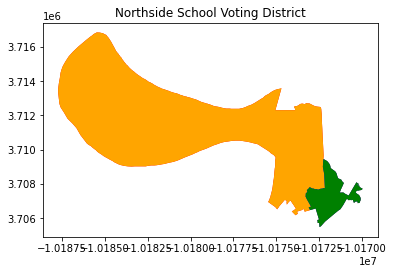

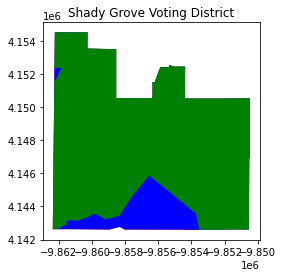

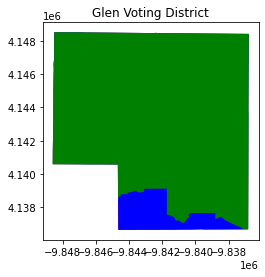

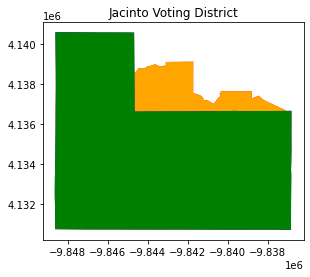

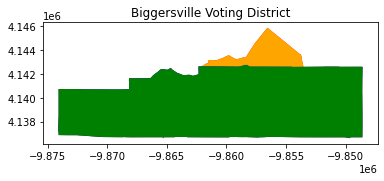

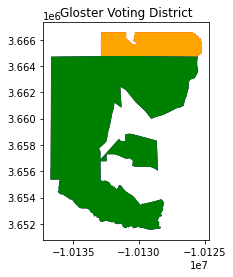

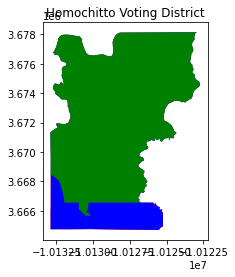

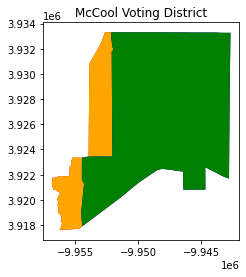

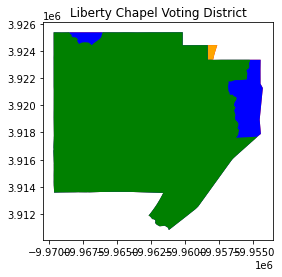

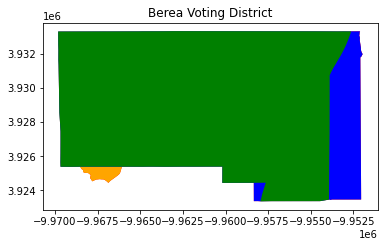

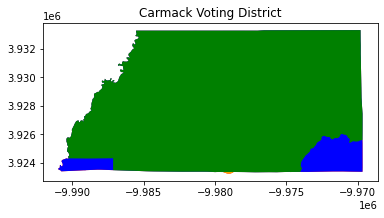

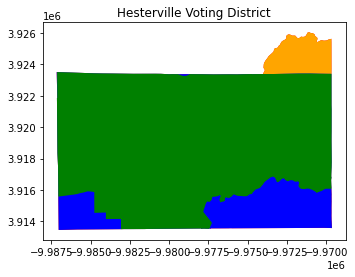

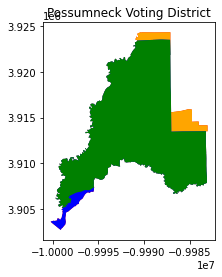

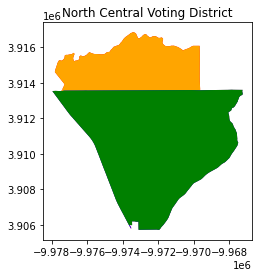

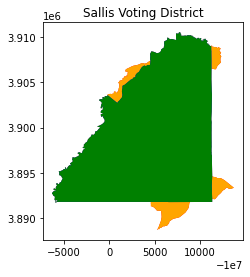

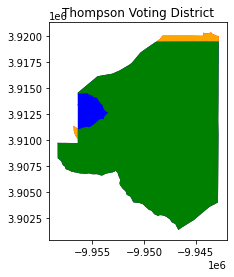

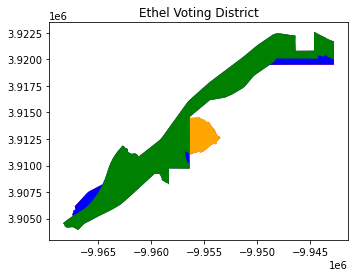

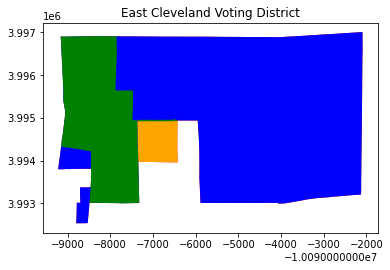

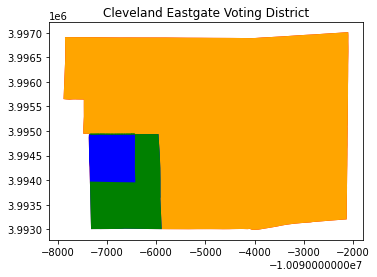

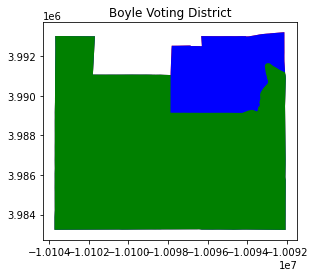

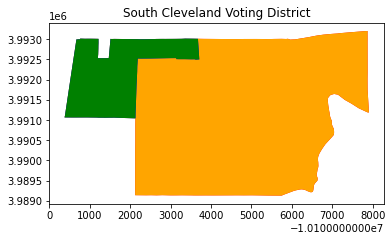

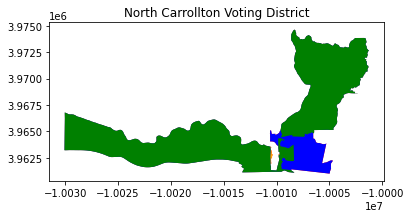

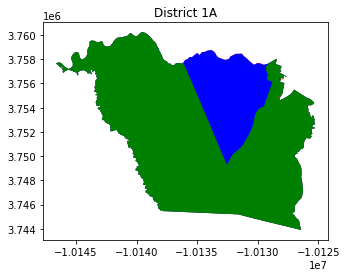

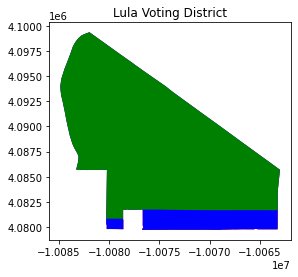

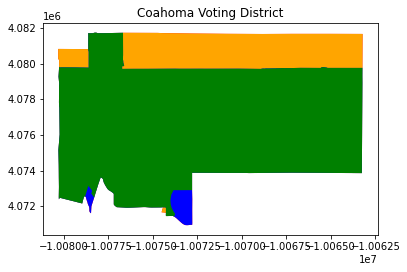

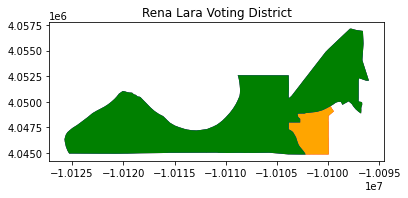

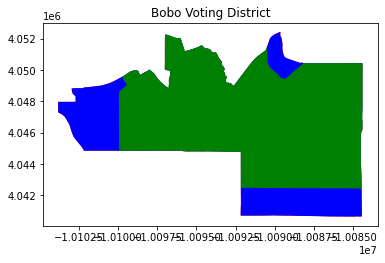

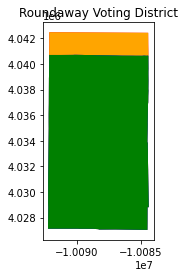

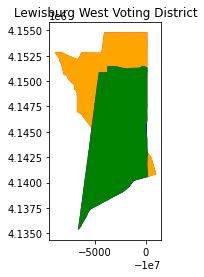

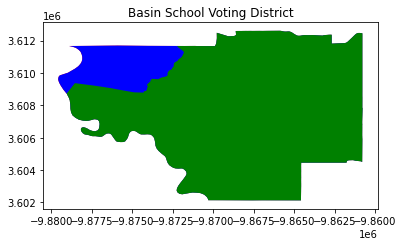

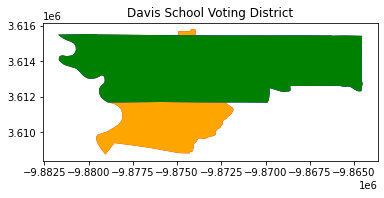

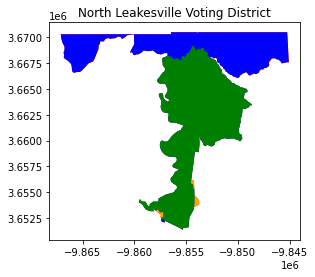

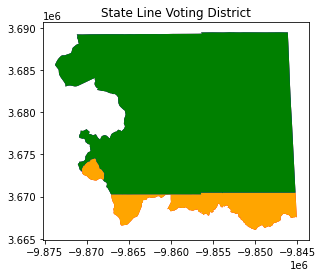

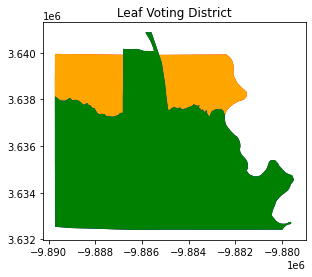

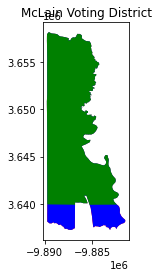

In [186]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [190]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(453, 1)
139 precincts w/ a difference of 0 km^2
216 precincts w/ a difference between 0 and 0.1 km^2
47 precincts w/ a difference between 0.1 and 0.5 km^2
16 precincts w/ a difference between 0.5 and 1 km^2
25 precincts w/ a difference between 1 and 2 km^2
7 precincts w/ a difference between 2 and 5 km^2
3 precincts w/ a difference greater than 5 km^2
